In [1]:
import statistics as stat

128


In [2]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
basepath = '/gpfs/scratch/smdick/new/'
# basepath = '/gpfs/scratch/smdick/uf/'
# paths = ['seawulf/md_siesta_mull/md_siesta',
# #          'md_siesta_mull_szp/md_siesta',
# #          'md_siesta_descr_szp_uncorrected/md_siesta',
#          'mbpol/md_siesta_pure/md_siesta_10',
#          'mbpol/nose_128_10']
# paths = ['descr_sz_15/md_siesta',
#          'descr_sz_10/md_siesta',
#          'uf_test/md_siesta',
#          'uc_sz_5/md_siesta',
#          'uc_sz_10/md_siesta',
#          'uc_sz_15/md_siesta',
#          'descr_szp_5/md_siesta',
#          'descr_sz_5/md_siesta',
#          'mull_szp_5/md_siesta',
#          'mull_szp_10/md_siesta',
#          '../mbpol/md_siesta_pure/md_siesta_10']
# paths = [
# #             'md_siesta_mixer_uf_5/md_siesta',
# #          'md_siesta_mixer_uf_5_alt/md_siesta',
# #          'md_siesta_mixer_uf_5_uncorrected/md_siesta',
# #           'md_siesta_mixer_uf_8/md_siesta',
# #          'md_siesta_mixer_uf_10/md_siesta',
# #          'md_siesta_mixer_uf_15/md_siesta',
#           '../../uf/md_siesta_uftombp/md_siesta',
#           '../../uf/md_siesta_uftombp_8/md_siesta',
#           '../../uf/md_siesta_uftombp_10/md_siesta',
#           '../../uf/md_siesta_uftombp_dft/md_siesta']
# #          '../../mbpol/md_siesta_pure/md_siesta_10']
#          '../../mbpol/nose_128_10']
# paths = [ '../../uf/md_siesta_uftombp/md_siesta',
#           '../../uf/md_siesta_uftombp_8/md_siesta',
#           '../../uf/md_siesta_uftombp_10/md_siesta',
#           '../../uf/md_siesta_uftombp_dft/md_siesta']
# #          '../../mbpol/md_siesta_pure/md_siesta_10']
# #          '../../mbpol/nose_128_10']         
# paths = [ '/md_siesta_atomic_mixer/md_siesta',

# paths = ['/uf/md_siesta_uftombp_5/md_siesta',
#          '/md_siesta_descr/md_siesta',
# #           '/uf/md_siesta_uftombp_8/md_siesta',
#          'md_siesta_atomic_mixer/md_siesta',
# #          'md_siesta_atomic']
# #          '../../mbpol/md_siesta_pure/md_siesta_10']
#          '/mbpol/nose_128_10']  

# paths = ['md_siesta_uftombp_5/md_siesta',
# #          'md_siesta_uftombp_10/md_siesta',
#          'md_siesta_uftombp_15/md_siesta',
#          'md_siesta_uftombp_inf/md_siesta']
# # # #         '../mbpol/nose_128_10']

# paths = ['md_siesta_uftodztombp_5/md_siesta',
# #          'md_siesta_uftodztombp_10/md_siesta',
# #          '../md_siesta_atomic_mixer/md_siesta',
#          '../bugfix/md_siesta_uftodztombp_P_5/md_siesta',
#          'md_siesta_uftodztombp_5_mol/md_siesta',
#          'md_siesta_uftodztombp_5_mol_300/md_siesta',
#          '../mbpol/md_siesta_pure/md_siesta_10',
#          'md_siesta_dztombp/md_siesta']
# # #         '../mbpol/nose_128_10']

# paths = ['md_siesta_uftodz_5/md_siesta',
#          'md_siesta_uftodz_8/md_siesta',
#          'md_siesta_uftodz_10/md_siesta',
#          'md_siesta_uftodz_inf/md_siesta',
#          '../mbpol/md_siesta_pure/md_siesta_10']
paths = ['../bugfix/md_siesta_uftodztombp_pbc/md_siesta',
         'md_siesta_uftombp_5/md_siesta',
        'md_siesta_uftodztombp_5/md_siesta']
# paths = ['../mbpol/nose_128_10']

t_equib = 200
dt = 5

In [37]:
r_oh_list = []
for p in paths:
    r_oh_list.append(stat.get_roh(basepath + p, t_equib, dt, dt))


In [38]:
r_oo_list = []
for p in paths:
    r_oo_list.append(stat.get_roo(basepath + p, t_equib, dt, dt))


In [39]:
r_hh_list = []
for p in paths:
    r_hh_list.append(stat.get_rhh(basepath + p, t_equib, dt, dt))


In [40]:
r_oo_list.append(np.genfromtxt('/gpfs/scratch/smdick/new/mbpol_bins/r_oo.bins', delimiter = ','))
r_oh_list.append(np.genfromtxt('/gpfs/scratch/smdick/new/mbpol_bins/r_oh.bins', delimiter = ','))
r_hh_list.append(np.genfromtxt('/gpfs/scratch/smdick/new/mbpol_bins/r_hh.bins', delimiter = ','))
paths.append('../mbpol/nose_128_10')

In [41]:
runtimes = []
for p in paths:
    runtimes.append(len(pd.read_csv(basepath + p +'.log', delim_whitespace = True)) / 2000 - t_equib/2000)

/gpfs/home/smdick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
runtimes

[0.5995, 13.0545, 6.0605, 69.1115]

In [43]:
logs = []
for path in paths:
    logs.append(pd.read_csv(basepath + path + '.log', 
                                delim_whitespace = True, index_col = 0).drop('Time[ps]').astype(float))

for log in logs:
    print('T = {:.0f}+/-{:.0f} K'.format(log['T[K]'].mean(), log['T[K]'].std()))

T = 299+/-21 K
T = 299+/-13 K
T = 299+/-14 K
T = 297+/-13 K


/gpfs/home/smdick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


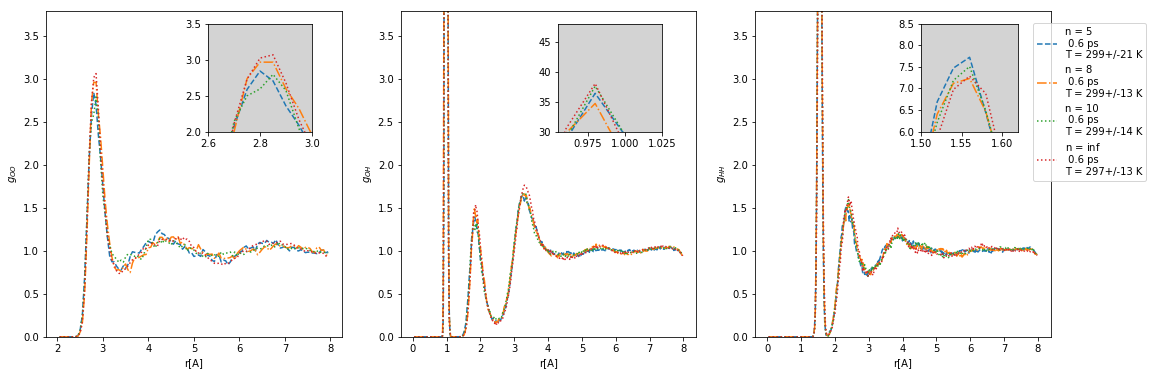

In [44]:
##### labels = ['descriptor', 'mulliken', 'mulliken szp', 'szp uncorrected', 'dzp custom uncorrected', 'mbpol']
# labels = ['descriptor (sz) 15','descriptor (sz) 10', 'ultra-fast 5','uncorrected sz 5',
#           'uncorrected sz 10','uncorrected sz 15'
#           'descriptor (szp) 5', 'descriptor (sz) 5',
#           'mulliken (szp)', 'mulliken (szp), N = 10','dzp custom']
# labels = ['N = 5', 'N = 5 (alt)', 'N = 5 (uncorrected)','N = 10','N = 15','N = 1']
labels = ['n = 5 ','n = 8','n = 10', 'n = $\\inf$', 'n = 1']
# labels = ['5','8','10','inf','DFT']
# labels = ['UF -> MB-pol', 'RSD', 'RSD (atomic)', 'MB-pol']
# labels = ['5','15','inf','MB-pol']
# labels = paths + ['MB-pol']
# labels = ['5','inf','pure','MB-pol']
# labels = [l[:-len('/md_siesta')] for l in paths]
# choice = ['descriptor', 'mulliken', 'mbpol', 'dzp custom uncorrected']
# choice = ['mulliken szp', 'szp uncorrected', 'dzp custom uncorrected']
# choice = ['descriptor (sz) 15', 'descriptor (sz) 10', 'descriptor (sz) 5', 'dzp custom']
# choice = np.array(labels)[[-3,-2,-1]]
# choice = np.array(labels)[[1,2,3,6]]
# choice =  ['5','inf','pure']
# choice = np.array(labels)[[0, 1, 3, 4]]
choice = ['n = 5 ','n = 8','n = 10', 'n = $\\inf$', 'n = 1']
# choice = labels
styles = ['--','-.',':',':','-']
figure(figsize = (18,6))
bins1 = np.arange(2,8,0.05)[1:]
bins2 = np.arange(0,8,0.02)[1:]

a = 0
b = 0
c = 0
axes_list = [a,b,c]
insets = [[.25, .6, .08, .25], [.52, .6, .08, .25],[.8, .6, .075, .25]]
# insets_xlims = [[2.7,2.9], [0.975,1.025], [1.52,1.63]]
# insets_ylims = [[2.7,3.1], [25,38], [6,7.25]]
insets_xlims = [[2.6,3.0], [0.955,1.025], [1.5,1.62]]
insets_ylims = [[2.0,3.5], [30,48], [6,8.5]]
max_t = min([len(data) for data in r_oo_list])
# max_t = 12000

for i, [data,bins,div, t, inset, xl, yl] in enumerate(zip([r_oo_list, r_oh_list, r_hh_list],
                                        [bins1,bins2,bins2],
                                        [1,4,2],
                                        ['OO', 'OH', 'HH'],
                                         insets, insets_xlims, insets_ylims)):
    
    subplot(1,3,i+1)
    
    for r_oo, l, rt, s in zip(data, labels, runtimes, styles):
        if l in choice:
            plot(bins, (np.mean(r_oo[:max_t], axis = 0)/div), label = l +'\n {:.1f} ps'.format(rt), ls = s)
    
    ylim(0,3.8)
#     xlim(2,5)
    xlabel('r[A]')
    ylabel('$g_{' + t + '}$' )
#     legend()
    if i > -1:
        axes(inset, facecolor = 'lightgray')
    #     xticks([])
    #     yticks([])
        for r_oo, l, rt, s, log in zip(data, labels, runtimes, styles, logs):
            if l in choice:
                plot(bins, np.mean(r_oo[:max_t], axis = 0)/div,
#                      label = l +'\n {:.1f} ps'.format(min(len(r_oo)*dt/2000,(max_t * dt)/2000)) + '\nT = {:.0f}+/-{:.0f} K'.format(log['T[K]'].mean(), log['T[K]'].std()),
                     label = l +'\n {:.1f} ps'.format(min(len(r_oo)*dt/2000,(max_t * dt)/2000)) + '\nT = {:.0f}+/-{:.0f} K'.format(log['T[K]'].mean(), log['T[K]'].std()),

                     ls = s)
        xlim(*xl)
        ylim(*yl)
legend(bbox_to_anchor=(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIEAAAF3CAYAAAAyxVtiAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzs3XdYVFf6B/DvnQLM0HtvCggMQUAUo9EoGqNRsWvsbkxILLEk2Rh/Scyqu2tiEk3crLpsinHNRrMmUayxYJodFBUQGBRQeh3a9Jn7+wMdpGgQYa4w7+d5eJ4555575x1DDnfOPec9DMuyIIQQQgghhBBCCCE9G4/rAAghhBBCCCGEEEJI16NBIEIIIYQQQgghhBATQINAhBBCCCGEEEIIISaABoEIIYQQQgghhBBCTAANAhFCCCGEEEIIIYSYABoEIoQQQgghhBBCCDEBNAhECCGEEEIIIYQQYgJoEIgQQgghhBBCCCHEBNAgECGEEEIIIYQQQogJoEEgQgghhBBCCCGEEBMg4DqAjnJycmL9/Py4DoMQQlpJSUmpYFnWmes4jKG79MWa4mtoYCxh59YLAFCTnQGAhW2QhNvACCFdgvrhnq2hoRa68nzwLB1g5ewJAKiWpkOgB6z7UL9OyOPClPri7qTbDgL5+fkhOTmZ6zAIIaQVhmHyuY7BWLpLX1yzzhfnzAfh2VXfAgD2vf8KlDWFeH7DAY4jI4R0BeqHe7aMlF8RemA80oZ+jLDYWQCAXe9Ogp2ZPca9+yXH0RFC7jKlvrg76baDQIQQQkh7peSYocrilqE88a3tHEZDCCHkUWh0ahSqhNAo5Ia6Oet/5DAiQgjpPignECGEkB5PVSwAr7TOUL4lvYrs1N84jIgQQkhH5SsLUPujMyp/Omaoy0o7i/xM05oRRQghHUEzgQghhPR4Iw9dAss0ldOXzgU0agQlXecuKEIIIR0S6NMPl0f3hmRknKHu6lsvwLWaB9/T6RxGRgghjz8aBCKEENLjCc1EzcoNfd1hJ8/iKBpCCCGPIsTvCYR8crBZnUVvFjWMA0cREUJI90HLwQghhPR4+14cip3LJhjKrr4+eNJJ/oAzCCGEPK6qa0qRcuxLVN2WGur62gPevrQJESGE/BEaBCKEENLjCW6Xg387z1BukDegVM3nLiBCCCEdlnR+L8TLPkTqJ38x1FVoGNQ2KLgLihBCuglaDkYIIaTH+++0L6DS6DH7Tll3Mg3ZKlv04jQqQgghHWHrNAD/GxyAp4c2zfDMTmPgVXYLeIfDwAghpBugmUDEJCiVSgwYMAB9+/aFRCLBe++916rNjh074OzsjIiICERERODzzz/nIFJCSFdgwANzz5880VO9IHpCyWFEhBBCOsrc2g9fOr8Ccd+RhjqXYD50T9NysI7YvHkzJBIJwsLCMHPmTCiVzf8+0j0yIT0LzQQiJsHc3BxJSUmwsrKCRqPBU089hTFjxmDgwIHN2s2YMQOfffYZR1ESQrrK1F9eRYWFPYDG7YRjB0iAi+e4DYoQQkiHaOsKMU6dCH2JA+D3JAAg1lsEuPhwHFn3U1hYiC1btiAjIwMikQjTp0/H7t27sWDBgmbt6B6ZkJ6DBoGISWAYBlZWVgAAjUYDjUYDhmH+4CxCSE8hrKiDyFJtKOeVVAJyBn7chUQIIaSDSotOYMnhX1EqVAEDGweB8uq10OtltMy3A7RaLRQKBYRCIeRyOTw8PLgOiRDShWgQiJgMnU6Hfv36IScnB0uWLEFMTEyrNt9//z1+/fVXBAUFYfPmzfD29uYgUkJIZxs3VA5ENOWOSP/2LAQKWxoEIoSQbijKxQ8lwxrgNWSQoe7MeSX8C3PQaxmHgXVDnp6eeOONN+Dj4wORSIRRo0Zh1KhRrdrRPbJp0Wg0KCgoaLU08GEdP378iStXruR1TlSknfQA0rRa7Yv9+vUra6sBDQIRk8Hn85GamgqZTIZJkyYhLS0NYWFhhuPjx4/HzJkzYW5uju3bt2P+/PlISkpqdZ2EhAQkJCQAADIyMuDv72+0z0AeTmlpKSoqKrgOgzw2mmb/FQwaAkW5FM9yGA3pGHt7e3pK/RijfpcYQ5CTE4LcaoAwiaHudkAo5EEiPMlhXN1RdXU19u/fj9zcXNjZ2WHatGnYtWsX5syZY2hD98jd06P0xwUFBbC2toafn98jrZ7Q6XTasLAw+qNgRHq9nikvLw8tKSn5HEBcW21oEIiYHDs7OwwbNgxHjx5tNgjk6OhoeP3SSy9h1apVbZ4fHx+P+Ph4AIBEIsGePXu6NmDSYS3XsxPTlXTFHJW5v2PamMZyYfjLOHClCCu4DYt0gIeHB/W7jzHqd4kxlNbVorLBAq4VFXD0a6w77LIEEd52nMbVHZ04cQL+/v5wdm5Mqj158mScOXOm2SAQ3SN3T4/SHyuVykceACLc4PF4rLOzc01JSUnYfdsYMyBCuFJeXg6ZTAYAUCgUOHHiBIKDg5u1KS4uNrxOTExESEiIUWMkhHSdhlo+FNX1hrJ52RUENlzkMCJCCCEddSLnKpgDDkjfd9hQ5664CtvisxxG1T35+Pjg3LlzkMvlYFkWJ0+ebHUPTPfIpokGgLovHo/H4gFjPTQTiJiE4uJizJ8/HzqdDnq9HtOnT8e4ceOwZs0aREdHIy4uDlu2bEFiYiIEAgEcHBywY8cOrsMmhHSSETE1OCVq2g2w774P0b9eBeBt7oIihBDSIZ6WHqiOrYdN/6b8juOu/guBuQBWLuYusG4oJiYGU6dORVRUFAQCASIjIxEfH0/3yKRH8vT0fMLS0lLH4/EgEAjYtLS061zHxAUaBCImITw8HJcvX25Vv27dOsPrDRs2YMOGDcYMixBiJAxYsPeUzadMRm3pTc7iIYQQ0nE2AktEudTihndTzhnxsGdRNYh9wFnkftauXYu1a9c2q6N7ZNJT/fLLL9nu7u5aruPgEg0CEUII6fHOpFujxjLbUH7mhTUcRkMIIeRR1KvluFonBl9WZaibvHQzhxERQjpTVlaW2ZgxYwIHDBhQn5ycbOXq6qr+6aefcqysrGiktxNQTiBCCCE9Xr1cAK1SZShf/mUfft77KYcREUII6ai8mhwID9mh+vefDXVnj3+DC4lfcBcUIaRT3bp1y2LZsmVlOTk56ba2trqdO3fat2yzbds2h+Dg4NCWP6NHj+51v+uOGDEiUCKRhHz00UdOXfsJHl80E4gQQkiPN+Fg8yXfBR+uhUWtEpi6nKOICCGEdFR01BSkzStHzHOzDHXSf/8dodl6IG4hh5ERQjqLp6enatCgQQoAiIyMlOfl5Zm3bLNo0aKqRYsWVbU+u22nT5/O9PPz0xQWFgpiY2ODJBKJcsyYMfV/fGbP0uUzgRiGsWAY5gLDMFcYhklnGGZtG20WMAxTzjBM6p2fF7s6LkIIMSXUFzeni+4N66g6rsMghJgQ6oc7T2ifKEz7vwT4RDxpqHP2F6Ii1pbDqAghncnMzMyw9IvP57NarbbVdmUPOxPIz89PAwCenp7asWPHys6ePWvZdZ/g8WWMmUAqALEsy9YzDCME8DvDMEdYlj3Xot0elmWXGiEeQggxRSbdFyc+3w8yKwfM+/w4AMDRzR39IOc4KkKIiTHpfrgz5d5MRfaxXYgcMR8ugU8AAPythNCZWXEcGSHEmB5mJlBtbS1Pp9PB3t5eX1tbyzt16pTN22+/XdTVMT6OunwQiGVZFsDdKVbCOz+U0IkQQozI1PtirVwJNa/aUJZVV+B6nTnCOYyJEGJaTL0f7kw//74LAz85hBsyBi5vfQgAKFLowNbJIeE4NkLI46mgoEAwadKkAADQ6XTMlClTKqdOnVrLdVxcMEpOIIZh+ABSAAQA+CfLsufbaDaFYZihALIBrGRZ9rYxYiOEEFNhyn3xnrGfAwDurqtgz2ShrNqOu4AIISbJlPvhzmTtNxH/jK3CKyOmG+pu56oQnq4ANnIYGCGkU/Tp00ctlUrT75bXrVtX+qjXDA0NVWdlZWU86nV6AqPsDsayrI5l2QgAXgAGMAwT1qLJAQB+LMuGAzgB4Ou2rsMwTDzDMMkMwySXl5d3bdCEENLDUF/cxH1UX9gPMMmHP4QQDlE/3DmENv44aDMFIr8QQ11omA00cY4cRkUIId2DUbeIZ1lWBuBnAKNb1FeyLHt3795/A+h3n/MTWJaNZlk22tnZuUtjJYSQnsoU++J5x+Ix+sxbhnJ/SW/0s6WcQIQQbphiP9yZdOWX8ULD51DfMkwUQH83GwwIbLWDNCGEkBaMsTuYM8MwdndeiwCMBJDZoo37PcU4AM338iWEEPJITL0v1mrV4LENhvJVaT6u1FpwGJFp0ul0iIyMxLhx4wAACxYsgL+/PyIiIhAREYHU1FSOIySk65h6P9yZqm79hGnHM1H/y0FD3ZXyely6Wf2AswghhADGmQnkDuAUwzBXAVwEcJxl2YMMw6xjGCbuTptld7bKvAJgGYAFRoiLEEJMiUn3xROiqzB/7lhDOe9QCirOU04gY/v0008REhLSrO7DDz9EamoqUlNTERERwVFkhBiFSffDnWl4LwlUz9bAN3aYoe7StRoIvq/kLCZCSNf57bffxEFBQaE+Pj5hCxYs8Nbr9W22O3jwoHVwcHBoQECApH///n2MHGa3YYzdwa4CiGyjfs09r1cDWN3VsRBCiKmivhgAwxheFo2cirLcVIzgMBxTU1BQgEOHDuHtt9/Gpk2buA6HEKOjfrjz9HZ0BOwbAC8fQ11+0AjU+qto10dCeqDFixf7bt26NT82NrZh2LBhgXv37rWZPn16s+SOFRUV/OXLl/scPXpUGhgYqC4sLDTKJljdkVFzAhFCCCFcOJlih907jxnKlb0n4lurFziMyPSsWLECGzduBI/X/Nbj7bffRnh4OFauXAmVSnWfswkhpIm0vBhnq6xRUVhgqLvkOA2Xe1O/3hGbN2+GRCJBWFgYZs6cCaVS2ey4SqXCjBkzEBAQgJiYGOTl5XETKDFJ+fn5wvr6et7IkSMbeDweZs+eXblv375WCcA+//xzh7Fjx1YHBgaqAcDT01Pb1vXEYnHkSy+95BUaGhry5JNPBhUVFQkA4K9//atL7969JUFBQaHjxo3r1bWfils0CEQIIaTHq2MY1ENtKFvmHkNs7Q8cRmRaDh48CBcXF/Tr1zzH7YYNG5CZmYmLFy+iqqoKH3zwQZvnJyQkIDo6GtHR0aiuppwfhJi6n6VpsDtmjVu/nTbU+clOIlD6LYdRdU+FhYXYsmULkpOTkZaWBp1Oh927dzdr88UXX8De3h45OTlYuXIlVq1axVG0xBTl5+cL3d3dNXfLvr6+6uLiYmHLdtnZ2RbV1dWCAQMG9JFIJCGfffZZm9sFKhQKXlRUlDwjI+P64MGD69566y0PANiyZYtbWlpaRnZ2dsaOHTvyu+4TcY+mSBFCCOnxxvWtwAGr4Yay//H/oG857Q5mLKdPn0ZiYiIOHz4MpVKJ2tpazJkzB7t27QIAmJub409/+hM++uijNs+Pj49HfHw8AEAikRgtbkLI46mXXS9oRx+Aw6Chhrq+2Xsx8KIW+PtmDiPrnrRaLRQKBYRCIeRyOTw8PJod379/P/7yl78AAKZOnYqlS5eCZVkw9yyzJj3bjH+dbVU3Ltwdc5/0g0Ktw4KvLrQ6PrWfF0IsgLJapeClncm97z22f+lTWe19b5ZlW9W19bun1WqZq1evin/77bfshoYG3sCBA4OHDh1aHx4e3myaMY/Hw4svvlgFAC+88ELl5MmTAwCgT58+ikmTJvnHxcXJZs+eLWtvfN0RzQQihBDS4zFofgPh9vIKKF+YDLRxY0E634YNG1BQUIC8vDzs3r0bsbGx2LVrF4qLiwE03uDt27cPYWFhHEdKCOkOrMzEeMJODpGji6Gu16RFKF81h8OouidPT0+88cYb8PHxgbu7O2xtbTFq1KhmbQoLC+Ht7Q0AEAgEsLW1RWUlJeEmxuHn56e5d+ZPfn6+mZubm6ZlOy8vL/WIESNqbWxs9O7u7tqYmJi65ORk8R9d/+6A0qlTp6RLliwpT0lJsezbt2+oRtPqLXoMmglECCGkxzt1yQly66uGcsxzczmMhtw1e/ZslJeXg2VZREREYPv27VyHRAjpBirlVfi9wgaeZSWAbzAAYPikxRxH1T1VV1dj//79yM3NhZ2dHaZNm4Zdu3ZhzpymAbX2zsRISEhAQkKC4bqk59jz8pP3PSYy49/3eFpaDVxsLLQPM/OnJV9fX42lpaX+5MmTlsOHD2/45ptvHJcsWVLWst3UqVNlS5Ys8dFoNFAqlbzLly9b/fnPfy5t2U6v1+Orr76yj4+Pr96xY4fjgAED6nQ6HW7cuGE2fvz4ulGjRtV7eHg41NTU8J2cnHQdjftxRoNAhBBCerwaMzOoRE2TX3//YRsqbmVg4vItzXYNI11v2LBhGDZsGAAgKSmJ22AIId3S7eo8DD1hhfq+KUD/YQCAn77bBBQVYtTyj2iZ0kM4ceIE/P394ezsDACYPHkyzpw502wQyMvLC7dv34aXlxe0Wi1qamrg4ODQ6lq0dJd0la1bt+YvXLjQX6lUMsOHD6+dNm1aDQBs3LjRGQDefPPN8qioKOXIkSNrgoODJTweD3Pnzi3v37+/suW1RCKRPj09XSSRSNysra11P/zww02tVsvMmjXLv66ujs+yLPPyyy+X9tQBIIAGgQghhJiAKXvTm5Urd34B29IGYBlLg0CEENLNDBuzEjdsfsLgUdMMdQWHd2DQOQ3w6kaAz+cwuu7Fx8cH586dg1wuh0gkwsmTJxEdHd2sTVxcHL7++ms8+eST2Lt3L2JjY2mgjRjV0KFD5VKpNL1l/Ztvvll+b3n9+vWl69evbzX7p6VPP/20CEDRvXUpKSkdnq3U3dAgECGEEJMjGBwO97JDACgnECGEdDd9AvqiT0DfZnW+vjYod25AMI9Snj6MmJgYTJ06FVFRURAIBIiMjER8fDzWrFmD6OhoxMXFYeHChZg7dy4CAgLg4ODQavcwQkj3QoNAhBBCerwj48NQYWuPubt+AwDY2DsiuKHVDGFCCCHdQMr5/cg//A2GzVkDh8DGhPKO5uawNlPRDJUOWLt2LdauXdusbt26dYbXFhYW+N///mfssAjpEnK5/DLXMXCNhsoJIYT0eLUiBjXmTeXK4gKcrrKm3cEIIaQbunBmD0L2XEPp2V8NdQVyJXKKVGB1PTaNByEmo6SkhB8cHBwaHBwc6uTk1NfFxSX8blmpVHZopHfbtm0OQUFBoUFBQaGRkZHBZ8+eFd09tn79epfAwEBJQECAZN26dYZtB8+ePSuKiIgIDgoKCo2NjQ2oqqp6qPGT1atXu23btq1ZAq26ujresGHDAvz9/SUBAQGSxYsXe949duTIEavQ0NAQgUDQ76uvvrK/33XFYnHk3dd79uyx9fX1DZNKpWbtjYsGgQghhPR4e2P/hTMDP2yquJQDzQVr7gIihBDSYWaSJVg9airsR0wy1JUW1cP3pAZsD97WmRBT4ebmpsvMzMzIzMzMmDdvXvkrr7xSerdsYWHRoSd4AQEBqtOnT2dlZ2dnrF69uujll1/2BYCLFy9a7Ny50/nSpUvXr1+/nn706FG7a9eumQPASy+95Pe3v/2tIDs7OyMuLq567dq1bi2v+9prr3ls2bLFsa33TEpKspkwYUJty/rXX3+9NDc3Nz0tLS3j/PnzVt99950NAPTq1Uv91Vdf5Y0fP76yPZ9p//791m+88Yb34cOHpYGBger2/lvQIBAhhBCTI5kyBF5PV4JyAhFCSPfDs/RAqnggLOybvncNjfQAZlmBMWv3w3BCiAl55plnGpydnXUAMHz48IaSkhIzALh27ZooKiqq3traWi8UCjF48OC6PXv22AFAXl6exZgxY+oBYNy4cbUHDx687+yclqqqqngajYbn4eGhvbfe2tpaP378+DoAsLCwYMPDw+W3b982A4A+ffqoY2JiFLx25DY7evSo1ZIlS/wSExNzJBKJqr1xATQIRAghpKdjWcQnLsRzSa8ZqgJ93BEgeqi/l4QQQh4Xtw5jZdWHUOQ1beYT5GiLEBdzMJQYmhCTMXbs2F53l4nd+/PZZ5+1OTPnrn/84x9Ow4cPrwGAiIgIxfnz561LSkr4dXV1vOPHj9veHZQJDAxU/Pe//7UDgF27djncHThqjwMHDtgMHTq01Syge1VUVPCPHz9uN2bMmAe2a0mtVjMzZswI+P7773MiIyMfOsklJYYmhDwclQowb0yuwlu7DqyLC9hFr3AcFCEPwLJosNZCa9u0hPzs5Qxoym0wlHICEUJItyMv+Bmjfi2F/JlLQOgTAIAzBRVQF9TjaY0GjFDIcYSEEGM4dOjQzYc958CBA9a7du1yOnPmTCYAREVFKZcvX14SGxsbJBaL9aGhoXKBoHGY5Msvv8xbunSp94YNG9xHjx4tEwqFLABcuHBBNG/ePH8AqKioEAqFQv3WrVtdAeDnn3/OcnNz0x09etR24cKFFfeLQ6PRYPLkyb3i4+NLQ0ND272UCwCEQiEbFRVVv337dqeYmJjbD/tvQINAhJAHk8sBsRgAwPxzK5ibN6H/+CMAAGtnB4SGcBkdIe0yMaQMGPaioVzyaxocC6w4jIgQQkhHTQzvB23cL3AeMtRQly6txFO/qaBXKsGnQSBCTMLYsWN73bhxw6Jl/dKlS0uXLl3aKq/O+fPnRYsXL/Y9dOiQ1M3NzZBFfuXKlRUrV66suHOup5eXlxoAIiMjladPn5YCwNWrV82PHTtmBwADBgxQZGZmZgCNOYH8/PxUy5Yta/Z+ly9fthw2bFi+VqtFWFhYKACMHj1a9sknnxQBwKxZs/x69eqlXLNmTdnDfm6GYZCYmHhz6NChQW+99Zbb+++/X/Iw59MgEDEJSqUSQ4cOhUqlglarxdSpU1tthalSqTBv3jykpKTA0dERe/bsgZ+fHzcBc6muDrBuTJjL/G8vmP37od/xFSAQgI2MBLy9G3dUYhiwy5dxHCwh7dF6tk/J+CU4mXYRQ3n0Z5AQQrobTxsbQKwCbJvSc+SFzkOhdzneu/PgipCOUmr1OJ0vx2BfMSwEtLzwcfYwM4GkUqnZtGnTen/55Ze54eHhzXICFBYWCjw9PbVSqdTs0KFDdhcuXMi8t16n0+G9995zX7hwYbsGbJKTky0CAgKUd2cU3R0wumvZsmUetbW1/N27d+e1N/6WrK2t9UePHpUOHjw42NXVVXt3EKs96LeamARzc3MkJSXhypUrSE1NxdGjR3Hu3Llmbb744gvY29sjJycHK1euxKpVqziKljvMr7+C/6cXgLLG/o0Nk4CdMgW4u9PGoCfBxo0HmHt2ZtRowJxMAqqrOYiYkHZgWSSdc8W3238wVMk9nsRh4XMA5Y4ghJBu58KtXJwosoOs4Jah7pbNIFxxGguGz+cwMtLdpZUp8erBYmw+W4kj2fVch0M60TvvvOMuk8kEr776qm9wcHBoWFiYYTlDXFxc7969e0vGjRsX8Mknn9y6m0D6yy+/dPDz8wvr3bt3mLu7u6blbJ/7SUxMtB01alRNW8du3Lgh/Mc//uEulUotJBJJaHBwcOimTZucAOCXX34Ru7q6hh8+fNh+5cqVvgEBAZIHvY+rq6vu6NGj2R999JH7rl277Nr7b0GPQIlJYBgGVlaNSz80Gg00Gg2YewcyAOzfvx9/+ctfAABTp07F0qVLwbJsq3Y9GRsUBP3M54G706hDQsCG/MFyr4oKMNu3A/PmgR0/ruuDJKQDau30kNk0/cmzvLYbs6ovA/rRAI++MBBCSHdyIVeKEb+KUTs+E3aB4QAA39J9sC/MgV4VDd6d3IWEPKwLBQroAThb8nGxSIFJoTZch2TyNm3aVNQZ19mzZ08+gPy2jqWkpGS1Vf/uu++Wvfvuuw+c/dNWfCdOnLD59ttv89pq37t3bw3LsiltHXv66aflpaWlVx/0fgAgl8sv330dEBCgKSwsvPZH59yLHoESk6HT6RAREQEXFxc888wziImJaXa8sLAQ3t7eAACBQABbW1tUVrZrsLd7Y1kw3/wXKCwE3NwaZ/7Yt3v3Q8DdHfoPN4IdN7brYiTkkbCYGFwOp+B+hhrXs4fw7KUsQKfhMC5CCCEdIXHuA5sJ5bAfOMRQ533rGJ47mQZ9QwOHkZHuKL1MiYyyxg2W5vS1w2dj3THU1xIZZUrI1XqOoyPd0ZkzZ6S+vr6P7U0mzQQiJoPP5yM1NRUymQyTJk1CWloawsLCDMfZNnYJamsWUEJCAhISEgAA1T1hCVRZGZhjxwB7e7Cenh27hinmTiLdDoum/5/D3v0EFcU5AL/dO30SQgh5TJgLzeAp0kAptjTUPRX/MeSTi8C3teUwMtKdKLV6/CdVhsTMOjzhZoG/j7SAGZ8B+AxGB1ohxksEc4HprAggpoMGgYjJsbOzw7Bhw3D06NFmg0BeXl64ffs2vLy8oNVqUVNTAwcHh1bnx8fHIz4+HgAgkTxwmWb34OoK/ZZPYVl/DbbJG1AmeRFakTMsS5NhW3DyTiMGd78/N36RvlNgGNS7xqDO4ykwv58Gc+gQ9OvXAQLqWshjhGVx6rQrdPZnDVWBfQchsO8gDoMihBDSUcV1pThWYI8BJcWw6N24XEcSNYzboEi3kl6mxCdnK1Fcp8XYIGssiGyeTsXdWgh3a9pljvRMtByMmITy8nLIZDIAgEKhwIkTJxAcHNysTVxcHL7++msAwN69exEbG9vz8wHl31kWa2sLvYU9rEovgqdVAADM5EWwLj7d+FP0G6wLf4NN4a+wLfwZtoWnYFtwCqKqTCht/AEArMgCEIkadxcj5HHCMChzF0Pu0TSoe/yrv+Lb1RNpORghhHRDxdVF8P5dBOXNHENd4s51+OHNKdDL5RxGRrqDtDIl3jpWCr2exd9HumLRAAeIhK2/Ft+sUmPH5eo2VwsQ0p3R43piEoqLizF//nzodDro9XpMnz4d48aNw5o1axAdHY24uDgsXLgQc+fORUBAABwcHLB7926uw+5aN3PBW7UK7EsvgB01GgpHCbLHNu2eVO0fh2r/uPY33MCcAAAgAElEQVRfr18/6Pv1++N2hBgbX4gZO1ObVdUdOQif3BpgrQbg05M+QgjpTib86TOUDstGQNRgQ13RuQN4OqkeutfrwKNt4tstKysLM2bMMJRv3ryJdevWYcWKFYa6n3/+GRMmTIC/f+ODv8mTJ2PNmjVGj/VR1av1sDLjIdTZHC9E2WN0oFWbgz935crU2Jtei6d8xAhwpGTjpOegQSBiEsLDw3H58uVW9evWrTO8trCwwP/+9z9jhsUtH2+w8+fBm0mEMu0WysLiO3QZ85qbcM78GkX9VkEvEAMNDY2zgdzcOjlgQjpOrW1M7GgmaLzZsx4+CIEBX4Nl9ejh8/0IIaTH8fb0g7enX7O6AB8vYPI1CJycuAmqm+rTpw9SUxsflOh0Onh6emLSpEmt2g0ZMgQHDx40dnidQqXV4z9XZEi62YB/jvOAvYjfrl2/+nmIwAC4WKigQSDSo9ByMEJMEcsCAgFcfPJgU3MFKmvfDl+Kp5XDqvQizGtuAiwL3urV4N1JnE3IY0Grwm/PSrB35pOGKguRJVzMtBwGRQghpKN+2rcJe5bGQlFwy1BnLjSHs7keDJ/PYWTd28mTJ9G7d2/4+nb8vvBxc71ciWWHirHveh2e8hU/VKJnOws+Ah3NkFyk6MIIiTGtXbvWJSAgQBIYGCgZP368v1wuN8lngTQIRIipqawEb/VqWJ7ZDefsb1HZezJqfJ/t8OUUjmHIGvsjFI5hAMNAP28+9HPndmLAhDwihodCDzGKXZtyApXl5eB4kT2t8yeEkG4oO/UnhJ8ohio/z1BXUCfD+XwBdPX13AXWze3evRszZ85s89jZs2fRt29fjBkzBunp6UaO7OHpWRZfpFTjzZ9KodGz+OsIFywe4AjxA5Z/3UumkSFfno9oTxGyK9SoUeq6OGLS1XJzc4UJCQmuqampGVKpNF2n0zGff/55612ATAAtByPE1MhkYBQNcMv5EnIvCUr6LnvkS7J8c4DVwayhGOpoygtEHjN8IX58cguszJv+5DHXc2F5Q8RhUIQQQjpKNeADTK+7iivRMYY6WaUMEWf40Mlk4FtZcRhd96RWq5GYmIgNGza0OhYVFYX8/HxYWVnh8OHDmDhxIqRSaat2CQkJSLgzG7y6urrLY34QHsOgSqHF6EAr/CnKvl2DP0qdEsfKj2Gc6zhskG6ABc8Cczz/Dwez6lBYq4GtBc0yM5asrCyzMWPGBA4YMKA+OTnZytXVVf3TTz/lWFlZPdLTO51OxzQ0NPDMzc11CoWC5+XlZZI7hNBMIEJMDM/HDf5jyiG0N8OtgX8Fy+ucpLieyX+H/y+vgtGpGweaduwAyss75dqEdLYh88Yj+NlSMKCZQMak0+kQGRmJcePGAQByc3MRExODwMBAzJgxA2q1muMICSHdASMQod7METzzpjwt0wZHwHmWCkJ3dw4j676OHDmCqKgouLq6tjpmY2MDqzsDa8899xw0Gg0qKipatYuPj0dycjKSk5Nhb2/f5THfj/7OLN/XBjlhSUz7Z/+k1KRgd+FuZNVnYYH3AsT7xSPAwQz/meKFUBeLrgyZtOHWrVsWy5YtK8vJyUm3tbXV7dy5s9Uv1bZt2xyCg4NDW/6MHj26V8u2/v7+miVLlpT4+/uHu7i49LW2ttZNnjy51jif5vFCg0CEmAqVCsyxY/C48DeYNxThdsw6aMUunXZ5mc+zECrKYJd/BNBqwRw7Dub69U67PiEdppZj+XcvYOyRpYYqZ3sbOAh1YBiTXArOmU8//RQhISGG8qpVq7By5UpIpVLY29vjiy++4DA6Qkh3YSn9HO8U/QWq4iJDnZO1JZzMWcoJ1EHffvvtfZeClZSUGJZPX7hwAXq9Ho6OjsYMr91K6jVYuK8QV0uU4PPa9zdexzYu9RrsMBgfhH6AEOsQhFiHwNPCEwzDgM9jwLIsLSE3Mk9PT9WgQYMUABAZGSnPy8trlZ170aJFVZmZmRktf44ePXqzZdvy8nL+oUOH7HJycq6VlJRclcvlvK1bt5rkcjAaBCLERDC/nwYv4d8wu3YGJU8sQoNLVLPjp3Lr8e1VGbT6jv2Ba3DpD7l9KJwz/wM42EGf8C+wQ4d2RuiEPCIWNd5aqH3tDDVJpy/i6G0H6PV6DuMyLQUFBTh06BBefPFFAADLskhKSsLUqVMBAPPnz8e+ffu4DJEQ0k2oSy5j0Pl6aAoKDXUnsvNwOFMIXU0Nh5F1T3K5HMePH8fkyZMNddu3b8f27dsBAHv37kVYWBj69u2LZcuWYffu3Y/tQ5Tv02tRrdDBw6Z9WU/S69LxRvobKFc1zl73Fnkbjt1W3MZ3hd/hRqUKL+4vQnq5qktiJm0zMzMzfCnh8/msVqtt9Uv3MDOBDhw4YOPj46Py8PDQmpubsxMnTpSdOXPGJNeOUk4gQkzF04PgWbgNmsCnUBn4fKvDvnZm+Ph0JVKKlFg1xAnOlg/ZPTAMykMWwPfMm7C7dQwyv+ca61UqwJy21STcmtC7AnimKf9V9SUpPLItoGdZehpiJCtWrMDGjRtRV1cHAKisrISdnR0Egsa+xsvLC4WFhQ+6BCGEAAD+FBMDHvMviCIiDHXZ+SUYfpYPbVUV+La2HEbX/YjFYlRWVjare+WVVwyvly5diqVLl7Y87bFTKdfi+I16jOxlBSdx++5j7YR2cDBzAI9pfTdwU34TB0sPol/gYFQ0aJFcqEAYLQt7rCxatKhq0aJFVe1p6+fnp7506ZJVXV0dz9LSUp+UlGTdr18/eVfH+Diie18O6ZVK6BW05SDpYiwL1NWBFVigcMa/URi9Grjn6Y1ax0LPsuhlb4ZVQ5yQX6PG8sPFSOnAdph17oOgsAuEc+ZOgNWBSTwA3rLlAOX5IFy6M31bqW3a2aPi+b/hgxELwAotOQrKtBw8eBAuLi7o168pcXxb0+rv92Q5ISEB0dHRiI6O5jzZKCGEe9YWQlgKGfCETXkNi8JXYfOcV2DWg7Y3Jw/nx+u10LPAVInNA9vpWT2u1FwBAHhaeOLdoHfhaNZ6eduT9k9ie9/t6G3tiVAXcyQX0ve27iw2NrZh/Pjx1eHh4SF9+vSR6PV65rXXXjPJBKY0CMSh/LnzkDdrNtdhkB6OOXkCgiWvgCm8BZ25HfQtvvRuu1CJ95LKoNOzGOJriU/GuMNBxMdfkspw4sZDbrPKMCgPng/z+tuwLTgFtncvsE8OBDQmmXifPDZY/Jrkhv2ffmuo0Vh7I5UXBvAod4QxnD59GomJifDz88Pzzz+PpKQkrFixAjKZDFqtFkDjcjEPD482z39cko0SQh4Px7KycUhqC01pqaGuTuyNLPNwMDz6emOK6lQ6HMmux9N+lnCzfvCmJ0kVSXg/531k12c/sJ0ZzwxivhgA0N9ThDyZBmUN2k6Lmdxfnz591FKpNP1ued26daWbNm0qetA57bF58+ai3NzcdKlUmr5v375ckUhkkomeqJfkkO348bAICuQ6DNLDWdrVws6rCiJecatjZ27JcfxGAwIdzQzJ8zxthPh4tBvigq0R6X7/Ka+12qZk+nq2Ka9KrefTUNr4wfn610BoCNgFCwBLmm1BuFXtr0W5V9OTQdGFBCwr2QhWQ+v7jWHDhg0oKChAXl4edu/ejdjYWHzzzTcYPnw49u7dCwD4+uuvMWHCBI4jJYR0B5mFReh1QQhtcdO9jVvBHjx/7S9QV7betYr0fFZmPPzf0854/ok/Xgo4zGkYlvdajkDLP/4eVqOpwQfSDyCyzQAAmg1EeoQuHwRiGMaCYZgLDMNcYRgmnWGYtW20MWcYZg/DMDkMw5xnGMavq+Pikl6hgF6hgMO8ufD44AOuwyE9XH30FNS9+Q/I3WOa1VfKtfjHuUoEOphhVrhds2PmAh5einaAo1gAnZ7FR79X4GqJ0nC8Sl2FVRmrkFiSiHPV57Amcw2UujvHGR7Kg+fDovYmrIt+a6zLzQVycrr0c5IHM+m+mGUxwb8CDr2akqHbXTmDQVfLAK3yASeSrvbBBx9g06ZNCAgIQGVlJRYuXMh1SIR0GZPuhztZf68geE2thEV4uKHOtvgshl0og6bCJFd3mDyGYdDPQwRPm7ZnARUoCvDxjY+h1CkhYAQYaD/wwcmt76RTsBZYo15XDysLLSYEW8PX7sGzjAjpDoyRGFoFIJZl2XqGYYQAfmcY5gjLsufuabMQQDXLsgEMwzwP4AMAM4wQGycqtm5D7aFD8E/cD76VSSYkJ0ZgduEY2JRr0CxYDJVdQLNjepbFJ2crodaxeH2wEwQP2EKzRqlDTpUKv55swOxwO0wLs4Gd0A5POTyFSNtIyDQymPPNoWbVsEDjzKEar1jY5R8FGB6g14P34YeAmzv0a97t0s9MHoj6YjT9nsd+9j0UtdUQih+cN4B0vmHDhmHYsGEAgF69euHChQvcBkSI8VA/3FkYHnh8ptnSr+mrdkOzvAYiryAOAyNc2J9Zi8oGHeZH2t13W/gKdQVuNtxEhboCXiKvP7wms3s3mN9PA+9vwPrg9QCAIa3TBhHSLXX5TCC20d3EIsI7Py3X3k0A8PWd13sBjGAe130HO4HV0CGwnToFtYcPIyu6P3R3dkohpLPw1bWwPfVv8C6cA1hdq+NVch0KazVY2M8eXrYPfqLhIBZg8xh3DPEV4z9Xy7HmVB7qVCxme82Gt8gbT9g8gXcC34GN4J4v0zwB8odsQp3HEIDHg/6116F//bXO/pjkIZh2X8zi9+NuEPySZKixd3SDh38IGMoJRAgxEtPuhzvXTVkxknJsoCktM9Q5ubjD3ScYPMoJZFKUWj2+u1aD/Bp1mwNAd7d+j7CNwOawzQ8eAEpJAfPJp2C0Kgj7uIAdNAi488CeZVnUamqRL1OjuI5yXRrbb7/9Jg4KCgr18fEJW7Bggbder2+z3cGDB62Dg4NDAwICJP379+9j5DC7DaP0kgzD8BmGSQVQBuA4y7LnWzTxBHAbAFiW1QKoAdBjx1rF/fvDefFimPfqBdtJk7gOh/RArte2wTmgDMzfVgPi1rPNnCwF+GycB8YEtm8mmkjIwxuDnRAWth9S8y1Y/0txs519GIaBUqfElptbkFqT2lSvU8H21jGgdy/KC/QYMNm+mCdEYbg9Gp5omhF3+B+r8N/4IdAqGzgMjBBiaky2H+5kVbIqBKQIoC1vWvr1/Y73sGfhU1CUPnLuWNKN/JRTjxqVHtPDWucCSqpIwuvpryNfng+gMdHz/fBVMoizfoF59kUEfj8OvmX/hjBuSOOOujU1+Gfmx3hf+gFeO1KCxEx6gG9sixcv9t26dWt+Xl5e2s2bNy327t3baip3RUUFf/ny5T4HDhzIycnJSd+3b98NLmLtDoyxHAwsy+oARDAMYwfgR4ZhwliWTbunSVtPOFpl6mYYJh5APAD4+Ph0SaxdTS+XQ1tZCaGrK8TR0RBHR3MdEulpWBbi/LONCZo9opod0uhYHMiqxfg+NhALH24MmGEYzPF/FlcrbyPa2hkMw0CnZ8FjmrZ1LlGVoERVYjjHLv8neF76AGpLTyhU9uB9/gX0C18APD0f/XOSh2ayfbGZGDO2nWtWJT93GgHpldCqFRBY0AAlIcQ4TLYf7mQL15+C6l0dLCybvtSXZvyO4acroSotgci17Z0GSc+i0bH4IaMWYS7mkLi03swk2i4alepKeIrauO9kWZjX5sLq1m8QZf8OWzYTjJke6mcdUe81AtW+Y6G29gY0GvDeew9znMW4/PIzMHMzx8VCBeKj2QfnFCKdJj8/X1hfX88bOXJkAwDMnj27ct++ffbTp0+vvbfd559/7jB27NjqwMBANQB4enq2uZWbWCyOnD17dvnp06etbW1tdd9///1NDw8P7V//+leXr776ypnP57NBQUHKgwcP3uz6T8cNo86XZFlWBuBnAKNbHCoA4A0ADMMIANgCqGrj/ASWZaNZlo12dnbu4mi7hiI1FTeeGQV5atNsiXtnVBDyqIR5V5H7XwFkBa23Ud6ZKsOXl2RIL3u4ZLgV6sadNsJswjDLfwyCnMwBAF9eqsbWC43/q1rwLbAueB1GuzT97y3zfRY3n/4nFI6SxplApaVAWVnrNyBGZYp9cWmtEmV1Tb/3rmOexYCJRY2JHwkhxMhMsR/uTGIzAeytzJt9CQ/yDUXI80WwC496wJmkJ0m6WY9Kua7VLKBKdSX0rB42AhtM85gGAdN83oN14S8IOjodgcfnQr/jO5Tuq0FZr9nIif0c2XH7UNTvLSicngBPUw+LuhywEyfBbso8DHcajv4eYpTUa1FYS1vFG0t+fr7Q3d3dsAbP19dXXVxc3CqfRXZ2tkV1dbVgwIABfSQSSchnn33W5ixKhULBi4qKkmdkZFwfPHhw3VtvveUBAFu2bHFLS0vLyM7OztixY0d+130i7hljdzDnO087wDCMCMBIAJktmiUCmH/n9VQASWwPHRkx6x0A9xVzYF5/HqrEj5EZEYG6n45xHRbpQUS12XAKq4M6cmiz+tRiBX68XovngqwQ4S5q9/XOV5/HyrSVyKrPanVMq2dxVFqPvGo1ABj+yN5ouIEdt3ZAzzOD3DmisbGNDfT/2AJERnbwk5FHYdJ9saIaOaMi8Mucp+6ppJwRhBDjMul+uJPt+der+N/8gdDc+2CJd+eLPv1zmYxgZ3NMD7NBpHvTLCCWZfG+9H1svrHZUCeUl8D77DsQVVwDAOjMbKG09kNh1J9Ru/h9aJa8jvKoV6B0CGnc1OQO7/Pvwefc22CHDgaCg6HWq+FQmwSwOlykreKNpq0usK1ZWFqtlrl69ar4xIkT0hMnTkg//PBD96tXr5q3bMfj8fDiiy9WAcALL7xQeeHCBSsA6NOnj2LSpEn+W7dudRAKhT26IzHGcjB3AF8zDMNH4133dyzLHmQYZh2AZJZlEwF8AeA/DMPkoPFpx/NGiIsTQkc72JVtAkq0gIqBvSQAZj7eXIdFehBrdSasowQovWc77DqVDpvPVsLLRoAXolrPEHoQibUEz7k8h97i3q2Ozelrh1O5Ddh1VYZ3nnYx1F+vv46UmhRMcJ8Ae6E9XNI/h0XNDdwatKHx5qysDHB17fiHJB1hun2xwALpTziiwrYpGWRp1jUcyHXCSPqyQAgxHtPthztZyY2riL1YA121DEKXxvuPYlkxDmU5Ydjtm7D0aX3PQnoeXzszzItonueHBYupbnFwLkmG7a1jqPEZBZ3QGqLq6xAqK6AAIJcqcLuwP9inJjaedJ9fl9LQFxsHhe4MMF6/chCDNn6LmYOG41LxFEwKNaEdRr8a+8dtgp4FBi9rah8xCxD2BepKBPh2ZvN/5fhTrZ8u34efn5/m3pk/+fn5Zm5ubq2yc3t5eamdnJy0NjY2ehsbG31MTExdcnKyODw8XPWg698dUDp16pT0yJEj1vv27bPbuHGjh1QqTRMKH7yBTnfV5YNALMteBdDq0T/Lsmvuea0EMK2rY3kcaLIvg61hYTb17xDcPg9X18tAaCjXYZGeQqUCPz0V9YHhjYns7khIroZMocO7o91gIWjfDIgyVRmczJxgJbDCTK+ZbbaxNudjUogNvrlaA2mlCoGOjYPtY13GItYpFmK+GACg51vApuhXiKoyoPzxHJjz56Dftg3g085MxmLSfbFQhEN9P4D9Pbkj2PwiOGfcP0EkIYR0NpPuhztZ+aDPsMC6BCl9mraDr6uXoe9VMyhKimkQqIfTsyx2XJbhmd5W8G6xyy2P4SGuKA3OWXtR7adEjc8o6IWWyB6z13BvzKRdA3PrFtjJk4AHfMlXOoQ0KweHP4fimdUY9OQUTHI0oQEgjvn6+mosLS31J0+etBw+fHjDN99847hkyZJW+SWmTp0qW7JkiY9Go4FSqeRdvnzZ6s9//nNpy3Z6vR5fffWVfXx8fPWOHTscBwwYUKfT6XDjxg2z8ePH140aNarew8PDoaamhu/k5NR6m+UewCiJoUmT8q3/QsMZRwQuDgFqCsBKkwCtFoyA/lOQRydI/g2FB3kQv9A8IeIUiQ36ulkgwLHVjMg21Wvr8W7muxhoPxB/8vnTA9tOCLbBgaw6/PdqDd4b3vg0jmEYiPlisCyLg6UHEeM1GE5Zu+B8/WvcGjgP8PcH9HoaBCLGodfDTlMFM23TDdukRbMg+GkVWAEldSQdx/z+O1BVDTYoEKivB2izB0KMQs82e9YFAHjpmREQCv8KRA3gJqhuKisrCzNmzDCUb968iXXr1mHFihWGOpZlsXz5chw+fBhisRg7duxAVBR3uZfOFyjwQ0YtetmbNRsEUuqUOFv6E+bd2AuZzygURq9uOkmlAuRywMEB7AsvNC4xascsD55WDvfLH6PeZQBqfJ+F2+SFjQc0GiDtOhAm6eyP93j606GOtU9LA6zdtA8z86ctW7duzV+4cKG/Uqlkhg8fXjtt2rQaANi4caMzALz55pvlUVFRypEjR9YEBwdLeDwe5s6dW96/f/9WiVBFIpE+PT1dJJFI3KytrXU//PDDTa1Wy8yaNcu/rq6Oz7Is8/LLL5f21AEggAaBjM5+7nxY9/UEXJ8ACpKR870IVsq1cF+/nuvQSA/A93OB7SgryAaMAgAotXpYCHjwszODn137Zz1YCawwxX0KJDZ//IdNbNa4fXzLJzEAINPKkFiSCIWzApLA6XDN+AIWkhehlAxv/4ci5FEpqhG/500UulkCL6UAAAR3BiBpZw/ySK5cAVNUDObiRUAuh75fv9bfTAkhnc7z+t/w+tUsaCuOQ+DkBAAQ3n2wxOo5jKz76dOnD1LvbFij0+ng6emJSZMmNWtz5MgRSKVSSKVSnD9/HosWLcL58+e5CBcsy+K7azVwsxJgiK+42bErtVeQULwbAwUMbEMX3nsSeBveBxQK6N/fADzEw3c9XwQLWQ7Elemo8RkJNavD4dLD8P7+BqJ/vQD2008Ad/fO+njkPoYOHSqXSqXpLevffPPN8nvL69evL12/fn2r2T8tffrpp0UAiu6tS0lJeaSBqu6EBoGMTBTzNBDzdGPBIwoOw0Ng9tRAboMiPYbKMxxl8V8BAHR6FmtOlsHf3gyLBji063ylTok6bR2czZ0xymVUu983yqPtRNP2Qnv8PeTvcDJzQqVzPZyyd8M5cyduR7wNJjkZ7IABgBktySFdjUV1mAo676altz8d/wWqbGc8q9WiffPjCGlN/cpLOJT3PZ4RxcDS3p0GgAgxErYqH8HXldDV1hkGgQ6nZUB/3RlDbmbDtk84xxF2TydPnkTv3r3h6+vbrH7//v2YN28eGIbBwIEDIZPJUFxcDHcOBj8uFyshrVJjaYwD+Lzmfe5ggScGFpXB1eNZlFg15QEEw0A/cQLAAuA95MYQDIPykAXwOfcObG8nodp7BE5WnIRFuASntfPxqpsbqOcn3Q1tj2Jk8pPfQ5P+W2MhcCQcP06E9bPtSLRFyB8pLQWTdBxQNO5WsDe9FhnlKgQ7t3+Q5ctbX2JN1hoodQ+3hTwAVMi1ePtEKS4XN98twdncGQzDoIrR4Tv/p2BTcArCy7+C98mnQOqVh34fQjpinFcVZo4ZYyjX5hTAKVsIrY4SQ5MOkEqBmhpcb8jEd7IDkFrW4oLyGnR6Le1MRIgRLH4qChELWJj38jfU5ZWWweO6EIrSogecSR5k9+7dmDmzdR7IwsJCeHs3bWTj5eWFwsJCY4Zm8F1aDRzFfIzoZdXqmNv1LxGiZVER2pjKgDl1qnHZLtC4O21Ux3aorfV8GkobPzhnfg0egI2hGzHacw6OOUlws1oD3L4N5Nzo6EciRiaXyy9zHQPXaBDIiFi9HvlL30H1+8ub6nQ66OvrOIyK9BT8sz+DtzUB1tIjyK5Q4b9XZRjqK8YwP8s/PPfu1osT3CdglucsWPAt/uCM1mzN+Siq0+A/qbI2t3L8sfhHbNbnolJoAVf9L9CtWwdE93vo9yHkobEs9FoGVTK5oapu3mdYPvJtsKL2zZIjxECnA++TT8HbtBnhNuH4JOwTCBgBvri2CYrVr4E5fZrrCAnp8XgAGjdZa1ITsQavTXoPbk+1fyYzaaJWq5GYmIhp01rnJW/vFt0JCQmIjo5GdHQ0qqurOz1GrZ5FgKMZng+zhZDf/P2P5H2NnXXnUNFrCrQiZ0CnaxwE+u33Rx+cZ3goD14Ai9pc2BT+AhFfhH6eIgAsLhY0gPfZP8HburUx3yUh3QANAhkTy8Ln4/dgu+i9xnLxFRSN7Y2bY0dzGxfpGUYNh92iaKh9I7AjVQZbCz4WD3B4YM4TlmXx9e2vseP2DgCAp4UnhjgO6dDbC/kMZj5hi+xKNS4UKlodn+k5E2uD10EXOBt2xT/D2q7i4afkEtJBZ0+44djWnYayji9GOewBHiUnJw+Jz4f+rVWonzcdAOBi7gKJtQQvP/FnWFu7Ur9GiBF8n56NQ2f10FZVGep0AjHKWTv6f7CDjhw5gqioKLi6urY65uXlhdu3bxvKBQUF8PDwaNUuPj4eycnJSE5Ohr29fafHKOAxeLGfA8YEWbc6Jiv7HTfMRagMmdtYwedDv2oV9H9+o1OW6tZ4x0Jl5Q3nzK8BlsWvskNw7P05LhYpoV+xHPpVb9LvXicqKSnhBwcHhwYHB4c6OTn1dXFxCb9bViqVHfoPum3bNoegoKDQoKCg0MjIyOCzZ88a8lmsX7/eJTAwUBIQECBZt26dy936s2fPiiIiIoKDgoJCY2NjA6qqqh7qP/Lq1avdtm3b1uqJ46uvvurp5uYWLhaLm01P27hxo3NQUFBocHBwaL9+/fqkpKS0ejKflZVlFhgYaEjc+vHHHzuFhoaGlJeXt/umln5TjYjh82H53PMwHzShscLGEzZjRsNh5hRuAyM9gk7sgsoRq1At9sONKjWeDbCClXnbfYFGrwHQ+BSHBx54DK/NpzwPK7aXFdytBdh1RQZ9i4b4at0AACAASURBVOtZ8C3gLfJGefBc5NkHQFR2Dcz/9gIcJRYkpoSFLFyFssCmG1azXzbh3ZvvQaes4TAu0u2oVACAEmchFtduxOmqxlk/DMMgyr4f2Hfehmog7RBGSFcrqayFqxTQNzQY6qzyv8ObGW+jMu0ih5F1X99++22bS8EAIC4uDjt37gTLsjh37hxsbW2Nng/olkyNy8WKtmcl6dR4S22DVQ7joTOzAXPiJJCXD1haPlQS6Adi+CgPngeRTArr4tOwEljBzcIZIqEeOlc34M7gGXPiJFBD9xaPys3NTZeZmZmRmZmZMW/evPJXXnml9G7ZwsKiQ19aAgICVKdPn87Kzs7OWL16ddHLL7/sCwAXL1602Llzp/OlS5euX79+Pf3o0aN2165dMweAl156ye9vf/tbQXZ2dkZcXFz12rVr3Vpe97XXXvPYsmWLY1vvmZSUZDNhwoTalvUTJ06UnT9//nrL+hdffLEyOzs7IzMzM+O1114rWbFihXfLNvf65z//6fCvf/3L5eTJk1JnZ+d272ZGg0BGpC2+jYb/rIe+KLOxwtIJ1su3w+GV17gNjHR/V69C+MUWMPU1EAt52DnZExNDbNpser3uOpZeW4rbisYnOnO85mC+9/xO2SVJwGMwK9wWudUanLklb7PNkfLjmGCnhTR0FpjffwdzvVX/R0inG+tRBTvvCENZfOs6gnMbwKppOS5pJ5UKvDdXgfnxR4j5Yjzt+DRCrUObNSlQFOC1ayuQe3Yf5QYipAsN8PaB+yQdzO7JU2NenY7QG3Ioi29xGFn3JJfLcfz4cUz+f/buOzyKan3g+He2p/feIYGEQBK6VAOI0gREUBEbogiIILYrypVrxYr0dhW5iIWfiGhAI00E6V0CBAIhAdI3vW22ze+PhRQSQDTJJmE+z5PnyZ45M/MuZM/OnDnnPaNGVZYtW7aMZcuWATBkyBBatWpFaGgoTz/9NEuWLGn0GNccL+T9nTmUG2u3rTpBJLX3J+RFPAbl5QgrVzbI1NyCwLvR2/nicXoV/d368UHH6bwzwK8qQXVOjuXcP/9S7+eW/HMDBw4svdpR0q9fv9LMzEwVwIkTJ2w6depU4uDgYFYqlfTq1at47dq1zgApKSmawYMHlwAMGzasaOPGjX95iFteXp7MYDDIfH19jdduGzBgQGlQUJDh2nJXV9fKOYUlJSXyG92fffbZZy6ffvqpz9atW8/6+PjUOseNSKuDNaLSbT+T/u7XBLq5oXMMwc1ejViUhbm0HJlnAIJcmpbQUC5dusRjjz1GZmYmMpmMiRMnMn369Bp1duzYwYgRIwgJsSQZHDVqFG+88YY1wr1l8sQEhO07cO3hQm67R1ErZDVWPDKLZkpMJTgqHPG38SfcPhyZYOkDru8lsvsG2VGqF6+7Yli0UzQiIgqZEuXMJ1HIjJTWWVMiqSeiiEkvIDNUfT+O+e82KwYkaZZEETGqA2Lr1jgqHRkfaEk8mlNqJKvUSHtPDV5qL4addSZ07VeY3gyDyMibHFQikfwdsjo6WSe9thZhlvR8+++wtbUlNze3RtmkSZMqfxcEgcWLFzd2WJUuFujZc6mMB9s7Yaus+X+s0x5h8qUFTAh8it5uvcHGBvPyZQ2Tn0emIKfto/ge/Rh10QUqnFqRq8/FVnDCRqkADw/M770HAf43P5akXgwdOrTV+fPna02Zmjp1atbUqVNz69oHYOHChe79+vUrBIiJiSl/6623/DIzM+V2dnbili1bnKKjo0sBwsLCyr/++mvnRx55pGDNmjWuVzuO/oq4uDjHvn371hoFdDNz5szxWLJkiZfBYJBt2bKlzmXr09PTVa+88krg4cOHTwUGBt5SBxBInUCNyi7Ck8B+Wl49rEdRfJpPH4yh8MVeZOxS0nrzr6gCA60dYoulUCj45JNP6NSpE8XFxXTu3JmBAwfSrl3Np7h9+vRh48aNVory77Pr6YO/mMVBhw68HJfOtDvcCPewdAOJosg7Z99BKVMyM2wmDgoHZrSe0WCxyGUCw9rWnqt9la/GF1+NL4gi/ic+QZSrSI5dLs2jljSovdu9UfhshhfnWDsUSXOl0WB+8km+TfuWO3Xu+Gp8MZhEpm7KoFRv5rMRvng7KBk04j+Y/Q5BeLi1I5ZIWqzjeVlknJTjlZ+P4kruGUG6jmixvjtZhFouMDy89vWle8JyRsh1hNgGVxU6XP869J8qCB5MiVdXDHY+nCw+yTtn34WMCawZ0t8yIig4yFIxIwNKSyE0tMFikcCmTZuSb3WfuLg4hzVr1rjv2bMnEaBTp0666dOnZ/bv37+Nra2tuV27dmWKK9MIV65cmTJ16tSAOXPm+AwaNKhAqVSKAAcOHLB57LHHQgC0Wq1SqVSalyxZ4gWwY8eOM97e3qb4+HinCRMmaG81vpkzZ+bMnDkzZ9myZa6zZ8/2Wb9+fcq1dVxcXIzOzs7G1atXu8yePTv7Vs8htZaNSEEhdl56ND6hJKRZ5oraBDjiNSQIWQM2VhLw8fGhU6dOADg4OBAREWG1pS0bgp32GKg0bMzz51KhAXdbOSllKYiiiCAIxLrH0t+9f73k/fmrjmaUM3t7FkZz7XMazUaOFB0locu/SNH2R/af/zRaXJLbkMqWjDsDMN/Zo7Lopw+msvahTpQU5lgxMEmzYDIhLF8OaWlkVGSwJWcLZ0vOAvD9qUJK9WaGtLHH20Fpqa9SUXFHF77P2kBWRZYVA5dIWq7SMhMeF0HU6SrL1n09h3VjOpJ96DcrRiapb5nFBn5PKWVwG3ucNLVnTei6v8PYiNfxs/GHoiJkH30MFy40WDyiTInBzpIPqY0mkO62Iygp8SBRW1GjnmzxYmSfr2ywOCQWQ4cObXU1YXT1n0WLFtWZo2f//v02U6ZMCdqwYcM5b2/vyhw6M2bM0J46der0oUOHzri6uprCwsJ0AB07dtTt3r076eTJk6cff/zxvICAgAqAbt26lVfPWTRz5sz0q6+vHvfo0aN2sbGxpUajkatxPf/887Uzql/H008/nbdlyxbnurbZ2NiYN2/enPTFF1941pV4+makkUCNqOzoMUStmvU6MyZKKNebsPF1Qx2shgbIoC+pW0pKCkePHqV79+61tu3du5fo6Gh8fX35+OOPiWwGQ/mFH3+iZPd+lEMi+S21gkhPNQdKNvPl5S95NfRVop2i6evWt9HjMprhcLqOredLGBRWs5MzS5/FR+c+4vGAxxns5gmeuSjzUzC4BDd6nJLbgNqBMR9sqVGkSz6D74Vy9OXF4ORhpcAkzcLlywh79yJGR+Prdwfz2s/DXmFPWpGBtScK6RNky5RulmvN7BIjnvYKSowl5G7fgC7/GDz3tpXfgETS8jw3d0+tstxLJ4lK1qHLumyFiCQNJaPEiIetnPuuzXUpimTqMjFiwt+9g6UsPQPOnoVGeObpd/BdlGWZPN1jPr8ducTBtHIiPatmJZkffxxs6k6NIKk/tzISKCkpSTVmzJjWK1euvBAVFVWj1y4tLU3h5+dnTEpKUm3atMn5wIEDidXLTSYTs2fP9pkwYcJfGnVz6NAhTWhoqO7qiKLExMRTf2W/EydOqDt06FABsHbtWqegoKCK69X19fU1xsfHn+3fv39bT09P4/333/+Xp55JnUCNSPvjAQz5rph6W3qx5x9aibPKwFM5WoSSUuT2dlaOsOUrKSnh/vvvZ968eTg61vwy6dSpE6mpqdjb2/Pzzz8zcuRIkpKSah1jxYoVrFixAoD8/PxGiftGZMZy5PoS0hwGcvmykRHhjtzteQ9eai/CHaw3HaGLr4ZwdzXfniikfyt7VPKq3EN+Gj9eD3udcPtwxAEKAux2YLP3Rc4NXI1ZKX0OJPXMbCLx2AkU9g6EtmkNgG+/u+nt8w5FgvQ1KLmJoCDMixeTp6zAFXBUWr47/ncsF5VcYGIXywO4U9k6XtuaxQs93ekb7MpjioHYXj6FuaIC1OobnEAikdSHEN8O9Lg3Dnr3t3YoknrU0ceG/470Q3ZNDkvn1J/5OuM7tmhgefQKVDIVhLfFvGxpo6QYKHOPQl4RhK1CpJXvZfZmwxP0qqoQFtbgMUhuzaxZs3wKCgoUzz33XBCAQqEQExISTgMMHz68dUFBgUKhUIjz5s27eDWB9MqVK10///xzT4AhQ4bkT5s27bp5hqr76aefnO6+++7rLhM3adIk/x9++MFVp9PJvLy8osaNG6edO3du+ty5cz137drlqFAoRCcnJ+OqVatuOKwtPDxc//33358bMWJEmIuLy/n+/fv/pVSr0tVvI/Ie4ECOVoQrqZu2XNyIvljLnf814e0Xh8tDD1k3wBbOYDBw//33M27cuBqrH1xVvVNoyJAhTJkyBa1Wi7u7e416EydOZOLEiQBNYqSQbQ9f/MV8FuraIBegZ6ANckFOZ+fOVo1LEAQei3Hmta1Z/JJUzIjwmp1u7R3bV/6uDX2AgE3P4nliKZmdXmrsUCUtXUkW2skPccnXjtAfDlvK6jkhuqQFMpvhxAmIiqJYbeaVhFcY4jWEUT6W749nu7mSUqDHxcbyYKetu5rWrioWH8gj3EON5+iHMT8oJ9eQh51JRCOvlbdSIpH8TSvfGYH7kUsMXbkdubNltoQoXJkqJDZAQmCJVSTlVhDiokIhq/mdLZj0eJ76nGc1zrRvN93SAWQ2Wzp/GmmhnfyQewEQRTPFTt9SWOROTml3POyq3V4fOQpyGURHN0pMLdXcuXPT6+M4a9euTQVS69p2+PDhOhMw//vf/87+97//fcPRP3XFt3XrVsdvvvkm5Xr7LFu27PKyZctqDVv84osvLt3oXABt27bVJyUlnbz6ukePHuXZ2dl/3my/6qScQI1IJcsm38MHe7WCfw9rx9w+y/ktcAhe3cqx7WzdG/aWThRFJkyYQEREBC+88EKddTIzMytz5hw4cACz2YybW53TSZsOgwG7nKOYZSocAjpwb3s9b53/F+dKz1k7MgCivDVEeWv4LqEQnbHmRZkoisRnx7Mnbw/lFw2cj/PCdv8m7LKPWClaSYulduRQt0AS23etLMo4cZC4454YzLVW55Q0AJ1OR7du3YiOjiYyMpLZs2cD8MQTTxASEkJMTAwxMTEcO3bMypFWEfbuRf72O3D8OGqZmuHew+nq3BWd0YzJLOKkkRPtXTXUXy4TeKmXO2azyNzdWkwyOYXGIl479hKbzn1rxXcikbQ8xbm5uF/WIRqq2vDMglQ2HvUi/fgBK0YmqS+FOhOvbs5i5ZHao+5dkn9EVZaFPnISUU6WDhZh23ZkL7wIRbe8GNPfZzbicmkLL7mO4mGvKWgUNTurZN98g+zHHxsvHkmTsWfPnqS6loBvKqSRQI1ENBopOpZDdlAkXo5qHr7Dm33p+yi0s8etVT6EBFk7xBZt9+7dfPnll3To0IGYmBgA3nvvPS5evAhYlsFct24dS5cuRaFQYGNjw7ffflvvy6fXN2HBQoovHcBmZCRdAp1xdcvj0iV73FRNp/NqfEdnLhcaUF77FEcQ2JW7Cx+NDz0jJmB+cAyi7Dv8Ds8haeBqRIU0j1pST9T2bAn7N96O1UZi5BfhmKlARHpi3BjUajXbt2/H3t4eg8FA7969GTx4MAAfffQRo0ePtnKEtYl33IF5+jSIjkYlCAz3Hg7AvD1a0ouNzBnoZVkJphofByWTurry6d5cfjhdxOi2diz4HOiQD22t8CYkkhYqsfN8NgaUsMWjKqebwVCOc4YcXe5fmq0haeJ+SixCbxIZfE1eSZmxDM/EVXzk15ZgG3sirpSLzk4QENCgK4NdS2aqwOfYPO5260B4r361tptffEHK+yppkqROoEZiSk8mfY8DMpWJ8D6OJGSfY9pv0whWObNAr8L/YhLKVtafWtRS9e7d+6YrY02dOpWpU6c2UkT1Q2gXhqPuV85pYsktNdLKrhVvhr9p7bBqCHNTE+ZWdz6MWW1mYSO3dPaIYx4gKyeMVr9PxSthBZkx0xszTElLZtQTWXgUZP6AZTTQmCcfAo9pYCt1NjYGQRCwt7cHLFNzDQZD0+1kF0UwGkGpROzTh2/TvqW9Q3vaO7bnz0wdW5NLGRPpWKsD6Kr+rew4klGOwSSCQoFm1EOIAQGN/CYkkpZNFGvP6n2q/11Q+B3E3mWdoCT1plRvZuOZYnoE2hLgpKyxzS3p/yg1FPGjxpthZclEOLazbOjaFbFr1zqO1nDMSjtyQx/A69RnHEmN48eiVF6PmIJKcWWyjbd3o8YjkfxV0nSwRiL3CqTVV4voPestFo/rxKUse8rT7ydFX0Dxdhey5nxk7RAlzZB50DCyn13GS5fuYP6x3ejNemuHVCdRFFl/qpAfTtUconu1AwgAs5myLCWZdvfgdu47bLW3NLVVIrm+0myGb1xCzPb3qsqaagdEC2YymYiJicHT05OBAwdWrtD4+uuvExUVxYwZM6iouO4iGI1G2LsX2YwZkJ1NqbGUvXl7OVt6Fr1JZPH+XLztFTzUwen6+wuWaWFjo67kKbnnHnRtW7EsZRm7cnc11tuQSFq09idf4tntz2EqLq4qFK7c1tzkoZ+k6fv1XDGlBpEH29dsa+UVhbif+RrBuxeLopcz0HOgZYNWCwbrzLzJDR2NSWFHyaV4EksSOZCRU7VRFBHi4uCANEVR0rRInUCNRFBrUHcegMLfkim+Y4AnxsLOvB+wkJCH78FlnJQUWnKLMjLAaGR/qTfnzCLJmuXEZcZZO6o6CYJAolbP1ycKKNSZamyLz45nTtIcMJuRfTKXvLMOGGy98Tv0HoLJ+jeEkhZAFCntUoZtn6pk5D/H/crGo17kl5VZMbDbi1wu59ixY1y+fJkDBw6QkJDAnDlzSExM5ODBg+Tl5fHBBx/Uue+KFSvo0qULXbp0afBVGUVnZ8RWrcDNDTuFHR9Hfswwr2F8l1BIWrGRZ7u7olZUXT7JDKUoSzNrHOPqKKdjGeV8eSwfVbmB8PgESvMyGjR2ieR2oSwvwl1rQDQaK8vijh1j02EvLhz4w4qRSerDuVw9gU5KWruqapS7n1mDYCwjK3IiCpkCtcwy0ly2ZAmy12dZI1TMKgdyQ0fzdOYxAlMe4mRmtZFLgoCwZSvCYSnfpaRpkTqBGon+zz/Ien8qT330PdsTs8jWn8TeOYX9xe44TFuIXewga4coaWZkH3yI5o3p5J7Zha3gzqutX6t6ItIEjYtyQmcQWX/NaCCloEQj06CXmTHPeh3zpCmkdX4VdcklnC/+aqVoJS3NPR6FjLxzQOXrktwC7HNkVBiMN9hL0hCcnZ2JjY0lPj4eHx8fBEFArVYzfvx4DlznaenEiRM5dOgQhw4dwqWh8yu0a4f4wgtkG3Mxi2aUMiVylOy9VEZssB0dfapGMCrKtbTeNoHQLY8hr6jdOXUsU8fahCL+TMyi/7ZsBqd5NmzsEslt4pnuofR6wgNFtfYgq6gIB62MisICK0YmqQ8v93bnw7u9apQpynNwO7eOjYF38GL6Z2j12spt5uHDMdex8m9jyQ17EJnChtfsNnIwvRRztRXqzB+8jzh5ktVik0jqInUCNZLyP34lb9U2SlLPoTea+eLUSjRe8ezJ3sDXO96n4sQha4coaU5EEfMjY/EIScNOe5xegbZEO7fHUeF4832tJMhZRWyIHRvPFJNfXjUaaIDHAGa0nmFZ3rN1a1CrKfXqwvnYZeQH32vFiCUth0hRqYLzKVWjNXRjF/NE309Qura2Yly3j5ycHAoKLDdm5eXlbN26lfDwcDIyLCNjRFFkw4YNtG/f/kaHaVjHjyP8+BOYTBjMBt45+w5LUpYAlpW/Ph3sw6RurpXV5bo8gndOR1GuRWYsx/P0qlqHHBflTGtXFR9eUJP7yQLE2FiSS5NJLatzhVqJRPJXiWag5rReQ+TzPHbnJwSNal75HSW1CYKAvbrmUu+awmTMSjtKAu/BQeGAi7LaA4GYGLijeyNHWcWkdiKv1Sj8xP2Ue77D9sxqI39spNyDTcmYMWOCXV1do8PCwmok483KypL37NkzLCgoqH3Pnj3DcnJy5Nc7RksgdQI1EofHXiZ3wVKO2obh6ajhvd7vEaOeSpH5BCxbScqjT1o7RElzIgjQpRs/D/+GhW4itu67rR3RXzI2ygmDWeTbE7Wf0pUYSyzJu/ftQ/jqK8rdO4AgoCzNRDA1zVxHkuYj4XcP9q1ZW6tcyhzRODIyMujXrx9RUVF07dqVgQMHMmzYMMaNG0eHDh3o0KEDWq2WWbOsM5wfQDh4EGHbNjCZUAgKxvqN5S73uzijraDcYEYpF7BXWS6b5BX5hOychqosk9TeH5MfMgyX8xtQlVyucUylXODlXu5UGEXmJgnozQY+Pfsx36ZJS8ZLJP/E6j9T+fUnLebS0soy2ZVk7aLUsjdrR9LL+WS3tlb6gBLv7pwZ+gNR3gOZGTYTuXDlHn3vXmgCK8Jp24zF1yTQVm8kvbDaLbbBgLB8OcIfzeNavaV78skntT/99FPSteWzZ8/2iY2NLU5NTU2IjY0tfuONN1p0Vm9pdbBGIrN35KJTKypkpXg7anDV2PDqXX2o0Pegtcd/0Zs9bn4QieSqgwchKIgIL1diCgWcbayTDO9W+TooeaKjM5GemhrlRwqOMPf8XN6NeJfg88kIBw8iPvAACmMBoVseITfsIbIjn7JS1JJmTxQp7VZGtmvHyiL5r+/x8Ym96IvjwD7YerHdJqKiojh69Git8u3bt1shmrqJEyYglpSASoUA9HDtQYHOxKRf0unsq+Hl3pbvaXlFIcE7n0dVmk5qr48o84hBb++HXc4RlKWZ6O39axzX30nJ011cWLQ/j4vrtjB/uxHd3IlWeIcSScuhKzNgWyDWXPk1dQMf/7mKi79qCb/3cesF1wwVFBTw1FNPkZCQgCAIrFy5kh49elRu37FjByNGjCAkJASAUaNG8cYbbzRILMcydexKLWXaHW6VZTbaE5S7RZKhz8Vd7Y5CuHILW1KC7NN5iCNHID78cIPE81eZNC6UtBrBt+e/J6mzF5VX5goFwpkziJ7SdOBbcebMGdXgwYPDunXrVnLo0CF7Ly8v/a+//nrO3t7+H/XyDh48uOTMmTOqa8vj4+Odf//99zMAzzzzTO6dd97ZFkj7J+dqyqROoEZSHv8/Ijb9iMruUVQqHd8m/khf/76EevqC/8tobn4IicRCr0f26Tzs2jugvr8PM9u+XGPucVM3ql3VSg+iKCIIAqF2oQz1Goqdwg7xgTGID48FQcCo9CA78mmKfO+0YsSSlmCgeyGX3KtG/qpLtLgWGhGMUmLo296lS+DgAM7O4ODA+oz1uCpdiXWP5bND+eiMZh7q4FxZXVmajlKXS2rPDyj17AyA0caDpHu+qVqd6Br3hNrjYiOndXEIsuwobA0yRFFEL+orE5tKJJK/roefCyqvEuT29pVlGlMerkVGjAU5N9hTUpfp06czaNAg1q1bh16vp6yORRP69OnDxo0bGzyWpNwKQpxVKOWWkV3qogu02jGZjA7PMsNwAH8bf15s/aKlsr095vnzQFXrnt4qtG0fRuccSpHakUJdJt4abxAEzJ98Iq1K+jdcvHhRs2bNmuSePXumDhkypNXq1atdpkyZkle9ztKlS13nz59fa9ROcHCwLj4+Pvmvnis3N1cRFBRkAAgKCjLk5eW16H6SFv3mmpLi+E1otp7ijhc8SS1O5t3976ISPbiYnYQ2fw1Pa3oQEPswMo3UHSS5CZUK8YN3Me98is3nAgkLNuGgbl7TVkVRZPkhSxLVSV1dcVQ6MtZ/7LWVQBDIDXvQChFKWhaRvGIFaAorS0Z/vN6K8UiaDFFEtnAhmEXMH32IGZGTRSfx0fjgZOjOjpRSxnZwIsBJiWA2IMqU6FwjODP4O0TFNXkeBBmC2YBD+h8U+cXWuOAXBIHu/rZABFmBYTioYN6593FUOPJsyLON+pYlkpZAQES8JifQ4+PfhfHvWimi5quoqIidO3eyatUqAFQqFSordaqYRZFzeXr6hdhVllU4BHG522wKvbryaHlbNPJr7pV8fBo5yusz2niQ4j2IGUf/hbvGno+i/mPZIHUA/S1+fn4VPXv2LAfo2LFjWUpKSq2nJpMnT86bPHlyXu29JTci5QRqJO53hRE6Mp/VT/eik2cnto/Zjrk8hAU7TlK+bx9lz3+EPiXF2mFKmglbdS4fBdqz0D0ZW+XN6zc1giAgF2DjmWKOZ5YDlo6h5NJkcipy4NRpZFOehStJYxXlWoL+eAm7LCmBuuTvOfO7B8pDO6wdhqSpEQTM06ZhnvAkCAIyQcasNrN40OcRFu/Pw89BwZj2TsgMpYTsmILbWUsun1odQFc4pf5K4L5Z2OaeqHN7oc7Ec5syWL8jmb7ZHoTbhzfYW5NIWrJ9mQWk7irBXFFh7VCaveTkZDw8PBg/fjwdO3bkqaeeorRarqWr9u7dS3R0NIMHD+bkyZMNEktakZFyg0iYW7V7fUFGYeBAUDvTybkT7RzaWcoLCxH++9/Ka8Wmwl4lo2u2O0Nzql2gFxcje+MNhF27rBdYM6RSqSqnfsnlctFoNNbqTVu6dKlreHh4u2t/Bg0a1OpWzuXm5mZMTU1VAqSmpipdXV1b9PKxUidQI5HJjSgdLQ2aIAh42Hrg5eCAuTyImd7B+A93QOnnZ+UoJU2eKCJ88y0c/o0XcwvoqHgQuax5jQK66tEYZ3wdFMzfm0uZwUyZqYw3zrzB5pzN4OUJ/v5QYUkIbVI5oik8V+fqOxLJTdm4knV/DA73jaws2vD20/w0uD1ZGbVyA0puF4YrGRv8/SEigqyKLMpN5QiCgMGowNNOzrPd3VDJBcxyNXr7APT2N/6eLggaxIU+n1Lm1qHO7U4aOXe1sqPb/y2jyzcJDHDvX9/vSiK5LejNatTlNe8Hv/9hEXGD25PwNG4ueQAAIABJREFUf4usFFXzZDQaOXLkCJMnT+bo0aPY2dnx/vvv16jTqVMnUlNTOX78OM899xwjR46s81grVqygS5cudOnShfz8/FuOpURvIshZSRs3FYgigXtm4nL+B8pMZfyc9TMlxpKqyikpCL/tAJ3uls/TkBQygdHoiMlPRzRfSddgbw9yBcikW+/6Nnny5LzExMRT1/7cylQwgHvuuadg+fLlbgDLly93GzRoUO1VbFoQ6S+xkRQfTyXtrJLFv53jlwu/sCl5Ey62lqGWFU5uOPiUIXdwsHKUkiYvLw8hLg5TYgJlej/uC421dkR/m0YhY0ZPd7RlJlYezsdOYcdLrV9iuPdwcHPD/PprEBwEgChXkdN2HHbao9jm1E4uK5HckMaRkTO/ZeS41yuLDEW52JUZqSgvucGOkhbLZEI2+z8Iay0rxomiyKILi3j77NuIooirrYJ37/Iixt2MXJcPMgWXu71BsW+fGx9XpqDUq5tl6L+57oeIj3d04fveD/FStwnk68wcLDjItpxt9f0OJZIWbcqCfcTuTECmrhoxUlyQg22ZEWPxrXc+3M78/f3x9/ene3fLEuujR4/myJEjNeo4OjpifyX/0pAhQzAYDGi12lrHmjhxIocOHeLQoUO4uLjU2n4zER4aFg/zJchZhX3WfhzTdyKIZo4XHufLy1+SVZFVVTk6GvPKzyE4+JbP09AS2k7nMfMTfH9ph6VAEDDPfgOxVy+rxiWBe++9N6R3797hFy5cUHt5eUV9+umn7gBvvvlmxm+//eYYFBTU/rfffnN88803m9YQs3om5QRqJPn7LlKWqcRkFvnu7HeIosg7d1ieAC41ZdIhp5z7c3JQeEirhEluwM2N0/NfIOHoW4SUd6aTUzOcC1ZNhIeakRGO/Hy2mLFRTsQ4xdSsUFZmeVrv5ER+yHA8Er/E8/QqUjw61n1AiaQuxgr+WL8GuVcretzZDwC/Hv3oabcN7XWm9UhaOJMJsXVr8PUFLCN0Hw94nGJDCWuOFzK4jT0eKiOBu19BUVHAubtWgeyvXzK5JP+E+9mvOXfXKkRFzfwVKrnA2BExzPglk/l7c3EI3EmhsZB+7v2QXSextEQiuTl/9zYM6JdBYe9Ya4fSrHh7exMQEMCZM2do27Yt27Zto127djXqZGZm4uXlhSAIHDhwALPZjJub23WO+PddXTAE0YxXwnL0tj7ktxpOD5mSQNtAfNW+NXdoorlUO/o7okg+ynrt7wzz71mVx0gUwWwGefMcxd+Y2rZtq09KSqqcd/jWW29l3aj+XxUXF3ehrnJvb2/T3r17z9bHOZoD6WqjkbgOD4BYGd6OGj67+zMW9F+Ay5VkLoVleqLWqyjettXKUUqag7TiY+x1VOEQ0MXaodSLR6KdWTTUBzdbyw3WwfyD/Kb9zbIK2qTJCOt/AECUq9G2eRj77EPYav+0ZsiS5qbwMsoPPiJp8b+qFVq+/sR/tNCopNlSqRAnPInYp2pkT6hdKJnZrVmbUEhCeiFBe/6FXc5xcsIfu6UOIIAKh0DUJZdwO/ddnduDnFU801bOI1tXMknbnTfaviF1AEkkt2D5Cz3Ycnc0orH6iDvLZ8gsNey3bOHChYwbN46oqCiOHTvGa6+9xrJly1i2bBkA69ato3379kRHRzNt2jS+/fZbS2dNPTKYRB5fn8YvZ4txTPsdm4KzZEdOQJRZ7pf8NH6V5xS2bUf21ttQR+6ipsDFRs4kuYbNF9Ow1xdbCrOykD09EWHfPusGJ5EgjQRqNCaTjgqVGk9HNTJBhoPKAVEU2TyjL/5nLmK+czbqzu1ufiDJ7au0FNmn8xjVxYZnSjJIHt4bk7VjqgcquYC3gxJRFDmdU8Gu4l1o9Vr6ufdDfPQRxJCqvG55rUbicWYNHqdXkdpnrhWjljQr9l5siY2mxD20sij90C7iD3kT8UjTvICUNBBRRFizBrFfP0suICA+O54CQwF3OY9i1dF8OnvJeDzjHeyyD5PW9XUKA+++5dOUecRQ5NMLj8QvyQ+5F5PauVaduzt4Iv9ai1hSgSgo0Jv15Ohz8NNI+QElkpvRGWQIBmqsupRVfJH4Pd54+W3HJbyv9YJrhmJiYjh0qObiG5MmTar8ferUqUydOrVBY0gt0JNXbsJOJcPp0jYMNp4UBN7NuvR16M16HvZ/uKqyTLDk17G1bdCY/onhXXrgvXU5xqwDFAQPBXd3xI4xiK6u1g5NIpFGAjWWkiPZGNMFLpYf4dPDn1JmKEMQBNp4OWDrGYS9TwVK25ZwSy9pKGKOFmN2BsasM5gcW2FSOVo7pHq1/UIpr2zOootyHO+EvwOAOHAghLaurCMqNGjbjMUhaz82uQ2zMoWkBVLb80fAs+T53VdZJBfNyA0C0qKtt5nsbIRt2xFOJFQWpevSuVR+ic+PFIJJzzLlPByyDpDW+VUKggb/7VNldZiMzFiOx+n/1bldUCoxf/ghFzr34aM/cph3fgEfJH2A8Tq5hCQSSZU97T9mxUPLEKpNq1Ep5MgNAmaT9BlqjpJyLYuBtHFVYpv7J6UeMSDIKTQUkm+omedJ7NcP86zXm/TS6zqnUPY7ePBF1kZLgVyO+OyzEBFh3cCaqV27dtm2adOmXWBgYPsnnngiwHw16fY1Nm7c6BAeHt4uNDQ0smvXrm0bOcxmQ+oEaiRlh4uwyYDsivNsPL8RzZUcAXHH01mSfIY3zJ5oE/ZbOUpJU3bcJZ9HHs9jibMH+2xb3ooyfYPsCHJW8tlBA2X6akO509JgX9VnI6/1fRhVTnhIK4VJ/ip9KXdmbsBTW5Xo8r6H7mfgnRkEutQeoSFpwby8MC+Yj3hP1eieJwOfpK9mEvtSi1jnsgQP7T7SOr1CQciwf3SqCscQ8kOG4np+PcrS9LoryWRklxq58Gcy8qJ+PBX0FIpbnHomkdyORCyDQaob07U7A+/MoPM9tz56T2J9Sbl6HNUyAoQslLpcSt2jAZgQNIEpwVOqKhYXN4u53CYRNuBHvJBHoT6vakNJCej11gusmZoyZUrQkiVLUlNSUhKSk5M169atq/U0XKvVyqdPnx4YFxd37ty5cyc3bNhw3hqxNgdSJ1Ajab39D8LXxPNS92eJHx1fOff/24MX2ZZawb0b5RSvl3ICSa5DFGlt24rWwjDWlYxH3eVRa0dU75RygRk93CjQmXj/yA7eOvMWJtGE8OOPyJYuhSvz/s0KW7RtHsJOexSFLtfKUUuahaIM7vr1Z0L3f1ZVdvXpYTO4kJTUk8REy/+3oyPIZORU5KDVW1a3iXBV8b3bMiJK95Pe8UXyW42ol1Nmt5sAMjleCSuuW6d7yhGWb/+Y9N2lmEvDAEtyVIlEcn39j09hwv9NrFl4Na+W9Plpls7mVhDqqsIu15L3scwtilKjZcp29fxDsrmfInv7HavEeCvkMgEXc192XryMd0mmpTApCdn4J+HPE9YNrplJTU1VlpSUyO66665SmUzGuHHjcjds2FBr+bnPPvvMdejQoflhYWF6AD8/vzqHBdra2nZ8+umn/du1axfRo0ePNunp6QqAd955x7N169aRbdq0aTds2LBWde3bUjR4J5AgCAGCIPwmCMJpQRBOCoIwvY46sYIgFAqCcOzKzxsNHVdjk9m7IHPxBEApq1rRydlWRWFJVyJfm4jfsy9aKzxJU3c+Gadpr+J5yJWu3mqcNC1zVYFQNzUPtnciIauCggoDBYYCxDFjMM/7FBRVT8fzQkdzdvA6jJr6X5miJZLaYZHy2BICht5ZWfLTug38usuHi/lSR+Jt4c8/kc/6N8LuPZVFX6V9xeunX6fCVEFw+kaiSveQHv08ea1H1dtpjTYeaMMexPnSFjT5iXXWETt3puLRxzD5+zN3Ty4bMzYz9/xcqSOoBZLa4vqjEUzIqfkZiUs4zq+7fDj0889Wikryd4miSHd/G+4MtsNO+ydGlSNpGnsm/TmJ3Xm7a9a9807E2Duvc6SmRebXE0EUkF288t0TGIj4wAPg53vjHSU1pKamKn18fAxXXwcFBekzMjJqLZF89uxZTX5+vqJbt25tIyMjIxYtWlTnjUJ5ebmsU6dOZadOnTrdq1ev4ldffdUXYMGCBd4JCQmnzp49e2rVqlWpDfeOrK8xxhwbgRdFUTwiCIIDcFgQhC2iKJ66pt4uURT/2djrJkoURY5PGMGX7goMgwL45M6PUcotf7eutiq05SZsR79g5SglTZUoimzK3kgPLzfGajbQTvcN2dSdY6IleKC9E2dzO3OvWz/cVDbgUbuOWWELClsQRWTGMsxKu8YPtHm5vdthUaSvUzF07F5ZpBNlKAUBg5SK7fYQGYl58iTEO6r+Bh7xf4T92eeZtTWfF3oMRd/LlxKfHvV+am3bcbgm/4T3iaWk9JlXO4eFjQ2KEfcyLU/PC/EZHEkvR+1oRGfWYSO3qfd4JFZ1e7fF9eiJaDfoUTPBbpFewFUQMEnZ3podQRB4NMYysCM3/36Kve9AIVMx2HMwbeza1KjbXDqAAMIDvFh9MZht5Tt4UXwChVqNOGa0tcNqdup6KFLX6nRGo1H4888/bXft2nW2tLRUdscdd4T37du3JCoqqqJ6PZlMxlNPPZUH8OSTT+aOGjUqFKBt27bl9913X8jw4cMLxo0bV9Aw76ZpaPCRQKIoZoiieOTK78XAaeC2WvpCrKhAvSeJ9hlpmERjZQcQgIutkiJTGv9aMpTja9+1YpSSpiqrIosfbRP4fGQvvlYNoiiy5U0Fq04pF3izvxdd/GwwmA2YRBNotcg+/hguXKiqKIoE75qB36H3rBdsMyG1w3AxT8OBY1UjMcTh7zG5y8dovKOsGJWkUZhMloScAwbUGFHoIncm8PAuTMWZOKiVDdIBBGBW2pMd8QRmhS2CqeK69VpdOs0Kw35ejb6XV0JfkTqAWiCpLa5PYtX0rytUgcOY3OVjfB+WBk81N/nlJnRGS6JfnUsbivz74ax05mH/h/FQV3sa+OcJKC+3UpS3LshZyWlZCEZzOUWlly2FJhOcOwcV1/8+aIrGx49nw7kNABjMBsbHjyfufBwA5cZyxsePJ/5CPADF+mLGx49na6ol1UlOWY5i7MaxbX9O/tkJIKM045YGogQHBxuqj/xJTU1VeXt7G66t5+/vrx8wYECRo6Oj2cfHx9i9e/fiQ4cO3XQJuasdSr/99lvSs88+m3P48GG76OjodgZDrVO0GI2aE0gQhGCgI1BXBuQegiAcFwThF0EQIhszroYm02j439vfsLzNWywesLjGNhc7FaJZTq+fU1Es+sZKEUqaMm/Bhfmh7/Ni9EAevncYuuC7rB1So7hQmsqEo8/w7bkDYGMD585DRmZVBUGgyLcPxd4Nc+PWUt2e7bBI9k4XEn6Oqyy5ui6YNOWmhUs4iWz685YE81fsztvNwuSF7Ew4wTB9PLMCTmGvbtgptnmho7nYcw7ilUUh6iIcP473/h2oTAZK9WaSC/JqTYOQtBy3Z1tcfz4/ksv2L07XKJMJV9t1a0Qk+Sc+O5zHlLh01AXncEjbSVppCsmlyTW/owsLkb3zNsKGDdYL9BYJgkCPoHv5JiOT4IIrDzKP/4n81ZmQlGTd4JqRoKAgg52dnXnbtm12ZrOZr776ym3EiBG1RuqMHj26YO/evfYGg4Hi4mLZ0aNH7Tt06FCr19BsNvPFF1+4AKxatcqtW7duxSaTifPnz6vuvffe4iVLllwuLi6WFxYWtsz8GzTOdDAABEGwB74HnhdFseiazUeAIFEUSwRBGAJsAMLqOMZEYCJAYGBgA0dcv4oNZmxt1LXKH+gSwKiOY1EneCMILfbvTPIPCHv3Yb9sKcrZz2Lv5U653e2xtKSP2hdFWTQbL8sYGqDBefEikNf8jOSF3m+l6Jqn+miHrxyn2bXFFf1KyPOKrXxtjpvNsv37KMtaDS5drBeYpGEp5ODtBe7ulUXFhiIydVp2JrpwzHUBz3drhDb1ys2pqvgiyvIcSj0716oijhmDOHYsokLBaz9nUOrwEwb7PUQ6ROKslFaxa0lu92vi+iATREyKmtNByjJ/Z9m+d7m4ehiBMz60UmSSvyMpV08rVxUuqT/gen49n3R8gH0FB1kWvQyVoLJUcnDA/J83wcP9xgdrYkIjOnHZfhYlV1Y7IyIc8wszIDjYqnHdqi8GfVH5u1KmrPHaRmFT47WDyqHydUJCAh62HsZvhn1z5up2HzufOhM238iSJUtSJ0yYEKLT6YR+/foVjRkzphDgww8/9AB45ZVXcjp16qS76667CsPDwyNlMhmPPvpoTteuXXXXHsvGxsZ88uRJm8jISG8HBwfT+vXrk41Go/Dwww+HFBcXy0VRFJ555pksd3f3Fps0oFE6gQRBUGL5svtKFMX1126v/gUoiuLPgiAsEQTBXRRF7TX1VgArALp06dJs+vkN6ZcYHvcMGR1lXCpeR4BDQOU2O/WV/4Ju0nKWktoul19mg7CJzt160P3897RNzSBp0Fprh9UoNAolsztMZvrPGSw5kMfMPu6WsRs5OeBRNTRYMFXgkvwTJV7d0DsGWS3epq6+2uEr25tXWyyK9HIq5pRTaGWRRiXHpASFrOmHL/kHwsMxz5pV9VoUGZ92kpD8AGaaZYy9I6zOvAINxe/Qe8gNxZwbuKbO3EAAgtnMw21teOdALIPC+0gdQC3M7X5NXF/u9FVSEOxVo8xJrcCkAoVSygnUnJTozaQXG7mrtT1ZEc+QHzyEh2w96OveD5VMVVVRJoN2zfBBqEzBUqM9207PZF6HT7C3sUfs2dPaUTU7ffv2LUtKSjp5bfkrr7ySU/3122+/nfX2229n3ex48+fPTwfSq5cdPnz4zHWqtziNsTqYAHwOnBZFce516nhfqYcgCN2uxNVilmwxpl8i4FgxnYpscFA61NiWU1zBnF9OMmnZEDZ/8CBUFFspSklTpDPryPGy5dOg3rSuOE2pe4y1Q2pUQc4qRkWJ7M24yM7UMoQff0I2bTrk51fWkRnL8UpYjmfiKusF2sRJ7bBIstYGc37VdMKRs/7L0M2naNWmqxXjkjSY8+cRfvzRknvhiiJ9IXnH3sEt+Qd6uVfw1gBPvB1qLS7SoNI7/4sLfRfW7gC6ymhE9sq/6PHHj9zdyoNfT9lzIktHmamsUeOUNAypLa4/AiJckwB6+F0PMnTzKe6Y+oF1gpL8LedyLblxwtxUiHIVFU6tcVQ6Eu4QXlWpsBDhu+8gL89KUf4zB5JM+JfaYyy+MiWssBBh504w3vKAGImkXjRGTqBewKNA/2rLXQ4RBGGSIAiTrtQZDSQIgnAcWAA8JLagRA02YUFEPJDB6yOfwFlT84mezmBi+e8pdDhWSMAXfyLmnLdSlJKmKFTmx8iChwguL8ZOLKHM4/bqBDKLZvaY3sfdfysrj+Rj6NIVcdy4yifmACa1M3mt78Pp4lZUxRetGG2Tdtu3wwW7nJGf/MPaYUgaibBnL0LcRtBdGQUuimxPeIvpppMktBqJNmoK7T2vn5+noVQ4hmDSuIIoIpj0tSsoFIhduyK2bcvTnV3wcVDw4fGfmH7ieYoM184akjRDt31bXF+2pRrI//WStcOQ1IOzuZa2MEZ2Hu/jizih/YNdubtq5gNKTET4v++gqHk+LO/l4sO6zH0EaK/kATp1CtmChZB84cY7ShpEWVnZUWvHYG0NPh1MFMU/uLarvnadRcCiho7Faow6y0M/Ve3k5C52lmGOwb0nEKJ5GcpyatWR3L7Ekyfp8vEHVPTvDBoode9o7ZAalUyQMSl4EnqdKy7hHijc1Ih+Q2vV07YZi9v57/FIXE1a11l1HOn2dtu3w45+aJ8bSmhIdGXRhv+Mx277PkKWfkZoZC8rBidpCOIj4xCHDQU7OxBFvE4sZcaF/Ti79GFCwUMs6iBiY60pI2YjIb8/R7lrOzKjn6u1WXzwAQBsgJd6ufNFQjhBjiUoZI2WxlHSQG77trgemTSOVDjUTNcRt+sHbF5/Dc2QfvR+dYmVIpPcqu7+NjipZXhpt+KWtJZtdjouV2TSx61PtUrdMa9YDs7Nc3psSEAgvc/NZ5wmgN6iiBAdjenjjyAg4OY7SyQNoFFXB7tdlSck8EOiB2N2L6+1zU4lRykXuGQXgMbZiCB1AkmuyNXn8qJuCYv69CXaJxu9rTcGO29rh9XoYpxi6OYVSJibJbG6KIpw6BDCrl2VdUwaV/JajcT54mZUJZetFaqkqdI4cvdTnxA74LHKIrMgYrAzYzbWMRpD0nxlZ0NBgWW6lYsLiCKeJ/+L+9mvyPK5l7kZz9DZ3xYbpRUvf2QK9Pb+uJ7/HmVpRt11DAaE7b/RxtbEnNgoJrV6Elv5TVe5lUhuG88s2suQHw/UKNNXGNHbmaW7m2YmyFnFPWEO2GqPo3MOZVrrF3gt7LXaFV1crj+VtomL9FST7ZDBkuznSdelg62tJTG0XFoU6HoyMzPl4eHh7cLDw9u5u7tHe3p6Rl19rdPp/tYfwtKlS13btGnTrk2bNu06duwYvnfv3sqpBW+//bZnWFhYZGhoaORbb73lebV87969NjExMeFt2rRp179//9C8vLxbamFmzpzpvXTpUtdry5977jk/b2/vKFtb2zqf8H/xxRcugiB03rlzZ60v/zNnzqjCwsIqV4785JNP3Nu1axeRk5Pzl/+gpGayEehTUmhzQkEro0+tbYIg4GKrYnvmalZr3TFmpDR6fLeDS5cu0a9fPyIiIoiMjGT+/Pm16oiiyLRp0wgNDSUqKoojR45YIdIqJtFEmF93DL360V44Q+ltNhWsugtlF4jLjGPRvlyWHsxDFh+P8PMvNdaB1bZ5GFGQ4574pRUjlTRJFcXEf/wyv6z/urLIt1NvhnTPxMGmeT5VbG50Oh3dunUjOjqayMhIZs+eDcCFCxfo3r07YWFhPPjgg+j1/6xTTrZsGbJZsypzAXmc/oLUlG8ZGxzOhMIhOKkVPBbj8o/fzz+VHfkUIOB18r91V7h0CdmSJQi79wCgLTMya+cJ5p9bgVGUckhIJHXxtPFmSPdMQqSku7esoKCA0aNHEx4eTkREBHv37q2xvaGukUsqTOy5WEapTo9t3knK3KOQCTJcVVX3zMKO3xEWLICKino5pzVoFDI62XoxtMAZt4JzlsKLFy1T3Mxm6wbXRHl7e5sSExNPJSYmnnrsscdyJk2alHX1tUaj+VtTZENDQyt279595uzZs6dmzpyZ/swzzwQBHDx4ULN69WqPI0eOnD59+vTJ+Ph45xMnTqgBnn766eB333338tmzZ08NHz48/80336z1RP6FF17wXbBggVtd59y+fbvjiBEjas3nHjlyZMH+/ftP17VPfn6+bPHixZ5RUVGlN3tPixcvdl2+fLnntm3bkjw8PP7yamZSJ1AjsO8dQ+SYDLr51p7GAuBiq8InS0bXrSr00tzQBqFQKPjkk084ffo0+/btY/HixZw6dapGnV9++YWkpCSSkpJYsWIFkydPtlK0Fp5KdyZnx/CSt4iNseC2mwpW3eGCw2zI3ADyMuKTSrj06ETMb79V44mQ0cad/FbDcUn95fpP1yW3p4KLeP8vjsvrF1YrtPztiEipNhqDWq1m+/btHD9+nGPHjhEfH8++ffv417/+xYwZM0hKSsLFxYXPP//8H53HPGEC5vHjQS7H7ew3eJ36nEyvrmTKPLmQZ8MzXV2wV1n/0sdg60Vu2AM4X/wVTf7Z2hVatcI05z3EuwYAYBYhqegy+/P3cbFUGu0okXw2vgPbBkTXLBQsn23RLLXrt2r69OkMGjSIxMREjh8/TkREzVW4Guoa+WR2Be/tzKH48ilkJh3f2Mr5IeOHmpWKixAys0ClqvsgzcS0Hu15r+gMIVmWDjQhORlh3TrIuulCVpJ6MnDgwNKrHSX9+vUrzczMVAGcOHHCplOnTiUODg5mpVJJr169iteuXesMkJKSohk8eHAJwLBhw4o2btz4l58k5eXlyQwGg8zX17fW05sBAwaUBgUFGera78UXX/R78cUXM9Vq9Q0bs88++8zl008/9dm6detZHx+fW3pCZP0roduArszSiafS2NW5/afnevHpy0toNVaNxqX59nI3ZT4+PnTq1AkABwcHIiIiSEtLq1Hnxx9/5LHHHkMQBO644w4KCgrIyLBeZ0LZpfPIP/oYxa54y+vbeCTQEK8hLOywkEc7+KJRCHyWDCgUlqcn1Vb/yWkzDlGQ4XFGGg0kqcYlhDXDB3Cq+9jKorR9W9mxxYfCEu0NdpTUF0EQsLe3B8BgMGAwGBAEge3btzN69GgAHn/8cTZs2PDPTuTnB507A1DqHkNu61EEd34X98Ln6eLjSK/ApjOlKqftIxhVjnifuE7ukrAwS0e3KOJpp2BKZB+Kkl5h73lp9JpEUqZxpNDZvkZZdkU2v23x4dzmeCtF1TwVFRWxc+dOJkyYAIBKpcL5mtw7DXWNfDZXj0yAtkbLg9nTMiNnS2p2jIv33ov53Xea7VSwqxztbCn0iOG8dj8GswHxjjsw/28V+NSeKSL564YOHdrq6jSx6j+LFi2qc2TOVQsXLnTv169fIUBMTEz5/v37HTIzM+XFxcWyLVu2OF26dEkFEBYWVv711187A6xZs8b1asfRXxEXF+fYt2/fW1rVYffu3TZpaWmqsWPHFt6oXnp6uuqVV14J3LJly9nAwMBbHiIsdQI1gsI/DrEoyZftFb/XuV2tkCOzs0Md6ItMJ+UEamgpKSkcPXqU7t271yhPS0sjoFqCNn9//1odRY2lxFjCM1lv8K/hseSo8zBo3NHb+VkllqbAVm6LrdwWJ42cMZEOHEwr59TpNGQzXkCoNmTZaOtJfvAwnC9sQlEufZYkV6hsOe72ADqXqgTQGkcHSp1F1Aop2W5jMZlMxMTE4OnpycCBA2ndujXOzs4orvwf/NPEko8TAAAgAElEQVQ2V/hhAyRfwCbPMrq6yLk1G4J7gyBndqwnr/R2R2hCNxFmlQM5EU9gn30Q+8z9ddYRdu9GNvM1MBi4M8Se/sHurE0oZMvlk40crUTStMSFvceW+xbUKHOzt6fcWUTlWPdDV0ndkpOT8fDwYPz48XTs2JGnnnqK0tKas1Aa6ho5KbeCQCcljnkn0Nv5Mjn0BV4OfbmqguHKQIkm1Hb/EytEHya4CJzP2Q0aTY3VbiV/z6ZNm5KvThOr/jN16tTc6+0TFxfnsGbNGvf58+dfBujUqZNu+vTpmf3792/Tr1+/sHbt2pVdvTZZuXJlytKlSz0iIyMjiouLZUqlUgQ4cOCAzdUOp9WrV3vMmTPH9+rrzMxMOUB8fLzTsGHDbtiZU53JZGLGjBmBCxYsuOnShy4uLkZfX1/96tWr/9Ycd+nqtxGYL2bQK1HE2Suyzu0/n8hg9bHFdD6VxTQ7I+pGju92UlJSwv3338+8efNwdHSssa2uFVjrumFYsWIFK1asAOD8+fM88cQTDRKrHDXpHORZAFxg3fgGOU91OTk5eHh4NPh5/il34MOtV1589pnlp4YQiHuZxMTERo5M0iSV5XHfhSXkmLoCllEiQ4cNgfK14HX7JVu3FrlczrFjxygoKOC+++7j9OnaU+Gv10lTvd1NTU29frv7Y+2RREtZ+rdjrq7h2scw2LgUbhTn009X/uoKfLUFvmrQmP4+qd2VNAZRFGv1C8S2DoWumXB3P+sE1UwZjUaOHDnCwoUL6d69O9OnT+f999/n7bffrqzT0NfIlomvdrD2r9WvL9ZoQ9WoeZ9VwKqb1v2n8aWkpPztfZuLoUOHtjp//rzm2vKpU6dm1dURtH//fpspU6YEbdq0Kcnb27tyOsGMGTO0M2bM0F7Z18/f318P0LFjR93u3buTAP7880/15s2bnQG6detWnpiYeAosOYGCg4Mrpk2bVuN8R48etYuNjU01Go20b9++HcCgQYMK5s2bl17XeykoKJAnJSVp+vfv3xZAq9UqR48eHbpu3bpzffv2Late18bGxrx58+aknj17hnt6ehonT56cdyv/blInUCPwn7MU/zlwvYwuJ9MLOXPBzOy4Mkq7lEudQA3EYDBw//33M27cOEaNGlVru7+/P5cuVXW8Xr58GV9f31r1Jk6cyMSJEwHo0qULhw4darigG1lLfD8SCUVp9P7tOHs7XQJeumajlDuisTk7OxMbG8u+ffsoKCjA+P/s3Xd4VMXeB/DvbEnvPZuQ3huhhSpN6Rg6F0VBKYoKFq4FC3IFK3oRVBC9vtJEOggIht5bIAQIJSGUJKSR3su2ef8IWQhpm7CbTbK/z/PkedmZc858d33vJDtnzoxcDpFIVG+fC9Tsd3WlNfaPrTUTIdr2/KXX4JEmAibHPSysHpTgtNBuU7i6usLV1VU1Q378+PH4+uuvax3THv9Gbu0ZW3u+1mDPnj131D02MTHRYMKECd6///773bCwsBprsKSlpYlcXFzkiYmJBnv27LGKjo6Of7RcoVBgwYIFztOnT89Sp60LFy4Y+fj4VFTPKKoeMGqIra2tIj8//3L164iICP/vvvvu3uMDQNUkEok8Kirq5sCBA/0dHBzk48aNU/vRM3ocrAWUy2QorpDVOYoOVC0MXVDaEw4bVsPqm6gaOx4RzeCcY/r06QgMDMTcuXPrPCYyMhJr164F5xxnz56FpaUlnOk5XULaPs4hG1GIrpNGq4r+2rAFx/c540ZKsg6D6Y/s7GwUFBQAAMrLy3Hw4EEEBgZiwIAB2Lp1KwBgzZo1GDVqlC5jEkLaCGNTQGpf8+b//tu3cXS/Mw7/uaOes0hdnJyc0KFDByQkJAAADh06hKCgoBrH0N/IpD345JNPnAsKCkRz5sxxDwgICAoJCVGtgB4ZGent7e0dPHLkSJ+lS5emVC8g/fvvv9t4eHiEeHt7hzg7O8sen+1Tn127dlkOHjy43kfBZs2a5ero6BhWUVEhcHR0DJs7d27dd8EaERAQIN22bdut1157zePw4cNqPwtLM4FawIlPpuF0/kWEzPkB40OfrlXvYGEEzgTIkwTB1tFcBwnbv1OnTmHdunUIDQ1FeHjVAstffvklUlJSAACzZs3C8OHDsXfvXvj4+MDExASrVq3SZWRCiMZwdDEuAzwf/lGrsLBFrp0AtkJ6Hr8lZGRkYOrUqVAoFFAqlZg4cSJGjhyJoKAgTJo0CZ988gk6deqkWpiUEEIa8py/CPCoOetMwY2Qay+AtW3rekSyLfjxxx8xefJkSKVSeHl5YdWqVVi5ciUA+huZ6N6SJUvqfHyqqTZt2pQMoM67fzExMQl1lc+fPz9r/vz5Dc7+qSvfwYMHLTZs2JBU3zkrV65MXblyZYPbfUZHR9eZyd/fX5qYmKhaHLBnz57lWVlZVxq61uNoEKgFWCdloW+eEhZW7nXWO5gbQmRxCb8sXYh/u0fAecLbgK13C6ds3/r06VPvTKxqjDEsX768SdfV9eMJmkbvh7RX19LMkHbyHAYHjgQACAd9gLfzhuBwh246TqYfwsLCEBsbW6vcy8sL0dHROkjUdK2xP6FMRG9xZa3Fgk0s/fBa4LfY9lwvHYVqu8LDw2s9djRr1izVv9vr38itPWNrz0fqd/r06URdZ2gIPQ7WAq6+uRLTunwHLxu3OusdLYxgzKwx9rgUFTt2AxmX6zyOtD7trXOm90PaJc6hPGWO26cOq4pUS0foKBJpe1pjf0KZiL5adUGJwz+crFFWPSTU2E0/0jLaQl/Q2jO29nyk7aKZQC2gqKIcgBKmhsI66z3tTBH34euQTx8HgYEAsLRr2YCEENLOKSMLUOI0RvVauu0j/HEoGkVj/gvYD9dhMkIIIU1lZK5EKWquCVRacge/H38XeRWBwNLtOkpGCCGtH80EagFOq6ZjXPmHMBA2/HGLHBwhsLKvNb2V6Na9e/cwYMAABAYGIjg4GMuWLavzuKNHjyI8PBzBwcHo169fC6dUnzrvp7CwEM8++yw6duyI4ODgVv3sd0VFBSIiIlRZFyxYUOuYyspK/Otf/4KPjw+6d++uF1tmkkdxdDQqh7nxwzX3TJ0luO8qgqmphQ5zEV2JioqCv78/fHx8au2CA1RtQ//0008jLCwM/fv3R2pq1WP7R44cQXh4uOrHyMgIf/1VtS39Sy+9BE9PT1XdpUuXmpRp2rRpcHBwQEhISJ31nHO8+eab8PHxQVhYGC5evKiqW7NmDXx9feHr64s1a9aoymNiYhAaGgofHx+8+eabTZ4h0dxMly5dQs+ePREcHIywsDBs2rRJdc6Tfk6EAMAg50rYRfjWKLMzM0eORAwjl2atr0rU1Fi/cPToUVhaWqr+N75w4UJVXWN9r67zeXh4qNYP1eZOh41lrM5Z1/eKlvgMiR7gnLfJny5duvC24uLAcP7PvwIbPObff+3h0z+N4Oc/Hc355c0tlIyoIz09ncfExHDOOS8qKuK+vr782rVrNY7Jz8/ngYGBPDk5mXPO+f3791s8p7rUeT9ffPEFf//99znnnGdlZXFra2teWVnZ4lnVoVQqeXFxMeecc6lUyiMiIviZM2dqHLN8+XL+6quvcs4537BhA584caJWMwG4wFtBP9kSP22iL06N4Zemu/AfFr2l6ySkFZDL5dzLy4vfvn2bV1ZW8rCwsFp94Pjx4/nq1as555wfOnSIv/DCC7Wuk5uby62trXlpaSnnnPOpU6fyLVu2NDvXsWPHeExMDA8ODq6zfs+ePXzo0KFcqVTyM2fO8IiICFUOT09Pnpuby/Py8rinpyfPy8vjnHPerVs3fvr0aa5UKvnQoUP53r17WyRTQkICv3nzJuec87S0NO7k5MTz8/M550/+OamL+uH2LWeBGz/9/WRdx9BLjfULR44c4SNGjKhVrk7fq8t8nHPu7u7Os7OzNZ7pcY1lrO97RUt9hpxzfv36dY1cJy4urpRzfoF+Wv7n0qVLSbye3xs0E6gFdJoRiKH9bBo85k4mR58rRjD9Jx64dbCFkhF1ODs7o3PnzgAAc3NzBAYGIi0trcYxf/75J8aOHQs3t6p1nxwcHFo8p7rUeT+MMRQXF4NzjpKSEtjY2EAkap1PjzLGYGZmBgCQyWSQyWRgj82m27lzJ6ZOnQoAGD9+PA4dOgTOac0AfSI6aQbh7QuNH0javejoaPj4+MDLywsGBgaYNGkSdu7cWeOY69ev4+mnq3bzHDBgQK16ANi6dSuGDRsGExMTjeTq27cvbGzq/1th586dmDJlChhj6NGjBwoKCpCRkYF9+/Zh0KBBsLGxgbW1NQYNGoSoqChkZGSgqKgIPXv2BGMMU6ZMUc1a0nYmPz8/+PpWzdKQSCRwcHBAdnZ2k9ompCF/XzdB2e4mbYZDNKSxfqE+6vS9uszXkhrLWN/3ipb6DEn7R4NALSC3ohiVAoMGj3GxkGBD13nwn2IHlOe3UDLSVElJSYiNjUX37t1rlN+8eRP5+fno378/unTpgrVr1+ooYdPU935mz56NGzduQCKRIDQ0FMuWLYNA0Hq7C4VCgfDwcDg4OGDQoEG13k9aWho6dOgAABCJRLC0tERubq4uohJdsPND+bI30e/dL1VF2+e/iLNdAhF7ktaN0DeP9gcA4OrqWmsgvGPHjti2bRsAYMeOHSguLq7VZ2zcuBHPPfdcjbKPP/4YYWFheOedd1BZWdkiuRsqd3V1rVXeEpkeFR0dDalUCm/vh7ueavNzIvpB5mCLEm/XGmXHrl3Bod6BODBrmI5SkWpnzpxBx44dMWzYMFy7VrWTtTr9hS7zAVU3FgcPHowuXbrg119/1Uk2oP7vFa3pMyRtW+v9VtdOcJkMB7bfxne3Gv7C6WhuiJQKBmZhA5TntVA60hQlJSUYN24cli5dCguLmuuIyOVyxMTEYM+ePdi3bx8WLVqEmzdv6iipehp6P/v27UN4eDjS09Nx6dIlzJ49G0VFRTpK2jihUIhLly4hNTUV0dHRuHr1ao36umb9PD5biLRjhmboOuR1BAf3VRWJrG2Q4y6HWCTWYTCiC+r0B9999x2OHTuGTp064dixY3BxcakxGzIjIwNxcXEYMmSIquyrr75CfHw8zp8/j7y8PHzzzTctkrup5S2RqVpGRgZefPFFrFq1SnUjQdufE9EPM346iVG/7q1RJoAYxa4yiBwsdZSKAEDnzp2RnJyMy5cvY86cORg9ejSA1vO3WH35AODUqVO4ePEi/vnnHyxfvhzHjx9v8XxA/d8rWstn2NZ16tQpoLFjPv/8cwcvL6/gyMhIz5bI1NJoEEjLlJVS+OQAHYsanglkZy6Cn+EniDp9H7yUBoFaG5lMhnHjxmHy5MkYO3ZsrXpXV1cMHToUpqamsLOzQ9++fXH58mUdJFVPY+9n1apVGDt2LBhj8PHxgaenJ+Lj43WQtGmsrKzQv39/REVF1Sh3dXXFvXv3AFT9Yi0sLGz1U4WJ5vCSbOz+90RsWv2Dqsw5qBtGhmXBwoz+/0DfPNofAEBqaiokkpoLyUokEmzfvh2xsbH44osvAACWlg+/WG7evBljxoyBWPxwENHZ2RmMMRgaGuLll19GdHR0i+RuqLx6Qev63qe2MgFAUVERRowYgc8//xw9evRQHaPtz4noiTq+DJsYmGF0YDbcu3TUQSBSzcLCQvWY/vDhwyGTyZCTk6NW36vLfABUeRwcHDBmzBid9U/1fa9oLZ9hWxcbG9vol5r/+7//s9+7d2/irl277rZEppZGg0BaJjQzhd0wAVx8nRo8zsPWHGH3XOBxtBDKooIWSkfUwTnH9OnTERgYiLlz59Z5zKhRo3DixAnI5XKUlZXh3LlzCAwMbOGk6lHn/bi5ueHQoUMAgPv37yMhIQFeXl4tGVNt2dnZKCio+t9MeXk5Dh48iICAmgP8kZGRqh1ztm7dioEDB9KdE32SnwyfPXHIPrFFVcQf/PenlaH0T7du3ZCYmIi7d+9CKpVi48aNiIyMrHFMTk4OlEolgKqZK9OmTatRv2HDhlqPgmVkZACo6mP/+uuvBnd9aY7IyEisXbsWnHOcPXsWlpaWcHZ2xpAhQ7B//37k5+cjPz8f+/fvx5AhQ+Ds7Axzc3OcPXsWnHOsXbsWo0aNapFMUqkUY8aMwZQpUzBhwoQa52j7cyL64Y9xQTj8dM3BHkH173Wu1EEiUi0zM1M1YyU6OhpKpRK2trZq9b26zFdaWori4mIAQGlpKfbv36+z/qm+7xWt5TNsKQkJCQZeXl7BkyZNcvfx8Qnu3bu3b0lJyRP/AW9iYtKpoWs///zzbqmpqYaRkZE+n332Wetd6PUJtM6VXtsRuVKOYlYJqdCwweOGhjhj8I9bwI58CXZ2GaBUAq14DRZ9curUKaxbt061ZSQAfPnll0hJSQEAzJo1C4GBgRg6dCjCwsIgEAgwY8aMVvuHrTrvZ/78+XjppZcQGhoKzjm++eYb2NnZ6TJ2vTIyMjB16lQoFAoolUpMnDgRI0eOxKeffoquXbsiMjIS06dPx4svvggfHx/Y2Nhg48aNuo5NWpJTCL6aPBWWzg9n9N47vhdsjwTomwR39NZhONLSRCIRfvrpJwwZMgQKhQLTpk1DcHBwjT7j6NGj+PDDD8EYQ9++fbF8+XLV+UlJSbh3716NLXsBYPLkycjOzgbnHOHh4Vi5cmWTcj333HM4evSo6o75Z599BplMBqCqXx4+fDj27t0LHx8fmJiYYNWqVQAAGxsbzJ8/H926dQMAfPrpp6qZjj///DNeeukllJeXY9iwYRg2rGlrpTQ30+bNm3H8+HHk5uZi9erVAIDVq1cjPDz8iT8nQgAgy94OsLetUVaiKMPBAxIokw7Aa/THOkrW/jXWL2zduhU///wzRCIRjI2NsXHjRjDG6u17W0u++/fvY8yYMQCqZo0///zzGDp0qMbzqZOxoe8VLfEZtiYpKSlGf/zxx51evXolDx8+3Gvt2rXWr7/+eo3HZrp06eJfWloqfPzcr7/++t7o0aOLm3rtP//8M+XYsWOWx44du+ns7CzXxvvSNdZWd8jp2rUrv3Ch9e/0knT1DE7Mmw5FNwleWqDGrl9nlgP7PgI+SAaMrbQfkBCicYyxGM55V13naAltpS8e+N+jCHK2wE/PV+2Md3jlByg7tB3+7/8Xvt3a7100QvQV9cPtW5dFBzA0xAlfjAlVlcWnpyP+vb6w9emEpz7b0sDZhJDG3LhxQyNPNVy9erUsJCTkRnPOTUhIMBg8eLBfcnLyVQD4+OOPnWQyGVu8eHHGk2QyMTHpFBsbe62ha7u4uIReuHDhRlseBLp8+bJdx44dPeqqo5lAWmamFCOggAHmbg0eVyFTYOxPkRhzvQBTLYUwKM+jQSBCCNEAnn8P0659jiRpHwBVg0ADBwwAMlcCEteGTyaEENLq2PJ8GCnNa5QFONojwDcbGBiho1SEEE0zMDBQzVgRCoW8vLy81qMyzZ0JpM612ysaBNIyu7CusDt5rdHjDEUCGKa7oc+JO5D2F8GgorAF0hFCiB4oTEWX02nIExwG8J/HKtvmbFhCCNFnL19YAIfjhsC4S4+UVq8JRP06IfokJiYmQdcZ2hq9Ge3SlezSfJy4cwsF5ZUNHscYQ779ePwyfzXMVmQAkk4tlJAQQto5xmAwIRujZ81UFe1Y9wdit0lwLr7xQXpCCCGti6GzDPKAmmsVXkjNwoGDEhxYuVNHqQghpG2gmUBaFrX+Gwj/2gXl5JfQb/L7DR5rb2GM9BI5IKg1m40QQkgzMcbgLZQBVg+3URV08Ed80BUEmDa8cyMhhJDWZ2yHYqB7rxplIiZGqpcBnL39dJSKEKJJ/v7+0sTERNXduoULF97XxHXLyspiAaCha6elpcVpoq3WimYCaZmbyBUeRQwWRuaNHltkvAHhZ+ag5LsXgMQDLZCOEELaP65QIPq2FbZE7VeVGfaegQ89v4KRew8dJiOEENIsXAnV418PiEUG+EzyJdj4r3STiRBC2ggaBNIycb9JeL7PYlSET2z02E72PTEiRorymGgg93YLpCOEkPaPKxQwP2+CtCtna9fR0hGEENLmbDlth0Pf1Hzsiz0YFGqrOx8TQkhLocfBtCy9+D6YOA9mho1/1F8Pfx582HNgjDV6LCGEEPUwkRCmE7Mhk0xXlZVumofdu6KR3/99QPKyDtMRQghpKrFbJYrFHWqUKSDDL6fehSDRCth2RkfJCCGk9aOZQFqW8cd7+PbCl7DNbvyXEeccUqWU7mAQQogGMcbgJpDBWGSpKrMN6oTrXcxg6+Shu2CEEEKa5VmnPNiFBtYoszExQkawJURdw3SUihCiLSdOnDDx8/MLcnNzC3nppZc6KJXKOo/7+++/zQMCAoJ8fHyCu3Xr5t/CMdsMmgmkZRFWXjCQ3oS1ceOLPX9/bjVSN3yHGcwHQcNDgcGft0BCQghp37hchnOJ1pAJr6jK+j/3NvDc2zpMRQghpLlkHFCi5k1TFytTvLSy9mO/hJC27/XXX3dfsWJF8sCBA0v79+/vu3XrVouJEycWPXpMTk6O8K233nKLiopK9PX1laalpdFYRz1oJpCWdX9uLDo9lQ1jY7NGjw22DUVwggME11KApFMtkI4QQto/LlfAMsYYLO2qqkypVKp+CCGEtC3/nHGGbOuJWuUKuRwKmUwHiQgh2pKcnCwuKSkRPPPMM6UCgQCTJ0/O/euvv6wfP+63336zGTFiRL6vr68UAFxcXOR1Xc/ExKTTzJkzXYOCggJ79uzpl56eLgKAzz//3MHb2zvYz88vaOTIkV7afVe6RYNAWhabeRtpIiEgNmr02K7OoVgU/i7E4/yB8rwWSEcIIe0f8+wBy6hVeOGrtaqynQteQkJQME7t/VWHyQghhDRHfpAzynt3q1F2O7sE+weG4shY2vWRkPYkOTlZ7OzsrBrddXd3l2ZkZIgfP+7mzZtG+fn5ooiICP/g4ODAn376ybau65WXlws6d+5cdv369Ru9e/cunjdvngQAfvjhB6erV69ev3nz5vXVq1cna+8d6R4NAmnZyd9+xdkL9oDIuNFjLYxFYMJK5MEUKMtvgXSEENL+MQNjSDx6wM764SKiJm5euNu1EqZmtW4kEUIIaeWmLTuMkf+pOYjPAJT6y4AgR92EIqQdS35xCgq27wAAcJkMyS9OQeGuXQAAZXk5kl+cgqK9ewEAiuLiqtf79wMA5NnZorsTJvoX/v23JQDIMjKa9JhWXevl1rWRklwuZ1euXDE5ePBg4sGDBxO//fZb5ytXrhg+fpxAIMCMGTPyAGDatGm50dHRZgDg7+9fPmbMGM8VK1bYiMXidr1ILw0CaZkbc4KvUgqIGx8Eis+7jp7i+Sg6kABeXggo6pzBRgghpAmUWbewc9pArFrxharMzjsUw31yYWlhp8NkhBBCmoxz5KVfR3lBVo1iAWMYJCmFR7CnjoIRQrTBw8ND9ujMn+TkZAMnJ6daz326urpKn3766SILCwuls7OzvHv37sUXLlwwaez61QNKR44cSXzjjTeyY2JiTDt27Bgka8ePlmp9EIgx1oExdoQxdoMxdo0x9lYdxzDG2A+MsVuMsSuMsc7aztVSZN06I6xznlqDQBIzCcJLusPhXhmUMgZUFLRAQkKIPtDnvphn3YHf6QwUxB1+WKaQo1JRtX4EIYS0BH3uhzVKIcOpyeNwctKwGsWMAeUKAWRSqY6CEdJ+ua9bC6uxYwAATCyG+7q1sIyMBAAIjI3hvm4tLIYPBwAIzc2rXg8eDAAQ2dvLPbdsTrAcObIQAMTOzk3648vd3V1mamqqPHTokKlSqcT69ettR40aVeuL8vjx4wvOnDljJpPJUFxcLIiNjTULDQ0tf/w4pVKJVatWWQPA6tWrbSMiIooVCgVu375t8OyzzxavWLEitbi4WFhYWNj4zk5tVEusmC0H8G/O+UXGmDmAGMbYAc759UeOGQbA98FPdwA/P/i/bV6G8j4yhEI4ixpfE8jW2Bbvf/c7cGULsH0GUJ4PmNJdakKIRuhtXywIegavTV+EYIm9quzeySiYbpEgu8tN+GGIDtMRQvSI3vbDGiUQIs5XAhfHmlvECxjD+VMWMIm5gMAZOspGCNGKFStWJE+fPt2zoqKCDRgwoGjChAmFALB48WJ7AHj//fezO3fuXPHMM88UBgQEBAsEArz44ovZ3bp1q3j8WsbGxspr164ZBwcHO5mbmyu2b99+Ry6Xs+eff96zuLhYyDlnr7766n07OztFS7/PlqL1QSDOeQaAjAf/LmaM3QDgAuDRX3ijAKzlVQ/8nWWMWTHGnB+c26aZHjqJc2JbjFZjJhAAFFYWAmJDWAJAGS0OTQjRDH3ui5lAAMAWIqGFqkwSGICkiGPwsae1IwghLUOf+2GNEgjxP9u5mPOUT41icyMRFIEKGFg76SgYIURb+vbtW5aYmHjt8fL3338/+9HXixYtur9o0aL7jV1v2bJl6QDSHy2LiYlJeOKgbURLzARSYYx5AOgE4NxjVS4A7j3yOvVBWZv/hedv6wkz+X1AWGsB8zqN/aUfphwyw0Q3MYzLaXFoQojm6VtfrEy7itkx85AgHYiqtw107xYBxH8JuHZo+GRCCNECfeuHNUqpREflZRiVigH4q4qtTAww2pMDAf71n0sIIaTlBoEYY2YAtgF4m3Ne9Hh1HafUWpGbMfYKgFcAwM3NTeMZtaH3/3Y36fjOphPgmboDci9H1PEREELIE9HHvpjnpCDgShFS7GNUZeUVlZDLBTCQSVFr2whCCNEifeyHNYnLyvDK2XUQXt0BjBmsKlcqOYqVDILyCpjrMB8hpHUrKyuL1XUGXWvSwtCMMV/GmHtTG2GMiVH1y24953x7HYekAnj0dqwrHpueBQCc81855105513t7e0fr251lFyJNRcP4+Sd20peq40AACAASURBVGqfExTwPKYM+gyyz2MB/2GNn0AI0Susrj0x1T9XL/tiobkJXCZl4tW3PlCV7d+6BalbnXD6yiUdJiOEtEXUD+sW5xwssBxGPXxrlGcVV+LIASHO/++MjpIRQkjboPYgEGNsEYC5AOYxxrYyxmzUPI8B+D8ANzjnS+o5bBeAKQ92ROgBoLA9PPtcIa+AxXtvIHvhWLXPMTKsBBMVIq+0UovJCCFt2CbG2BbG2DLG2BTGWLA6J+lzXwzOYa1UwvSRtdkM/CNwOsIMxva+DZxICCF1on5YhwTgGOaUj35P96xRzhhw19cOxT076igZIURTMjMzhQEBAUEBAQFBdnZ2HR0cHMKqX1dUVDRrIP7nn3+28fPzC/Lz8wvq1KlTwJkzZ1R/GC5atMjB19c32MfHJ3jhwoUO1eUjRozwqm7XxcUlNCAgIKgpbX744YdOP//8c61xkzlz5rg4OTmFmZiYdHq0fPHixfZ+fn5BAQEBQV26dPGPiYmptbtUQkKCga+vr+r3zn//+1+7oKCgwOzsbLV3M2vK42BWnPPXAIAx5glgEYA31DivN4AXAcQxxqpvuX4EwA0AOOcrAewFMBzALQBlAF5uQq5WSywUgxnbw9LEVO1zdqX/F+/Ex8Lo89XAhKHAU3O1F5AQ0uZwzicCAGNsNYAcAOMB1Foorw562xcryytw8pot7m7fganv9AIAGHUag0WXXLHDvWcjZxNCSE3UD+uWUqlAjlwIcUkprB8pZwxYZjkPnw8P0Vk2QohmODk5KeLj468DwNy5cyVmZmaKhQsXNrrgc0N8fHwqT506lWBvb6/YvHmzxauvvup+5cqV+PPnzxutXbvW/uLFizeMjIyU/fr18xszZkxhaGho5Z49e+5Unz9z5kxXS0vLWjuGzZ07V+Lh4VH55ptv5j5ed/jwYYsdO3bcebx89OjRBe+++25WYGBgjQ5rxowZudWLXa9fv97y7bff7nDixInE+t7T8uXLbX755ReHY8eO3bS3t1d7N7OmDAKpLso5v8sYk6lzEuf8JOp+vvnRYzjUG1BqU8QCMeZ3/Rjju7higJrnTPJ/HoalKUCZFLQmECGkAWWc872o+sLQKH3ui5VSKczjDXFfEqcqk1WWwFKeBbmMZl0SQpqN+mEdqJDLEHvUETzuLwwdPE9VzsBgosiFrCgTQJNXryCEtHODBg0qrf73gAEDSmfPnm0AAHFxccadO3cuMTc3VwJA7969izdt2mQVGhqqGnRSKpXYvXu3zYEDB9TeQSwvL08gk8kEEolE/njd008/XVrXOTY2Nsrqf5eUlAgbevr4t99+s/7++++dDx8+nODs7FyrjYY0ZRDoJGPsKwA/PnhN++o2okxWBqkoAUxopfY5o/wHAP+oO2RECNE3jLG/ULU+RBBjrAuAy5zzJnX8+kZkYQbf8Rk44vaeqqx811fY+PdJZETkAt7v6jAdIaStedAPZwAIpH5YBziA0DJIHbrUKBYwYNGVr2AbIwIGx9V9LiGkXRkxYoTX7du3az0yNXv27PuzZ8+uNTOn2o8//mg3YMCAQgAIDw8vX7hwoUtmZqbQ1NSUHzhwwLJjx441Bmn27dtnZmdnJwsNDVX77uHu3bst+vbt+/ji/4366quv7FesWOEok8kE9Q06paenG7z//vtuMTEx193c3Jr8+0ftQSDO+VbGWBaAdahatO6Lpjamb+5kxGPl3z9DmrEOGH5erXOKpcVIL8lEBzMPmBiot608IUR/cM5HM8b6AugMIBJVjxKM022q1s+McwhhoHotiXgalzJvo5NvlwbOIoSQOo0FIAHQBcAoUD/cogQAhjgW4IRPQI1yEwMRirr6w9LCSTfBCCEt7tHHtdS1e/du8z/++MPu9OnT8QDQuXPnirfeeitz4MCBfiYmJsqgoKAykajmMMkff/xhM27cuLzq19HR0cZTpkzxBICcnByxWCxWrlixwhEAjh49muDk5KSIioqynD59ek5T83344YfZH374YfbKlSttFixY4Lx9+/akx4+xtraWW1lZydeuXWu9YMGCrKa2ofYg0IOFoe0A3ATggDp2KiA1dTB3g8zRADZWZmqfs/PWTsQt/wrj0u0RMdIAmL5fiwkJIW3NI30xANgDmKnDOG2CoqwMJ+LsIBNGA3gBANBt8CR0GzxJt8EIIW3VRlQ91pUOIAbAJt3G0S9KhRKpMjEqyms+TWFsIMTLX/ylo1SEEF1o6kygc+fOGb/++uvue/bsSXRyclItd/POO+/kvPPOOzkPznVxdXWVVtfJZDJERUVZR0dHX68ui4iIKH90zaK61gSKjY017d+/f7JcLkdISEgQAAwdOrRg6dKlao2jzJw5M++9995zq6vO2NhYuX///sRevXoFODg4yF977bW8uo6rT3MXhvaA+gtD6y1Lazt0GmoOWDmrfU4flz5IKQqHqOwOkKX+1vKEEL1BfXET8UoZTG8bgHs+vFlUmJuJ9DtX0cG/C8wsrBs4mxBCanqChaGJBlQoKnHzsD1kkmM1boMolRwJV0/D3MAQrgFddReQENJimjITKDEx0WDChAnev//++92wsLAaj3WlpaWJXFxc5ImJiQZ79uyxio6Ojq+u27lzp4WXl1eFt7e3WmsiA8CFCxeMfHx8KqpnFFUPGDUmLi7OsPqRs02bNlm6u7vX+/iZRCKRR0VF3Rw4cKC/g4ODfNy4cWo/etbchaGT1F0YWp8l5WcgUVaEjkoGh8YPBwB4WHrgfM/X4V+xEZ2LrgMKGSCkx8IIISrUFzeRqMtohEUPQbjg4a+8oyv/A791x3DmP1MxaNK8Bs4mhJB6NWlhaKIZRiaWuNc/AB18e9QoL5HKETdvBhxLhXA9dlVH6QghrdUnn3ziXFBQIJozZ447AIhEIn716tUbABAZGeldUFAgEolEfOnSpSmP7rS1YcMGmwkTJjRpps2uXbssBw8eXFhf/axZs1x37NhhU1FRIXB0dAybPHlyzpIlS9KXLFnicOLECQuRSMQtLS3lq1evvttQOwEBAdJt27bdGjVqlK+1tfXtgQMH1rng9ONoYWgtOndmDyR/yHB7cK7ag0CVikoYmWYipeTBf5qKQsDUruGTCCH6hPriphIIYGhgWqPIwjsQaX3+gZUNrR1BCGkaWhhat0xMrTD1qx21ygWMQejDIDOw0UEqQoi2LFmyRCPL0GzatCkZQHJddTExMfXu+rVt27akhq5bV76DBw9abNiwod7zVq5cmbpy5crUx8tXrVp1r6G2AMDf31+amJiomn3as2fP8qysrCuNnfeopi4MnY6qRw9EoIWhG+VuHQ4DeznMm/Cowb2ie0DSpwg6agZZhADi8nwaBCKEqFBf3HSK2+ex54PXkfHUMLz61kIAgI2rDzq6FiDBnPpXQkjTPFig3xW0MLROyKXluHxsIxw7hMA1oJuqnAEIshLAyIEGgQghunX69OlEXWdoSKODQIyxRABxAC4DuARgEec8Scu52gdHT/h2LUaxm/o36iVmEgyWTIG14X5wBQPK87UYkBDSVlBf3HzK3FTY3y3BVc+HN0kqy0uQUiGGtLJch8kIIW1JHf3wZc75Tt2m0j/Z2Uko/XgxrnjYwXXzCVU5Y0CeDDAuLYenDvMRQkhrJ1DjmF8AZALIBTAMQBxjLI4xtpAxRovVNCC5KBlnTARQig0aP/gBE7EJXp75ASJ+WwwDMwUNAhFCqlFf3EziiDF4e9wPyI9YoCrLjDmO0r/skZFW7+xfQgh53OP98FXqh1ue2MQB+zr7I7ff6BrlAsZw76oSpbtqPWFBCCHkEeo8DvYC5zy8+gVjbCWAlwEUAVgCYI6WsrV5mcfWwW2zJeSvVDTpvLjsa1AUFyEcoEEgQkg16oufCIOACVWvvMLDkdn3b3i50f1iQojaqB9uBYQG5lhvNRMLwoNqlIsEDNbBhhAyMx0lI6R94ZyDMabrGKQZlEolA6Csr16dmUCFjLGw6hec80sAenDOvwPQ+8kjtl/PRoyCsb8t7AIimnTe3J2v4u5r76PonhENAhFCqlFf3EzyG8fx0bm5sL75h6osJDAEAyQF8JFIdJiMENLGUD/cCsgqCjFcthuGmZdqlIuEAgzxskSvEFrwn5AnZWRkhNzcXHDOdR2FNJFSqWTZ2dmWAOrdJlGdmUCvAljPGLuEquef/fFwVEn955z0kFfP/kDPk00+b1rHj1GxdilKrIxgYabuvmKEkHaO+uJm4nnpsMmQQVR2R1WWm5+HgjJD2JYWw0qH2QghbQr1w61AaeFdvHD0GPIzEoBxY1TlnHPcKZRCWFYED93FI6RdcHV1RWpqKrKzs5/oOpmZmSKFQkG7cLQsJYCrcrl8Rn0HNDoIxDmPZ4xFABgLIAzALQALGGOmADZqKml7tPP6GVxKT8FHAyZALFRn0lWVPt798FQvJRaPC8PEkA5aTEgIaSuoL24+sZ0VnhqejqdmrleVnd4fBZ9dtjgXEoshYZE6TEcIaSuoH24dbA1NcK9HCRw796xRzjlw9lQBPDML4PG2jsIR0k6IxWJ4ej75I/NBQUFxnPOuGohENEitLeI55woAWx78POpzjSdqR27935cYcegWlD+VAX1eVvu8EmU6BMbJyC0N0GI6QkhbQ31xc9WeymwaNhD7+15FZ4/uOshDCGmrqB/WPQsDA/S1LwIiOtcoZwy45hEIYUcz9NJRNkIIaQvUn55CmszadSgy3Gwh6hDapPPWXP8NH1z+Ff1/fAHYPFVL6QghRD/IC4px6IID/rdxg6rMyPcpfG/zLsSu3XSYrO2Q5+Yid9VqKCuattEBIYRoWpmsAtfLjHAvPaNGOWMMG4ynIb33RzpKRgghbQMNAmlRmu8AzAv/BEL3ps2Amxk2ExKX3hBL3ACXzo2fQAghpF5cKoMgV4ScvBRVmTQ/DeHlZ1FZlKXDZG1H3uo1yFq8GMyAlj0hhOhWamEuSvbb4PL63bXqfOTXIE46oYNUhBDSdqj1OBhpntTS87AxzwAUzwBC9T9qbytveP+4XIvJCCFEf4jtrTBgSDri/R8+rVFybBW+2rcPSZ0EQPhnOkzXNti//RbMBz0DJqB7R4QQ3TIRGCG7TwmEgbVnck65vQa+RznwSr3roRJCiN6jv+a0KGzPCizZsBpIu9Ck8+6X3sfOhAO4lp4DKGTaCUcIIXqGMab6t0+/SFydEAqfLoN0mKjtYEIhjMPCIEtPR8r0GSg9fVrXkQghekrMhOhtVwRzd99adaKBQ1D6whAdpCKEkLaDZgJp0ZDeQyAsWwWIDJt03pmMMzj8y8dwOS4GH5YE9lkuIBBqKSUhhLRv0px8HI92RLnhSVRt6gMEdB2IgK4DdRusjcj6finAAIe334bQ2hryvDwoy8p0HYsQoqcq5ZW4UmKMsvzaj/M+N3uJDhIRQkjbQjOBtMindzg8Q4oAkXGTznvK5Sm4209Fjq01lEoAFYXaCUgIIXqAKwVAkRBcmacqS0+Ox6H1i5GZmqjDZG2DPCcb8uxsAIDA2BheO7bD/JlndJyKEKKv8isLodhnDenRY7XqjkX9gQu7ftVBKkIIaTtoJpAWLb9+DBFGhujWxJlAtsa2MOw+BlHF+RgqvgiU5wMmNlpKSQgh7Zth3+fxzMnn8eiwRez2/8Hrl724WFGI4dO/0Fm2tkDyRe3Ph8vlkGdlQSyR6CARIUSfubh1wuHJ/eDbdWituqT/+xrBtxRA5Cs6SEYIIW0DDQJpkeW6w5AWWAOvGzXpvDJZGbKUF3BfzKsKyvO1kI4QQvSXjX8nFDyzCXZO7rqO0ialTJsOkYMDXL77VtdRCCF6xs7WBRPnrayzzsTTFGUdpC2ciBBC2hZ6HEyLhJIAeLiXAOKmDQIVSYtw8toXmP13FIpSjGgQiBBCnkD5+T3YOzQUPy+bryqzsJOgp10xzMysdZis9bu/+FskvjK96gXnqnKLYUNhPogW1SaEtLz83FRE/fIe7sQcrVXnZGIMbyeDlg9FCCFtCM0E0qIiN0e4yEoAUdMGgeyM7bBw0K8Qxf4CkVEaDQIRQsgT4JXFEJTJUVCUoSorLczB5UITSEuLdZis9SsyE+CUIgH/bI7EmwpTbOgUCYmpBP2ee07X0Qgheio+8QRclv2N+H634NWlf4267AoZhGWVcNFNNEIIaRNoJpAWXTNMwlWxASBs2ppAIoEIfYJ6ofvyJTBxkAJleY2fRAghpE4mfSbhrb5LgC7/VpXl3LgAg3+scD/tpg6TtX6mz7+G+P6+cJNWAgl7se7ct9h/ezcAoCI+Hln/XQKuUOg4JSFEn5g49sDP/XtCMezlWnWFSUUwjqrUQSpCCGk7aBBIS2RKGYbuvo3849aAoOkf85GUo1h/81LVC5oJRAghT4QDAHv4OqhrTxQPLkKYf6CuIrV6lfm5WHvkEr6+vR2RViGAiS02J93B50f/BxSmojLxFvJWr4Y0JUXXUQkhekRkaIO9FuNg4B1Rq86/kyP4iKbNwCeEEH1Dg0BaImIiBEaOhveAPs06f/ml5RC+/wFSTtvTIBAhhDyBslOb8cO5f8P46lpVmYe7OyJsSuDm6KjDZK1b9GuvwvvnmXjZ5SsURbwDvHYaZpyDAShOi4f54EHwOx8NQ09PXUclhOgRacEdTCv5Dcq7Z2rV9XJ3ROcOxlptX3b/PtI/mAdFSalW2yGEEG2hQSAtYYzB899fQTLv92adv6T/fxFn3xcZ3iFAh9p3OgghhKhHUZYHpZxDLCxUlaVmpCEm3xTp2Vk6TNa6HbTqgAueLugX1AdPLb+GqGSOz+zfwjc2Vjh2PQYCQ0MIjOiOOyGkZeVnX8CEg/HA/k216i6m5yM2pVy77W/ciMKdO6HIp+UaCCFtEw0CaUl2aT5m/TEfe2OONOt8Nws3nO0SibV9PgVCx2s4HSGE6A9ziSOG90vHGy/MUZXFnT0Nk32WiIm7osNkrZdMoYTSToBvnM9hoocQpVI5Nl9IxcYcK2wzN8Od7Kq1lAq270D2Dz/oOC0hRJ+EWTuhckgB/CJH1qqLjUmDcHeFVtu3nz0bXn/vhtjVVavtEEKIttAgkJYkF97H9O+2wuLr2c06P7U4FbA4ieziPEBK000JIaTZHtnavJpV1+HYPCgQZsFDdRCo9SsvLsVgi2soN3GGiSQIEZ42OByfBU/rLlgp7YWZ/SZUHRd3BSUnT+k4LSFEn9gZGyPcugze/v616uK9n8HZ8X212v6F7IsYuH80Uo9FabUdQgjRFhoE0hJ7Q1ec9O8MUY9RzTr/TuEdRMRuwIJlc8CX99ZwOkII0R/F6Zk4fMIJv/y5RlVm4ByCVabTIXDqqMNkrVf5uWOw+z0Zf8MZYAzswarabw70Q+dX/wfjoKrBM6dPP4Xn5tqPZBBCiLZkFOXjTK457iYm1qq7YPEs4gJmaa1tZXk5ZL+sw9s7lSh9f4HW2iGEEG2iQSAtqZRzLPN8HrmD5jR+cB0inCIQOeQrCIf2AY94TcPpCCFEfyiVCpQxhkJpiaqs7H4iRhZtQUVWvA6TtV65ljbI6F6Bjv6dAQCfPhuEPj526ONrj6XRv+CVrQuRVlAOxlgjVyKEEM26mJUCqwPmSPxnf6063+Jj8Li+WmttS5OSYL3pEAaMeQtuK1ZAmpSEwl27wOuYcUoIIa2VSNcB2qvkghT4mG0BCgFgRJPPNxIZoeeoSGBUpMazEUKIPrF0ccbIPhnI8X9WVVYaswtvHD6HxBAboM9TOkzX+lTKK/HV0YtY55kH+FTtcBnobIE/ZnQHAFxL2Ige2Xdw8/ZYSML8kTH/U5h06warcWN1GZsQoidcDOyhGFYA8/6Da9VF3N2B3tGVwCLttG0UGAiP6FO4kZ8Aq9RcVA6bAnAOs/79IbSw0E6jhBCiYTQIpCUp96/jxz/OoSw1AXiq6YNAALD6yhakZ5VibkA3GDl6AWLtbnlJCCHtEQcePMz0cNZKyOBJuMQrEfbMczpK1Xrtij+JVJOVOC81Qjf7gFr1b0R8iPVro7B4SyLOB/tDmpICAy8vHSQlhOgjI4EIAZZluOLYoVadx/g5yBqYhgDOtTJTMakwCRP/nghFeRkWn/aAhHN4bNwAgampxtsihBBt0fogEGPsdwAjAWRxzkPqqO8PYCeAuw+KtnPOF2o7l7ZN7ToCeX2/RAc/x2Zf4/Dp9fhgWQIqu+fDaOFfgFsPDSYkhOgTfe2LAaAgOQ2XjzqhxPwwgKo7x67eIXB9/dsWab/6MYG28uhU1t18LN4ihbWhDfCxb636cP/BWOhqBHnWFVy+l4+n/lyvg5SEtD363A9rUmFFMU7mWECYkQSg5kzOZyKna7VtxR/bMCfbAXa4CMlpBRw/ngfj8HCttkkIIZrWEmsCrQbQ2PYrJzjn4Q9+2sUvO5GJCRxCADN3u2ZfY3K3L3HQrysMLWVAyX0NpiOE6KHV0MO+GAAUhqYoNBTCwPThr7zkhFjs+OZV3Io7o/X2K65fx82u3VB6RvttaULm3XwEBBbA6dU3AGHd94pGd0+DiccvSL+8vIXTEdKmrYae9sOalFaWAduDZig7d7pWXdTWH7FvyRxwpVIrbQtPRGPg6TgMVZbCfWAOzEOcUfDXX6hISNBKe4QQog1aHwTinB8HkKftdlqbrbHHsKKsHHmy5l9D4uiCdYHDYGQtB4ppEIgQ0nz62hcDgN2gGRi17zpemfWlqiz+6C4ErDqOa0c3aL19oakpzPr3B1do50uJJnHOcbUoHwmBXWE2cFi9xw33H4wlOUXoL8hH2cVYJP1rEirv3q33eEKIfvfDmhTRcwqSPpqGgCmza9Wl7FkFt18PAnK5xttNvF8M8aJZcO5ZgFuGYhwfPhbcLRAZ8z5EyeHDGm+PEEK0pbXsDtaTMXaZMfYPYyxY12E0IT7mCAasZii5VdTsa5Qo01BqdwwZ3AAoydRgOkIIqVO764vr4xDUFcoR+XBy99d6WwYeHlAUFSH7+++13taTqpBXotD5L2y3dAI3r73eRjU7U1sMEpjD8coaCG7vBTMxBpc+wV0PQkg1vemHm8tV4oVhU96Di1/tj8fawwXlz8oAkWZXvCiqkGHK7ycx7PSb+M3KApf7vYWP8s/jVOkteO/fB5uXX9Zoe4QQok2tYRDoIgB3znlHAD8C+Ku+AxljrzDGLjDGLmRnZ7dYwObo4DIaVl1KYO3m1OxrKAXF+H7nCWSdtaWZQIQQbWuXfTEA3P/nFxzuG4Sff1ygKjOxsEGweTlMjM2123jSSSiX9YDt1Mmwn/uOdtvSACORIRabPocXF59BRWJig8feM7LHNjNTIGMr3FetgpG/XwulJKTdarf9sCYlXDuObQsm4u6F47XqzA1N4W0uAxNo9ivO1dRCOGdewfLtZeidIcP47u/hSJ+lGCAXwMDNDQIjI422Rwgh2qTzQSDOeRHnvOTBv/cCEDPG6lxIh3P+K+e8K+e8q729fYvmbKoSQ1M4+BTDxLn5awL1kHSFw4sfwi3EkmYCEUK0qr32xQCgFImRZ8pQyhSqsuLcDJy4b4HCAi1/eTrwKZL+zEH+ml9h1ru3dtvSgGvpRbDPvQDJMDMYens3eOw35pH4j70tLssKAKUSRXv3gisUDZ5DCKlfe+6HNenipV0I2hSHe1E7a9XllhbjYqYYXKbZmYknk27B23A/7FOE8CqTA2IjWJ5cChxcgIqEBGT/+BO4Fh5BI4QQbdD5IBBjzIk92DKFMRaBqky5uk315O7mHMNqkSWYQNzsawgFQnR+5UVYd/GghaEJIVrVXvtiALDqNxXvdlwM05CH0/Xz71yD3REz5KTf0WrbfOz/YOVTCotQW1TEx6P0XLRW23tSay4ex38KDGE+anyjd7YHBI9Gr7t9EVGch4rT/yBt7r9RevZsCyUlpP1pz/2wJpn5vYx5QybCbFTtncBKMrPgdFgMZaVUo22WH96K0YfT8fe/IjHU/BvM/vMiCiwkmMru4/TR9chZvhzSlBSNtkkIIdqi9UEgxtgGAGcA+DPGUhlj0xljsxhjsx4cMh7AVcbYZQA/AJjEq/fTbcPMrh9Fr/UmkGZXPNF1Pj24DL/kFdLjYISQJ6KvfTEAcFRv0f6wrFPv/hCOzEOPzl2127Z5B9h0d4aFQy7S532I7B9+0Gp7T+piwXZIK+Kh8Hux0WOf8XdFgrQrGACx/C5cf/oRRgEB2g9JSBulz/2wJomMbHDZOAIm9q616vr1DINobAUExpp9PGvi9j2wKQH695qEZO6Ev69koFjgCkOFDBW9A+F/5TIMvbw02iYhhGiLZldNqwPn/LlG6n8C8JO2c7S0j19eiBLznyDu0thOoA0z2LwLfY+nQzk+GwKFvN7tegkhpCH62hcDQN7upVh74v8QJ5kA9KvacdnOxhZ2ZhWAjbXW2lUUFCB99lRIPFMhZAK4LtsGJm7+7NCWYFc6Ch9s/wR5pmvhOG9eg8damojhFeyIN3KC8JGJBVwinmmhlIS0TfrcD2uSLPUw3sn7H8pvGgFOT9eoC3C2A+4rAKFQo22eGjUDTuYlGGmTjNf7B2PF0dsoMHbFr5nZgNgaMDDQaHuEEKJNNKKgJWJ3L1j/e8kTX4cHzsZ+2SH4Dw8DuAL0n4wQQppGIFAg15rDwurhH+nJyUm4m2kJSUoy6thgRiMURUUojb2JEpEAlgbJMOjgCgg0+8VE0ywLc+E7MBPCruqtMTKiox0WnK9AJ4EjXrh5E7xSCuPQEC2nJITos8KMkxh8/D7y/Y8BfWsOAp1MTIE8RYy+UikEGhyYqXzOCKIbx4HDO/HaK+fQy9sOrnZC4Mb3kB2Yj8IjyTD09YH50083fjFCCNExna8J1F59tPlbzF/+GnjJkz3KzXz98bPrCLCeMwGRoYbSEUKI/pB4dsCYrhl4ceRkVVnitUtwPGqKa/HxWmvXwM0NAVfiQ9uM4QAAIABJREFUYDHzY0AhhTT+Igq2boWytFRrbT6pCnYMaU6AQXhftY4fFdgVByfsx4zQ3shcsABZixdrOSEhRN8N8wqGaWQOAsdMqFV39XoSHI8YaLSfVUqlOH35b1yqzAMMzWBuJEYfXztYW1vjrGcE+puUIfvPP1B66rTG2iSEEG2iaSVaYn7kH4w+kgFlxEEIu/2r2ddRiu7A3mg1UmLlcPfrAZjp1w4QhBDyxKqX1HhkUSC7bqOxfHgqRnWdpN22hSIw51AAQMWPzyPjiAhGoWGtcjt1qUKKQuVFXMi1gLeVB1jjp0AkFMBJVgb81w+OE+aDhYzUek5CiH6zMzUCTKSAg2OturuBU5HtfBufmJtrrL2McxfxyVdJsIy0AQKtAAD/xGXg7U2X8GOANfqUl8Ngw1I4uXTRWJuEEKJNNBNIS3I6TEPM0wMg8OnzRNexkubj13XXULn0NSBhj4bSEUKI/ki6nohT+5yxcv3vqjKRtQv+NhgBbqO9wZjKS2eQOn0I/tx5BgBgapMNnz9/gKF361w8VCQQ4btL5gg/YgQmUn/toq8vXcJ4iTcKBk6AkV/rG9wihLQvVzJScTDdCvcSbtSqu2/RGRdsR4GJNHefu8DSDifDw2DPrgMGpgCA19ZfRKVciT3XOb7JzoW3geYGnQghRNtoEEhLbll64kCXl8CsXZ7oOlMHjofh+x+iw+T/AD606CYhhDQVMxQh04FDZvhwfYjSe3GYlr0Clcnam74vvXkZpeeSEHsrFz8azITwg+sQdx6k0S8nmpSSWw6b4DK4vOjbpPPMjMS4LnPG+uPxKDpwALKsLC0lJIQQICY1CS7HTXA/OrpWnUvWP+h3/Vsoy8s10haXy5F4/xbSIs4j1UIAGJrVqM+BJQCgOOYs0t59D8rKSo20Swgh2kSDQFoiKF0Lt6zlQEXhE13H0swYXtOmwHjIDMCy9laYhBBCGmbn6opxnTLh6DlAVVaacBoTTt2B7MY+rbVrHiKB//hMuPfuhd9kg8HNnJC/aTPKL1/WWptPYt/NGBwxykWxV9Nm88zuORxdDD6G25FfkTbnTZSdP6+lhIQQAgRZecByVDbsBkXWquuQcgDDDt+EoqhII23Js7LgP+cd5CdboYwJAIOqQSBTg6pF/r27DcFLXV7AwsvrUHruLKTJyRpplxBCtKl13o5sBwZduoBe10qBqcmAc1izryNXKDF9zSvoI7LCzKciAU/1FuskhBBShaNqTSDBI2sCdR7+Im7Y26N36JM9stugkvsAABMbZxSW50Kx+llkfnsbtpNGwbhjR+2120yJt//GrRRLPBVYe52Nxkzp5YnQ5GjEjwiB34ABjZ9ACCHNJBaKIDGWIdPCqlZdv1e/Q1lkIkS2thppS2BhibgX3sSNTCBYOg8ozQYAhLpaQqHk+OTZjgj6xgUdbB2x+NgnYAK6v04Iaf1oEEhLpj33EmS7FgEioye6jlDAMGRTLDwqKoHKWGDmIQ0lJIQQ/ZAZfwvZe52R63AAeLoXAMDK3hk9h7+s1XZLzl1CcYwlvi3PAJghRCkn4RMpgNC+dc6U6Z5pjpADShj3aNrvLZlShnXJ76GPoyM6ZuUiqVQJbxMthSSE6L3Mkmzsu2cNn3t3ai0OHRjWAwjrobG2hGamcA03wrw7Z4E8APlJAKpuKmSVVCLqWiY+Kr+MvLKONABECGkzqLfSEiNXG5i7VD7xtu6MMewPfAVG3Tqo7ioTQghRn9jeBSmuIlg7Pdxd8U7cOWz690jEHt+htXYrklJRmGyCQR3d8cHQgKosxkoIbCVaa/OJGJbCd1QmzIaMbtJpYoEYDAzu9m7obFQA01+WofQ0bZVMCNGOzMJMuJ0yRmnCtVp1ezZ+jy3vPgtZ0ZMtx1BNWVqKfxJ/RpnwPPDMf4AJawAA/+rWAcNCnfDmhlj0FVzBU7738ffXs5A2b55G2iWEEG2imUBa8ub+NRgrNUV/sfETX6vQLwRpZefRueRC1VbHTJ2NewkhhACA+4jX4T7i9RplKXGnELbnNq47/Y1OfcdopV2jUANwUzH6BzhibGdX4IQBipIE4IoCWP5LK002G+cc6w0LkCSZgPdsm76hwZpha4Bzv4JfO4CiqJ0w8PCAaa9eWkhKCNF3wyd/h7QeCQgM6VarLuXMLvTflwnZGzkQW1g+cVv5507j+V+KcXumB9DnHVX5qPCqftLd1hT/ufk2Luf9hHG3lfBX1s5ECCGtDc0E0gKpXIEex9NhetzsiWcCAYCh6Dj+Kf5/9u47PIrqa+D4d2t203sPCYSEFHrvvUhHkA4iSrGLDRHrD0QFpYgiCCId6b3X0DshAQIJqSSk97abbfP+EQV9QYVkYwDn8zw+SWZm7zk7i7uzd+49NwqTTgeaPDNkKBKJRP8dgiCg1RsxmoS729xDW+E4MBOfgIZVFresIJMcwYb63nZo9UYWtPiJ+Aw/8iIev9VjcrQ5SPPPEKxRlX/WVIAQ0B2DFGLGdsZx1EgzZygSiUTl3N18aNK6K5YP6ORx8wvGaWAmKg/zjLjUu7jg2TIPH9cHTzEb0tQHPzs/JIKEUc80I2DpcrPEFYlEoqokdgJVAa3BRJFvPULr51W6JhBAg+RU3lifh7ZYDkVpZshQJBKJ/juil31CRMu6/Lz4y7vbFBZq3JQGlIrKd9T/laLwXHJjtLjZSZh8cB6L0j5jQr8SamzaXWUxK8pZ7cyPpl74Lz9YodGm6SXpdD40ls32NbBOO/OnDjeRSCQyp7Dd37P+9U5kxdy4b59SocZVaUAql5klVrq2CDs/DRZe/n95jLXUl35xnal9dStkRJklrkgkElUlsROoCmh1RrSOFqhd9SBTVrq9VydOxWP621hYGqEgxQwZikQi0X+H4OpFtJ8Co43D3W2FmckcuO1ATvadKourKTShy9Pw4ckpHM1aDkC/OhORluVWWcyKupaSh7N2MV7/641U+eifW85qZ9p6tcXSJoiQrDjixr6IocA8NTlEIpHoj25FHKL+oXTyH9AJlFeYwYEkR7Q5mZWOs/dqGp8dmMuXUmecXP56mqyjlYJ9+uZsktoSPvZFisLCKh1bJBKJqpLYCVQF0ktyuCWN5kKZrVnq99h5e2Dfoy8yhQD5t82QoUgkEv132LV9gU8DvsIxoM/dbUWpCficVpOfllxlcYO3XCdw1a8MCxqGn00gxbemMvRsBNkvNQOTqcriVsSi8GX0thqAseULFXq8XCpnepvpBHt3wYoybt+IpccnW8ybpEgkEgHGll8xuM9UXNt3v29fcU4mPmdUaDIrP3L+emoh7W7l8OxaJfZ2rn95nIOlkmzsWOVhR6GuBEGvr3RskUgkqkpiJ1AV0Bq0DDhSgCy88lPBAC7djuPFBWM5abCFgqr7wiISiURPo98nJv2xT75J2064DcqgW4f2VRY3MiUfd8sg2nq15eeua0CQEpFcQFakNYLu8aoLdKPwIv7JKUgjEyvVjm2DNuR52bO0a1/iLF0p0IhfhkQikXlJZBYUyx1RqO6/zn6ua0fcn0vHzj+w0nHyNTpUtr54tc5F7lLjL49zsCwfPblMqEGHoa7YdutW6dj/htzVa9BERFR3GiKRqBqInUBVoLmPP22mf0noO1PN0p7BqOSt1bdRxtlAvtgJJBKJRI8i79eP2LTvXYrC19zdZqW2xFFhxNay8is4PsjtgiROvt+Oo5+9xPQz0zmQvAmJIpcZjW6QuW8BElXVxK2opiXPMfimkYLNmyrcRmxeLN0PjCJ82GxeGPk8cpOB2DRxMQORSGReqhtL+ST1czR3ku7b52Jng4PchFRW+a84BRoDVrZlWNdWIFHb/OVxIZ62tK3tjMLWE4rSEEwmBKOx0vGrWtHBg+T8sqy60xCJRNVA7ASqIupOA1B1f8EsbdV0duHjlhPJ7/MBdPnULG1Wt0Ktnqlbr3I6Nru6UxGJRE85SztLEgJNuHu7392WkBDLvgRHLkffrJKYhaVF1M404JaXx6HbhziacoQ1zw/gl+5raCm3gbKiKolbUTVyTtKx9QU8Pv+wwm3Usq/F+03fJ8AxkHpCASv2zyBu8+NXBFskEj3ZdGmXaH2+mLI795dIOBoVzb4ER4pSK18+Ib9UxxG7W2wSHP/2OE97NavHteCStZxfCku51b4DxUePVjp+VbPp2hWbLp2rOw2RSFQNxE6gKrDt+gVe/7QH53d8b5b2nKwsuO5am6suLcGxplnarE6p+RoGLzzD2nO30Roe/zslIpHoyVYroCaDQzLo067X3W13EuLwPaciPja+SmI6qv2Z0Oxb0l5ZxLb+25jdYTatannQyFhM0dsDyFs8p0riVkR8fjynbS8SY2GNwrfiUyikEimjQkYRJLXEY3sXNH4uHM2tfF08kUgk+qPhzZviOzgbt+Zt7tsXlZCI7zkVJcn3jxJ6VDYWcjpetCF4zz+P3BQEgZO6ElZ7qrFu0RiZk1Ol41elkrPnkFqqse3T558PFolETx15dSfwNEotKGDi5ttI4pZCvzcq3Z5MKiFE/SuppwvAri80GQPyqlvWuCrdzillyE9nKCkzsGZcC9rUdq7ulEQi0VPOJAhIAa3ByO8VJJxbDmBKvyLGdby/sKg5/F4Lx06twEFVvirZ6dhsTkadpVu+CpdL13D4uwb+RXlledRIysdw27nSixmU6kuJ1+UR2nA4oe53MNhoEQQBiRkWSRCJRCIAa6UMLKTwgJUMC+tNYoYskpUtKj/C5cdRTdA2W4Ix559Hrd/OLSXhYm2OKHfAO8+DV6NKx69KhXv2UHziBFZt26GNuo5FzZrkrlqNyxuvI7O3r+70RCJRFRNHAlUBV4sg5rQejv3LM83WZp9rOYzYngB7339il4kv1RmYsOoiGr2RDS+3ok1tZ7R6I7P23eRSklg3QiQSVY2rZ8K5stmDNVtW390mt7DlirQuJiu3Kom56cT/mB05GZ9LW+9uu51byto7B5n3nBTvt/pXSdyKaOLWhLfTpKhTK39JsDNuJ8P3jiKj47t4lCXSNW8vusTEyicpEolEvzkSHcuuGBtK0+/ct6/M0oNIaShSCzMszlKUgeraLKz8/nkkUA1HS/KVHmhk1qAtxFRaWvn4VSB16kfkb92G++ef4btyBWkzvyLtw6noMzLJ37wZ7c2qmSItEokeL2InUBXQ6I0cdWqCsmEHs7U59tufCF25Et6NBocnd0pYoJsN84c3ItjDFgCDSWBr+B3G/HKeD7dc5dqdgmrOUCQSPW1kDjbcCjUitb838rDgdgTvpnyNPmpnlcQMlKnxLDDgKtHc3Ta0mQ8uhaNYnJ4J2sIqiVsR5+Kysa+diut7lV/Rpq13W+Z1nIet0hbBpzmJS6JI/eR9M2QpEolE5eJS0vA/r8CQmXnfPuu0fUyM+4L8mMqtemUyCby6ajXjb5zhYvihfzxeIpGQZWvLAN/BxB25SnTjJhiLSyqVQ1Uoi4nBkJGBJOcWudlHmND4CqZvpmLZvBmB+zZg1TC4ulMUiUT/ArETqArEZJ2ij+Er9JfWm61Nixo1UNVrDDbuIH0yXzZLpZz5wxvRIdDl7jZrCzmrXmpOj1B3toan0H/BKS4l5VZjliKR6Gnj7u3N4KBM3Lya3t2mTb5O14vZmOJOVEnMoY2706pbOm7tm9/dJpFIaBEQipArJ3n+dnRJla9ZYQ7bo1bwpaMVgr1fpdvysvaii28XLBWWFDR7GcvGOvSuiRhNQuUTFYlEIqCRXwCez+VhHVr/vn2qzDN0vpBNUczVSsUo1OrZm+7EyINqrHZEPdRj1OoyMkxnKKrjhcukSSCYKpWDOZXFl9e/q7lpI84TxsGqgUh2vc0dYzZrjLG8tPc1spe0gJ86oM/MJOWNNx+bzyiRSGR+T2ZvwmPOWpPHa7tykOxZa7Y2Fx7ZxKsftCRm/dtw88lbbeWHI7c4fCPjgftqu9owe0gDzkzpgoedim/3x/zL2YlEoqfZ790Pf6xL07TnKOz2bqHXW+Yp4P//xadmlcdWWP5pu5+HnvWWdhSn5GAseDxGPuYVJVD7pBJ9xP131Stq7qW5DDj2MkdrtMfXJoEDEZVfqUckEonKCSCTIpXJ7tsz8vWF2B/YjtczQysVITKlAEHngsXkOdScNPmhHuOirMOLOT1pGLcU55cnIrP562Xl/02a69eJ79Wbgt274eQ82PgCFKbgYhLYn3wH09k9XMg6Qa6FHemHckgc+CxFBw+Sv2lzdacuEomqiNgJVAXeHzAev2dluNbzNlub0jwlb2wvgEP74MYus7X7bygpM/Dd4VucS/h/I3xi9sPpH8o/kG6fw8FKydIxzfjp+Sb3N5J8HtaNhJ86wOJOkB17d5fx7Er0P4+s4mchEomeVLfDI7m60ZP0mwfvbrNQWeJZMxgrm6opz/zDrm8JO+OGqezP2yWKPL4NsiLzlQDU9e+/i10d2pf60vaOHkOx+e5at3BvwaiQUbTt2ANDlpSi00/W55ZIJHp8JeakExZrjT4n5759Dg4ueNQIRCpXVCrG+YRc5im+p4niCKrgh5si9XL72nQPdgGZEkGjQXP9eqVyMJdUqSWGt6cQ5Sdh89lZcGMHAM1s+/K+izOfa8+zOSWNhdZfovK2wCFQg9v2jbi++041Zy4SiaqK2AlUBaRKJWoHDXIHO7O16RvQlFc7vYNnfQ8oSDZbu/+GM3E56I3Cn6aBkRVN6a/DMB34CA59Biv6wJ1L1HG3wValoPDaPsYuOcHCsDiyC0tgy3hIOg2WTpAbj2ndixhyc8FkhJIcEhdcQB919m7zgl5P/ubNCKbHZyiuSCSqHpaB9YhoqqZGrdp3t8VdO8+6F9twYssPZo+nM5iwKVJhVwwS6z9/DjzfuDMXiyzoUMkvKOakLE7Br2sOru99aLY2W3u1Zly9cdSo143kY04EHDHfyFiRSPTflp+bR+AlGaYHjKbcteMn1o1tQ1b48UrFuHI7j6uOcUw7vRv9A2oPPUjbAGfCvGT80rgfmfO/J2n4CASheqfCFh0+TNmq8ZwqjmVD5lG+dvNhmm0w/ax6onMMJ1/nwztONZiie5X9xZcYFdwU2xq3iVkzjrCbDx7BLxKJnnxiJ1AVeHvNN8zOkGEoM9/p9XK0IsHOkzRLV8h/vIfVX8u+xqqoVeRpy1f8OhaThaVSRlO/e3fc847PomMNL3YOnEvZgL0UZrjC+tFQnEVZfDy6s+sZlLWAmftusmrJHMhLhP4/wOgtMHg5WemNie/VA+P8dhgtayFXGzFF7SN37VryN2+h8MAB0j76mJIzZ9Cnp5M+bRrFxyt3QSASiZ5MwX3fYNSKy3Rp1+/utsyEaBqcziX9qvlrAt3J14BdPRp1y0Bq/eeRRgqpAgsLO1I3RJO7YoXZYz8qnVHHdw4JvO33Dij+eQWcR5GrzeX7uPUkDQ2mbsANKCsya/sikei/acRXYbhdvIKy5v0LpSTFnKLBmVwKb1SuMHR9RwNNczWMXFdM6dmz//wAIK1Aw+nkSGLzYrHr3w/PWTOhmm9Gpn36Kcr9SQxP/xH7607kJg5ho1MJPg1qIJfK+aj/PE7YybCp64SgzCXR8g6rXMZTok5E9/lYsletrNb8RSJR1RA7gaqAPC6ZXrtl6HL0ZmvTy0FNgPEgyy9eJaM4rXwEzGPqYvpFVkWtIrUkFUEQCIvJpLW/Exby3+Zu5yVRfHMHbgpr6tboQN6Ow6SeVCAUZcL+qWTM+oa8nyPp3aU73wwMpXf0WvItAyCwJ4IgINTqiN3oV3Aa2BWZizfK5r3xe94LZe4xio+GUXT4MLa9euG7ehXWbdqgiYyk+OQp1A0bVut5eZJFpxdRXGao7jREogrRGUzczimlVHfv37Bng/YED0sloF7Tv3lkxWh0RhwlRQhIweLPNSFyS3Q8b/Qm0WjzWCwhnKPJoYlEzZhjUWiumXfqgkwiY9n1ZRR1qIdCZcR0O9Ks7YtEov8mS6UcR2uLP9V5+52/W32Ch6Xi37NvpWJMbmVND6EIv5mvY9WmzUM9ZtPFFJJPNWbGpd2opEnYPvMMkgfULfo3ZYwbjb5ETvgNH7bZ/Mrc/gP4sf1m5nf9isujLtO6Rj0WdVvEFz0G8nq9KUgU+cyz3sUkTxdKshOYE/k98fnxCIJAbomuWp+LSCQyH7ETqAro3AdQs0cmqpqeZmvTwVJBqxwJo46akJSaoCjdbG2by/qoXcwLO0GfmoPYPmA7oU6hFGoMWMhlf54KZuOBe8tpbGrwHf72/thPeAnnzb8S/cznmEpzWdGmjJsfDEPS4kV6p+3CeBx2RAZRojcS887rfDilBRv1ESQP/wBGbgCZHElofySpl/H5+iO8vpmFRCLBsmn5lzubbt3wXbkCma0t+owMcpYuraYz9OTQxsSQ+e23CILA6bhsfnp9Om98vJLo9AffyQ+LziSrqIzFx+MoKC3v/NRGRZG7YgUmnXjRIKpeV74dT0mbJmxaf2/q1+9fHiRVsHpLUmEy8lvnOXvDHeTKP+2TyyRcUtxk4fMtcH7lFbPHflQe1h58KQ/FNiMP7v8+VSl2FnacGX6G55q8TqH32xx/8xuiUgurfXqESCR6sm3+fiLrx7R8cHF9qRyg0uUA9PnJGOWgbtoSuZPTQz3GRiWnWFAhyU/ElJmA9sYNjMXFlcqjogSjkTvvvU/a9Qh8u2Zh+8VHvNlkEv3q+9OuZiAyqezu52BLj5b42Prgbqei9PYLgIS+hrb4tM+lTv++qOVqvtkfTePpB8n7rSMoIbuEd9ZfQat/fG9Ki0SivyZ2AlUBncSEysGA1MZ8NYEkEgmfzZ9O4PpZuCoNj11dIL1Jz8xL/2Nh+Er6fHeeYzfzKS4rIasskUPvdGBkC9/yA00mDt45RsblAuKHvcS2iyvpf3IsP2SsZ9St5aQ/+z0ZnpYUBXkBoC4+jkeHUgwvTkVmMGBZJtC41IXdlwsZtvgMOcW/VV0NLp/mIYndh7Qo4U+5SSQSFO7uAORv3ETW/O/RpaT8OyfmCZKYXcLtnPKRCaUXL5afq5gEJq27QufMa3S+sp9BC0/fPecHozIoKTNwPbWAl1ZcZPKmCDasPcSGI9cA0GdkkPHV15RFi6u9iaqXENiEo02tkLv43t2Wn5HE7mhn0lITzR4v2N0Bb5kKW0vH+/ZZK+VIY9+hryEUdNU/EiizsBR5zHfIxjREHRpq9vZVchWlFtacz8glQSel77ww3tsojggSiUQVlxt7neCLBQ8cTZmtyWBXtAspVy5UuH1BEHhnzyb62Xhz89RZhIe8mWWrVpAnN/GamwuXI06T8OxANOFXKpxHZRly02h64iAqez2N6/ZnbN2xf3t83wZejGvaixODLzKozWQaAj1KnNj49Tb27DwFgKVF+cimz3dcZ0v4Hc7E3V+cWyQSPf7k1Z3A06gobw1Lc50Za5KbtZdNZm2Nwa0WMQoFgfnJUKOlGVuvuIJSPXaWCvYM3MnR6ExWnijg7WWn6VP0Pdl+uSz18kM6dBVIFaSv6sd78kxebjyMkfW+RePjSlNtU8aEjqGtV1s8rT2Z33k+kt9uSR/1a8wuJ1tmdgjAIBgonDoD5fV4zh5N5/0eAVzNPc+Fsxa81bEpSpcgOPIFlBXCqC1Qu8t9uTq99CIOI0cgd6iaFYGeRFq9kbkHYwjbEYbMaMSxRTP61G3FgD3PcCbbgFZvpNZ383Dy9cAqsQAnawsEQeCrPTeodfMCDhIDDr5Nmd3Dj+TZ4zmRepGCrnNJDnEk6NTJf7yDJggChrQ0ABSe5hs9JxL9zrrlSGad92WR972VBzW5GfhEKokJNN+y6L/zs/fEb+2lB+6TSiV0VMbSedOP3Dl8AK9Fy80e/1HMvDCTfY7d+b7OeHz/+fAKWXZ9GbvrRNPcyQtJosD2y4nMHtKgiqKJRKKn3e1Oi1jonMZlD4/79hWVFVA/UkFBbDQ+918GPhSN3ohLaSl9I8og4RcY9PJDPc5GpcBgtCZVYUGhIYXA7+ahCg6qWBIVZSi/USeRW+DVLJ9CXQnTXR0YXZJCLbtaf/tQlULGhz3LV0JrElQTPkwk9uYdOm3ujyGwKfpXPqTTN2F80DMIzW8jgOJzs1izfyrdXSeRSziH4yKY0uwjmvj++To7IiuCAPsALBWWVfCkRSLRoxI7gapA49Q8Wh9QYhosM2sn0OqzSdxa+wV5Mle+yI7G1oxtV9SlpFxGLz3Pz883pXVtd4Y3dmdwAxO7zsdRe1wWpqIiJLpjCL/0RjJ6E+4yFRvqTcItZCC2KnsaA43dGgNQ0668wJ9Ucu+s5bkEkJp3hQJdAUN3DictuQmlWe1o4uvA86096L7pBfJyfDkd8yqvyjvSRbcUafvJ4NsaIjeSLDHiHNwftby84KlUrUaqLv9dEIQHzicHwGgA2dP9v4c2OgZdYiK5Tdqw8kwSPyYdwkqvYVLNID7cns3gGb3o5CTh1JTO2KjKVzLqr4Cs73/A5Y3X+WZwA7JeXkBRYQk9xj2D47FJbHvOg2VWBZzYO5nUsqvsH7QfOVC4bz+lly7hNvVDJBIJRWFhSC0ssGrVCoCEZwdi06MHHtP+V41nRPTUKivBxZSHRLg3bL1Zu+5IB79EaFfzT8mKzSziXEIufRt4Yqu6fxWwSDvYZFeXPnIrs8d+VHLBjqGn83BNWgoNv66SGBPqTaBHURH6mG8JtdmPh11fTJpOSNWPw6eYmcQehsI70Pj56s5EJHrqmQQB6V9cvo1v2wl51hqEZ4dUuP0irYFQvYZWDWXIp6186Lo+dmoFCBb84DIEr/A50MkEzs4VzqNCfmgKEim3/Wdh13gqMu91HCk4i0PcLt5s/OajtSWzIO/EQGa8JOEt4wHUuy9SnNyJT0p7Yam2oHOQKx2CLViw6zLHry3GwaaMQn02Lyw7R+RnPUgoTGDZtWV0rdGV148bDI4xAAAgAElEQVS8zpuN3mR8/fFV87yrWcnZsxiysjFpSrF/7jkkUnGyjejx9nR/y60mb326BMOwi8hCmvzzwY+gQKMn6EoegSoBRcdUs7ZdEWUGIx9svoqDpZKzeWtQhgfgc/A6ru+/x4CWtdG/5IhCKsXQ8htuf/oDLnWuYzNmJ85Ll6I0xULTfy7IOihwEP38+1FmLKO7X1ckrvU4dc2WOUMaYGNhxS/PLOFApJb9kcW8k9ERY1lzNgd3I1iqgJNzmGYDviWxfNzy47ttCgYDKW+8iSokBJc3Xr8/aOIpWD0QXtgD3uZ9DaubSaO52wmWt3o1hfv2EXj2DGHvd8QupQZyDw9O2NlzJ0+D7LcrrN87gARBIPWjjyk5eZKCQR05lLGbV1bOwyI7Cotdg6E0B+yscFG3Ij2xI18Pfh5LmQWbbqxHtuIH6tkE4v5bp1v2jwuRKpVYtWqFRCLB/YvpKL3KpwBqIiMo3LsP18mT73XS6UpAWf1fmEVPpoI1H7Byx0UuNi6Eeq8CIP3tol4mMX99mhWHZ9Bm4XayR7+A7fgP7tuvds5neTs9E0eZf3n6R9VN54tJo0FN1RV+V8gU+Ld4i5kndtB/VR5wjNTIVrj+cAWl8v5OsifS6oHlP2t3A4kELv4CHaaAVErBjh0ofHywbNSoenMUiZ4Sflc+552bCZhK2yC1/PPIErm8/D2lMvXeirR6rKQ5aGxdcX2EabINfex5v0cd3Ju1hPA5aC6dRWZZF6WPT4VzeRTHbqbT4bcVhBNmzSZHbcez+zZwTCLBVJHzoSumU2E+1j712FioxVUnMCDnCuvKOtKtnhct65jQlzkRYJxCutVc7GzcyIruicxrJtmaJvTf1h+AIMcgFnRZwP7E/Sy/tpwX6r5gxmf9eCjYsZOCLVuQOTujrFEDq5aPx2wNkeiviN2UVUDm6IJFy55IbF3N2q63g5pPW7yM3dIjqPv/aNa2K2LB0ThiM4v5qK8fm2LXk713F/kbNmDIzIJbB1EURmJq9x6LhBTS7NRsT97LvFMzyfllGcUnTj50HIVMgbXSmg+af8Dkjr3Y/npbfJ3KOwSCnYJ5q1Mjtr/eknljbVBZ2XI84QY5ugIYtRn3Gv3wtvrz8FeJXI7c2QmZrc2DwsHlFWDQwpFpFT431UVnMLEwLI631oXfV6xPc/06cT17oUsuryfl/PJEMr9fQY7GgJutClVICHIHB2RSCTWcLDl55yRLr5YX0U4rTqPnlp5cm9iRgLCjyK2sWX1jNdGJ27HYMASt2gHDxJO82Gc5UzotoJbKnlarh8GZBeglJiJfbY9zT0c2nbqKSTDhPXcO3osW3c3N1teEyqt8VEDJ9uUUblyJMS2pfOetg/B1Ddg4FjR5/8JZFD1tHH3duNZCj79/wN1t8bHR7LrhwsnIKLPHcxVcEdRSLG0ePNJlz+iZnO0yB8mFn80e+1FZpZ2la8MIanw5vUrj6GUy0uoEUhaqAQQ0BYWcPn+mSmNWueJMODYL7ly+t00wwvVtaHYuxBBzBs4voWDRF2R+8h5CWXH5iKHHeHXPR/XH4rtFR46Su3Yt2YsWUbBrNwC65OR7dVvSr1IWvoazd85gNJhv9VTRf488K5mgG5oH1uoJi49nV5QLt06FVbj9Qq2Bn2y1bIrVoc98+CnDSrmU1zrVZlfaSQZ5eXJ71hZyV62qcB6P4npqAdNW7Lj7d3xzO64/U8KYfWMwCaY/jbJ/aCpbrN+KoG27+Uw5Z81EVRbu45rTSviRQuVBvrk2kXePTCL+pp6Z+XF8mBFF/4Y2uApFSOY34tugF9mmtWaAzJl2Xu0o1hWTlhkJuQn/HPsxVRQWhubK/XWeHJ8fjc9Pi7Bs1BDt9Shudej4l8XJy27dwpCbW9WpikR/S+wEqgJjpvXjx8ndyy8QzcjLXo1epuB6fgGHkg6Zte1HdT4hlwVHYxnQ0JNeobU4PvQ4HSbPptbW9ShKo8s7UOxrIG04gnRjHofebk1CHTvypVpqHz2C07iXzJrPoshFvHv8dda+WovNqZ/wyalPuJCrYu3+BpAWABl/WPrYZMJj+nQcx4xBMJnI37QJY3FJ+b6yYrixE6xcID4MEk6YNc8qY9STeDuJXvNPMHPfTbZfSeXrvTf/dMhtiSV3lHYsOlxeqFnn7Ma4XYnMP3zrvuZMgokFF74l6/JymBOCm7aYhq4NcXT0RGZri5+dH0c7L6bZwS+55RFCJ0cZx3TpENCVjnVc+WViV6T1B4Nva/r4PUeHXH+sr/xM6JE+jN3wDHp5AQYLJeQlwZEZsHYISVs+ZdmpBGJatcdrjDdye1tMd6IQNr4ENh4IN3bAwraQ/Idij7pSuL61YufsCb4IET2aoNo1GVwzi9b1mt/dlpOZjucNBRmpGWaPp/TqzyuNZmHz7IOHvUslUoq3LiVh0tfok6qvcLpJMPGp9DC/2LujsFBXaSylTMl3g5bT8KvFrPuyLq93s+bYiTCKt08G4xPYIXBzN8I3Adz+fCG3Rw0i54YVN8815fL336H37kN6QhPSF6xHMJnwqHsLn/qXkHzlhea7oeROn4igL6vuZ/DQjMXFFOzcdffvjK++4vaEiejT00n75BOuvfAis04u4/Ccd0n9eQmFu3djKtNyMTGX62+8zZ2xAzGlRmBc2oPRF6axa+soSg9MA0GAvVPg1PzyKdgi0UMa0ymUhuMskdnb37fvVm4enjcVFMTHVbh9aws5dfM60ulgYfmNzUeQV6Lj022xuAlyHIb44jBseIXzeFgGo4k3fw2ngSSOgkQ1L6e9iUJlxN9eS3hmOOMPVGIKltoBY6mekrNlWEm8kRw+x9v7Mui5Zi/LVytZFr+Ht2sm01JbRqv8DDr5dWBejjXO2iJ67P0c/7Qo5u+9SdbZX5lX5wVSb27nu1UdeH5rf3688iMl+hLznYgqUrB9O6aS8jy1V6+ROHwE+Zu3kDjgGfT/CyZ3yY8oLs3EOn4m3jOmoqpXF5mdHfrEONI/fJvshQsRBAHBYECXkkLCwEEUHz0KgLHo/lV319xYw4jdI7iUca+2oEkwkav9546jbE02ZcaH/3wpKTNQpNVTqNUz92AM3x26RZnh6blRIfprVT4dTCKR/AL0ATIFQaj7gP0S4DugF1AKvCAIwuX/f9yTpOW1LNrezINJqWBtvtFAXg5q7MqKMX77Nj8FJFP/pdW4ejQ0W/uP4nJcJr4OaqYPqEve+g2o69VFHRIC8Zvh6BeABAb9DDIF/2v9P2TS8qkXd+vwWFiYNZ/nQ56ngUsDgpz8+bTVpxQW2vHK6kuYBBNDEyZzMyaXOkPWITn0OYZbB/m4dgMGNXqFuiU+pH38CfrMTFxefRWi94C+FIauhu2vw5Hp8OL+8uH9j6uSHNg4Bh9tIc7qL/lwdCNOxuex7FQinQOccA0/zbc6bw7dzELSeBzCTS0NY7Io1OoxWERj6ZyGSQhBKpGiMWgo0ZfgXJTNj7HXyi/S/bsilcr4ut3X976slebivOUVUKipOXgtvaNX4WXtdTcliVRKZrvpjPnlArcyDmIwuTHc53t6Kn8ipTiZ1J/bU0MPUN5eYuAAnokPQBtzBQQljtYT+TL5Io2/mEJxrJp5U5uiVir4MvIc0pXP8muXN2gXMgKfk/Ph2hZuuAcR7BQM214DmQLaTgIHvz+fJ5MRdr8LfeZC4klY2R+GrIDgvv/Ky1Td/ovvxb/TaXXI9RKKS3XYqsq3eTboyIBeHzGl1z9PS31UJbryCzC14sF1JH4+HUHknWgmqoCcBPANNHsOD0Nv0tOhCJpvVVLc5DjW7dtXfdDA7gy3dydgZW+C03ZiXRaDqeEgpL4tqj62ORSll/+UKZFIQGkrxbL7EDRJeej2n0K9ehfRwUF4TX6PqMsHcGwyGpV7XQqOfY1twmWSj1th6XqI5O868QledFA14d3xr4OFdfU+r/9Hn5ZG7JR3WNwol5fUXZHNW4a0NIUcPzd2WG6ld0Qh+XvGsy4rlu4lGvYe9mF/TyVr7sRS3PEbXs37mWZrv2e4bQKZ9nrUSzpSfNqR/vaO3KrvzPhdzozUrcau4CJqmvPZ9n580/4bQp3Nv0Ld4+S//D5sTlIE+IuaKwq/kUzoFczhiQMq3H6gmw3Tps/BOOkjZLaPVrvM3lKBqaQu70jdcHUphVo1K5zHw8ot0RGXVcJLspukX7LnrYbJSO3aU7v3YI6Ef0aOtnIreFnUqYPHjBksL1mGX2wEgZdtCb6airpODRyLDAy33YTJCNKpSfQ6MoOLDV4kJWox3sVXSTK5sinNhQ/2v4okoBspCjmpcjkxhfGERyxEJVMRlWTF22374WX/NzcjClNBpgSV/b9Ss1Nz9SogwSIwgPzNWzDk5mHbvRu2z/TAqmULSs6fx7JxIzQl58mY/T26OsW4NyqElf2wcgmi1tRn4Nxn6MPDkXjUJOW117BQ5WH/3GBUrVqiatUSQa8n8fkXkLRqQ6G1Bpdnh+DoVIuePl25cmUZVlkpGG1DyDIVYGdhx2enP2NS40lsi91GSlEK33T4Brn03rkQBIF+2/phJbfkQI9VlCocSS4ow1aVT0JBLM29O7LidCLHYrLwsFMxKkTB8ugYztyJwJnOXE0p5P1OPijEekb/Cf9GTaDlwA/Ayr/Y3xMI+O2/FsDC334+kQRBYLHPm6h6W1HPzbwXM642KoJ8nQkMS2e6lYBzNQ6nHhR1gG7nTyExNODy0lm4CTaE7juEpO5A8GwEng3BqrwY3u8dQMBfF2KuJDsLO9p7l3+BuRDlyneHbyGVwMG3OzA7Yh87U44StrAVFnI1mSF9uFx4kQ6730JdUkrtuZ+h6FleJwSZEvy7QK1O0OF92PU23DpAYY3OSCUSrC0eszJa6ddg3XAoykDWbz7rQpvB+tF08G6Ofdf+BN04Q860j9B2fpW3n+3Ki2zn3JUI1CWerI8SsHa6zKVcDVLJi5gEE/229aO5fRAzwvfhgATG7gXn36bQ7JsKmVHQ/wdYNbC8COoLu5E7+P6p5tLvUvO12KnlTGhfiw6BLjTzc0QqHcWuzJtcO7qZGamH8LGvxbTurxJekoRC/xnLu/yKUObBuL1v8uGZOA762GNdswNBPgE4q51JWVGEMTuSeR4rKTDqeKXTVC47ejJm1xBmtvuaXjIFRPxaPoXslVOg/sNdwsQTcGkZNB1bvrKeW0h5p5BfW1D/J1aLW85/6L34j84dv4DzZg/CG29jxKDyO6IyqZQsHNDJzL9SSfzpCaw6kYM+3AqLJh3v228hl3HcP49nHEoJtam+iy0LqZLJ6VlkONe6r65GVQpyrY/TBRXZV4vpOXgc798Mo7OjH9i4/Ws5PBSTEUqy2Rn+Ixk3dzBuzHEyL+/E+th80i7VIqVWGxaPsiZHGk7/tv3xHdebDSun0C3YAg+/UKbdmU6DM58Tl5tGmY2MNe9HMMN9AP0L43Eru82EAyU4yG+Q7p6D26BZfLI1gowCLYOa+RLqaYe9peJuTbaHStckUKIzPNJjAITL68hwasTVEnvkxTk0qeuPSq9HF5PE1UaFfFFmQY1hTrw0cw6mUhmrJ0sY0SuD43k6bjS2ord9VyQJLSlKDiDKcSehrTuRs3EhLYQksuuUMtbLnclOzTGcKyY3V0m9Z76i1tIfkM//mT0fDyNvcSneDbQIHgdg78cIjZ5HEtynvEP/6bOc/+j7sDltuxKPPKaU3hN0SJTKP+0T5BZkY4dJWvHrtbKSTPKWdsW5w0dInIc+0mMlEgmBbjb8qn+WKSHOaMPCsOnYscK5/JPPtl8jyEXJJa/Z5BVGUjohmDydC65LfkI/cjCLuy++u+JuRUkkEuwHDeTQxkUU+1qx7zkDpYq2ZO6KIqPMBcmVLIpSvajzuQ3yW/to1tCF7/MDmCS/ykUhEAdpKXP1g6iTrGVNWQZyQUAK/FRnAnMvz6UsoyeO0vpM7RXM7sg0riTnMbGNF852tnDgY4jaDgXJvyUjhQYjyq9Fq/gGbdLo0dQ+egQhtB5pJ46QOXMmrns28bNwhKGjhuJn58eOjXEsdopiQdAACHyGsvUjsMiO4YqxiAZtp+LVpJSRRy0Yq4vANf0Mrgf28OPIiWjDPiM3vwWhlnk4nrtK++tnORC2iXDPLrQ1pDPT4QK3l03jDF+xZFIgc+u9xuW0i9yc9T5RNQORm65x49oIbJoPx75eb/L3f0W2VsLHIa9gf+R/nPmxIfPkjoy66caBxilYIeNrl4ZERTdF0NvhZH2FWdfW0NIthIM2xRQlqegccghdTBxFRR3YpXOgW58vcf39zpnoqVPl32gFQTgukUj8/uaQ/sBKQRAE4KxEIrGXSCQegiCkVXVuVaHMYCJPYYvGt47ZL2BkUgnrJ3VBeOtylXWm/JMdEam42VgQVLMmVsXFZBry+WWiH++FTkSSfgU8G4OTf7Xk9rue9dzZEp7C531Dqe1qw+Amb9BAI2Wk5jSuTr1YNHgaB0pzMUVuBJOODVINpqhVjFDURFanJ4T+dveo4ShIiwSXOkxYeZG4rBJ+Hd+S2q6PyR3bG7tgywSMSmu+dpvNCK++1JTKQW2P3NqZt5oEIAi1sXRxZklobdQ7JyIkHOOYsxP1jvajRX4brBu+wcc96gPlU1ReCxmLz9FZIJjghd33OoAAnGuX331RWJaPcOs9G3ya/0Vy5QUS101odd92tWsQTYZ8yO21UZzOlFP7thPDmtfDw8aT5u7lI5Lebz4JO7UE5yG1MFjYM06AteeSWKiIwjmwNjtLjmDwbIegtCWk6St8ZO9BB9fWmLy7ccO/HfJtr1Bnz3vlo9F+V6sjTDwBbnXL7yD2+wFhSWeu/zAMjdyW2trrWA78AYs6nc30Aj1e/mvvxX+k9nLheisdasd7xTkLUmP5PPZTuPAMNJ9h1nhdXANQWaf9ZcdKsxo1sN86kV4W70JJtlljP5LiTJTKQuIGdMXnIQr1m5PtuMkQk8CAYzuJztVSeHk/xDemw7sTWJkiYXBTbzz/7q5wVTOZ0K/oy5yi61xQqbAUTAzb8C190vN416ikpqaYT5VNyM9OwWR5h9PJEehUXYhyfpGi82VsOBrFyx2nMWdvFndKbmOhymeZfTLpztZYdl9JfnEoB20j6R29ktN21sxe04INUZmkKtwYfnskBo0vTXxd+GCAEmuJN2vOZIBUj5+DI+Pb37/Mc0RyPt8eiOZ0XA7v96jDyx38MZkENlxMxtnagq4hbuSX6tgRkcqoFr5or1xBVScQY/I1bk/8BJtgHScbONJvhZak4AZM6JuEfc/mHMpfzgh5Ent8NHR71pO2uVdZcNuTNtpfKNMoIQu+n/4MC3NK2Rp+h7bdRpBboiM/7WMmy2T8ODSQH5XJ1HYMwKa7HUVFJTg726PxfosrPxSzf5cnc6MXE54XQM36ucSfuM5XWR8wPnIDzUf8Wg0vfNX6L78Pm1NBVgmht0wIcF/3hqkgnP/dmkHi9jgcRjziali/mRV2mNx4I0OkZ2nV4NE6gaB8JNGGrIOE7rUkeFM4dcIv312Uw5xO3MpixZkkhteRMjQnnH13nNgRXMyLz7Rhrf0d3nW0QlWRWkB/YV3/rRCxFuXQ/iitXTG6/YxNXQ+K1s5DEhpM0cFDlBlH4NLhffrHzkd3czthzj15rlUn8ktaEHp2EJesOuPcchh7EuD7CEvetLpOTf0laoe8zZQjs1h/xAfBYEuTqK/pYZuIxKPB3Q4gQe2ARJMHV1ZDi4ngGlL+e4PhIH/4GQYGo4ncUh1bL99h46UUxtaywD3QD0lsNH5n93KkrydNbFoT7R+CImweC9X+jPXeh8rHCkX0MU6XnaPg9km+tGtMrfbTsTRso7DpSxjc7elTpwH+ajdO5d/ki7J0Cg0FSC1ciKh7gvV2VuxLLqD+gcM02VxKVuuDfNPejrFNp1JyNJ8BRWGor+8k6IYUwyCIbdwF+/g9hJy9SvHMYWwLKSH7aB6zGp4l54Y1atdbfC2/TOrVBYRkWHPO5TYvbXOnU04+J9y9mbSuDEdVCmuayhlxrpQ6hlhqtDJxXanAV62HWzAkI4qexXKsVF/yZYEDznoD04qucUCq5bt1BXzVbQJdaor90E+jx2FYgxeQ/Ie/U37b9kR+4Gl0RjoLX2BzwBbabAOF+d/0JRIJsXmxHEg6wMsNXq5YsbcKyCzU8tGWqzTydWDli32x61s+jWbNoE1wbTMseQ7G7gPf+7/4/5uC3G05MfneF/k6jnWo0Wsmc9a+xq0UCUVaPTaWjkhbTgTgyrH3cTl4gVtLruL39Ruo+rxW/kC5EvrOIzVfw9n48ppCwxafZf3Elvi7VHNHUMR62DoBk2djpll+RMqBc0ibJYFzCMYu35AyYzp2nonY50VgfWcDnAgDkwFdn7nkZJ8iNTuNSYV7ibbtgY2yTXmbJhMDrmyHnGQYsxNcg/4cs+mL934fs7NSd2CkEinbn1vKyJ8v8en269ipFfRveG8lhReaN7v7+8AfThKfVUJxmYHmrXtwplBLr4Hv4331LAmTBuHz0yKGBg4htktXVCEhfNu3hEzf2my/tAl5QA+ivevjoXbBVu1IgqUNi05+yOetP6fYJpi90v48X7KFfGxQy8Hi9Gx4SjuBHsJT9V78R+7unjT1zeaka52723RFOYTGlZJUJ8Ls8Z5t0hoytoDPg6cB+LtYU2xQkRDmjIPqOPYNq75mxIPsv7mRWT6eDFVY0fFfjm3RbTwu3aDD3ivst07ga4dMPrp+hp1zZVjeSiBt/EgS2jvjqHIk2CkYk2BCa9BiqfjnEUvZxWVYyKXkFOvwc370VQVj8mJYcewj/PMj2Wxvx7TsXJrGmEg6u4XSNxxZ7dURa7sksqwvos6czJYh7eg+N4wThltAENkZMLSZDb3r1OX4tUgaC17czi1l3oFU6np/QIBNM/xrWdO7vgfQgx0xW5m+8AglKWqCesTgUmsFtRVvMr55A8Yd6IekuBlavQSF/XlKL7+BpU0aA0Ibk5Cl41x8DsNb1KD/glN38//pWBxdg90YtPA00vwMXr25k1OOBTTo7oRrtIYZB3zoffAcvq+9heNzg5F6W6BSFOIpy+ZqDzndVDex0Bnw9QhAO+QWkwuV/HJyGLVeDiYyM53NUcVc6BvK3qtpOFpZoFLIqONuw5Se5Z8Z7nYqzk/t9ocz6n3vdbcoH52pdvOgyWfzyft4L//r+hYBdf25am+B3eltBApSDPojkHLpqVuh8yE8te/D5tQw0B1r7xSk/28UEIBEm0JIfCma6MgKt59d4km3S/a4FOdX6PGBbtboEr3Q1pPj1+hFJIqqGdW2NfwODpYKPh/dBVNRPE26daGBphYhb/Sme0h/s98wtlRaQbN79YWcxo0r/9myNwB5GzeSvWQl6ubt0H67iNRGz/Bq4gnUhiJsa9bgtOsnZEVepejwepbWG8HX8p/ol34BSxcdiRemsrf0Mgr79rR3GcOhW04sckvgteDO1Lp8hF/03cn06MWSVhGQchGK0uDmLjg2s3yabscpf5t7ib6EC+kXoDSEl1ZcxGgqXxn0pbY18Zz9PqesfLjqVIsPrh9imbcWTb2GZLSLZEnuZTbmpzPGxw1nTyPyE1lEmF6kl3wNl52u8W1iHpcS6hEfXIa9dQaFpZ4cutkdLOoyaWUBDgE/0MN7DCkJ3XjVxxYn93N0SE6iqKmatl75tE/Lhwufg40MoVRKwwY5nAixJsV2AHU7dcZ4+Az65LqUZIRRHOpMwtAmuLrGU+LgSLhTE547uBHB24FTmUZGGQWKPJqQeqMUYfxarANO4SPJ5MuNJ3B0S8Hloo7RgSc5oGhOYIIzwmvLKdvwKelnrfAbU4v39ALyoXNpLs2lXlIa34Z/xJzDl+n8UvNqG3wgqjqPQyfQg/5VPXDNXolEMgGYAFCjRo2qzKnCBEGgf6SGGkXZ5fVUzGzuwRiS9h9ldPQyVvYrplfNXvjZ+Zml7UtJuby04iJB7ja08XemV30P/F2sEX57HjP23EBZUsinVhoEoxEDJiQSSfl8VP8u8Ozivx0ZUp3UcjXzOs2m/4JT/Hr+NhPa3xut9EXbL5A10JB581Wkmjv3PfbYxQh+UszBps8MFkdJcbK6/6LDnOIL4lkSuYTPWn2GSq5CEAS+OPsFQ+oMoY5jHUg+j7D9dW7I6zMs6S00umI2XduGYmMpNJrB1bRwZLt2c6WOhP7pa8izdGCEjxc/t52FV82OfG8aQ3q+hstbPqRBg7b3Ah+fBTH7oOcs8G3990ma4cPA2kLFktFNWHoygXYBLn95XJ/6HsRlltCrvgftA5wxCeWj4opjVSTKbYlON6BNSyWvx2gEqZQXarfHySueuJlv4Jn9Jq+0cWdAmcCbQSOJ9qnHhfQLpBZl8N66W8SovQjuvIlmDTuTe3I2e87Pw+P8blLlDVh1NomFI5vgbvefGQr7VL0X/5HJoMdQJgHjvZU66jZrD5eu06wK5r5H3k6hHiBRPrjDQiGTUuZ1njQbKU7S6isQbFWq5eWjBvxyD8Hwd6olh5rzFzAs7SyyCx8w+wUFyUn12HVsB5odG3lVf52hgUMJcAjguR3P0dKzJVOa//2Fvskk0PSLewsnvNstkBfb1sTqb6byRudGE5cfR0efjrwT9g4hjkEos26RrvJiSpQ9WgtPnrMawmD3o2gS+zLp+U7UdrHm9Q3HsXGzx9nagrXjW6OUSQnysEEhu/dvau7Qe3X7LiXlUlJmpKbTnzum+gU+S+lUHwyZmdjkr2R0zFnqpXxKu5h85shCiHPrRXC3tkw79gsltiq+jnyZFeeH4H5KyriYveT+upzBphRCtFl0njKRS4WXUB/eRT9VIkcCV1PvnJ6GgdnkrLWmdrYS555nuOjqyI4SPUGxW0kd3p93on6gf9Bk3FRbkRgNHJI4In+uL9i50sFJXT8AACAASURBVNAO5g8v75j3d6lNi99mug9tVrn/95VyKRc+6oqlUnb39dFu3oQqtojQc32IWTMJm/HL8HCsXak4T5in9n3YnKSCCdNfTHF68dk3YGDFRgD9LitfyS/DvmbT+IqNgGhe05GxhW8wMO8LdOdOkrrkCL6/rkXuYL6p54IgcDo2h9b+zlhgJEGaz94v+zDaogPSKup0epCSs2fJ/HY2XrO/RSKT4/vrWiwbNaLm9u2U3bqFIiwMuQwypn+BP+APlAbXx9XNgaYxBpJOOlPU054m4Vs56OBK0alI4iUvM2eED4V6gUy9hpgO21mzPxoSdLTMacSa8S/jv/kZSL9afi6SzyMpTIPM61C7658TvH2W65Y2xOTFMO/EV9SUDMRoqsd8qzhsbsfTotEHJAzoy60L2VxwC+JQ9+9Y37cmG76fw7PSDLLUjtjZeNHOegRLo1wpM3kAMNswFF2GHDJymPFsXfo39CI1X0NO7PM8U9edzKJgbkszsTN1ZXLrMTQ6FMb2C6Ae+Aofxl8Fb5jSNYi+zml4qXRQqxMSTR5BZ34gqMkLYF+DIq2eehuNtGngRK1J76Hw8SHkt45PJ6ARkL81gIJt27Dx8saurAY1XhtF0UF3etTzhHqDydu4EUNiInbLjiA7dgx50zq0PXSM3Au7MXp3gNGbkV5+G9mIJaS98SbGsLeos2E9rrtP0myzwOSGRhYcjeX1zgGIni6PQydQCuDzh7+9gdQHHSgIwmJgMUDTpk3N38NiBo7WFvR5bQDCye9Abv4vj4IgkJZTiF2pwL6EfOxtfc3W9pyD5avUFGkNzD4Yg7ejGn8XayJSCpi46iIZhWXMk9xC/8U6tCH+HFDHM+fSHNb1XoeHtQdUYMjsv6mBjwOt/Z05cD2D8e3Kh9OnF2rxsFODvQXquQv4NW4Hfa9epnDGN0invMYFywxaWqmxvJ2CfeF1lo8tX9XMZDJxKfMS/vb+OKoc/zn48W/RW7vzTt45ng99nmbuzdCb9CikCvQmPW8deYsO3h0YGjQUa4U1u+J30b92f1p6tORYyjFO3DlBH/8+kJ8M60ZSrHD9P/buOzyK4g3g+Hf3WnIpl957IAkEQpHeRTqCIiAiiiiKiigoiu2n2LFjAcUOIooKoiCodOlI772FNNJ7uba/P4JISUhCNgWYz/PkkezNzrwJuLf37sw7HPnTibGRn+E3/iNiJv2BfHbb4eYx3Vg38zWiG8SC80tkFiQTuu1dDshWAimt0RTo4Uzg/R//F19BOmz8pHRKbZsxav/qy+Xj6sCz/Rpdts35CTsAzdn7PnvbDrzeQeHY3NKZHA46PyQk/pch0zGqJcd69GGNLpGJqTtxSclny9J1eDzVn98H/U7213N4dO5cxt+XSoqpLQWbNnPkYDGvunvQcNkKNudBiF8GGxO0DDJdN9Ngr6lr8flObN9NwQJ/Etqvg7jSf0+SJNVIPYESWwnfr5rH0G1+tHzBodxKDD5eWfx1q5YOgbVXi+dikQV2YsnnaER0xY1riCEiHN+IcHpmrmd/wp98mLkc8+DhLMxx5IHvzey68wZKWkDvsL5EuZcmA95feohIH2dah3lw7zdbmDywMSsOpDK6038zr9qEe5CeX8J7yw7z1foT9Gvqz+QBjXlp4T5ujgugYwMvrFnxyNiZsmoi2/JPseiG/7EpcT3P63qR3fYr5s9aQ/TiL0geM5HFL9zDz1t7YFu0n1YhnpiMOn4Z04e9iTk4GbTcEFrxh7sbQst/rzCeXY6n5LWi7809wZKPEgDhi9NoGPI1wSP68OXK3Xi+eBtzJgUwIGg6Gz29cbBa0Mzqw3Dnm3FetwWT21gmL3uKT1ZHcG+6lYgbs2k5rivbIvqzZutMRiw/RlMHZz66bRQvn3qCcZtCaRcziOJeh/Bz8wMmArV3c+jtcuESDofoaB6MtPP3zDYE7DnC89IwPntyEzr5mqwPVJZr9jqspr1JGTidslDmx1IVruuRGT9zn20uctEW0AdWfMJFYgNMxAaYMBd8QEnobgy2hSgl6ib8j6cXkJJbTOdwJ1IeasR7Jgf+jpPp0Ks/XqqOdHnW1FSK9+4l/ZNPyfntNxr8vRoAh+goHKKjMN3cH0VRcB8xguyf5+F2+1DshUUs2L0L1zE/8NH7P7HHZGLyn69jzy9Ao0nAKcjOEIem3Dfkl9L36sbQJNDEPV//Q1FaGr2nruHnHhOwN3Xh+B/TGHpsBbwfw369DkNqNFKCH+ufeJdd+35h3Jk3+DmkMfOVbIY59WDQ53/QZ9gqdtjdGbYug0MFh2kxZhidGm6hrXcuY1t3ZG9CNgWFRXhq3Phs6BLwiOApRaHbySy+23SK/BIrn97Vkq/XnUSnkRh+NiHu6+rA7pd6YdSffwW9BYB72oey/EAqz/5Smrha/WS3szNVz7vHNXrATS+e+7bYYicuyMRDXSMxRJb9sNRt0K24DbqV8z8NOkT/957uPnQoLj16IBuNuPbtC4BpeASuQ+9G0mrRODsTvuAXZIMBv1deIf/s359SYsGpIIMv973N//L2cSjuaaK9wqr870Oov+pDEmghME6SpLmUFr/LudrXPmv0NnA2lLtzQXUEujuy2bcxHqNG4bbqGew5pzE7++BQxYSToiicKTyDn5MfANsSTrDxWCrP9I1lTJdIcoosaOXSN1KdRqJNmAfFVju9h05EemAIDlFRhKRa6RnUDb/j66AwvXS5UBXW5NaFJ3tHs3z/GSRJYsofB5i/LZEVT3TFZNQx9+BcZuyeQe/w91HMZr5Kmk+ytoAOx5uTnxqJd5e7AMhIOMIP8z/lV9MqmurdmBo6CGwlkHmytG5Op8fPjZeRX4Lx+J84rnyVJKM7xyMbYbaZmbVvFtvObOPDGz88d3OrnH3Y52P0YeXQlXgbSy/4XYK6YLVbaebdjKwlEzkumfmtaXf6ljiysngNcV5pGLwbMvfgXFroWhDtEU2nNoPPxRCpb8CMHjPK/oWc2Q8750DPV+GBFeAWUr93QjuPq4OORY92Yu2RdMI8nWjg44xGls7tQJc17nnmrjpKidlG06KldDn2Fw//dIBfw4LxCw0hqnlTFt06gTBTGEmfP4PXvn0s+Og7jpq9GSvrKdZt5wa/uq1vVcuuuWvxvzzb3sjWrBSaRv23GU/SiUOsnzQc5+7d6fvwu6qOF6LzROeRiKQpe3cwgBV3zYZPO0Jh9XZtqY6s7AwCIiXcxr5SZzH8K7rn63wyfQXbUzZwxH6UR258lPTlXxM57w2GrD3MC88Mo0OoF7uTEvhp7Z/cbD9Ef+NvaPOf484vcglwWc8oi439+w4zT59Is8x0NnV+kJ9y4eRmX7addGDVwTR++Ocky/ansrXnMT7f+Dp/Gx2YnpJGUWhPNJ/9xndJMn+nzeLNVndxf7/++LQJJLJ5cxwMWu7pEMadbUPRa0vf23UamRYh6haVl1x8CF6wGqW4CMnDmSBrc7Q3344lNRXr6WPYv3qAG1PNGN0kTsbk8nETI1p0uElr+fmHL5Ac3Xkn9kFaOGXicONY7s0/Ah4RNNDIjD38Ds3f/YDewTfyrd6JlKU6vgxvh0NIDA4O9ac4vl4r0+bFKaz45jFeKdmDkpcJpnpWNLzmXLPXYTWZ8+yEnbaX+drfO9ZwZsp4Im4aSKsHX65y31abnf1Ou5m/w8TDuw7j1KXqSSAofSDQ+ZdBBOk688uHH1xRH5fj6qDjuX4x3ORynJwjCoM8TTgO7EhD99qdsWEaOBCXXr2wFxQgm1zRmEyXtJEkCX1ICD4TS2ecZv34EymvvoqxRQuaj7iVDjoNrgF2NAVHce3ajrADC4mz38CpO4bj+u5r5LhqaJBwnNFBRQyZ9jJPdB7H83viaBXmzhLzHXTSH6JEymNYoBdv/p2OY66dD/9YTHHETAZ63MHtCfMJ1YSz75gBB8sZLPpQ1jilcXx8ANs3jmPz+iCMWbt5O82T7r6+xKafYEbsaDY3fJowj5BzP0ObcA/ahP+XzH+420UPKWXpogTQf14aGMvkAbGsPZrOtpOZlVqq7O1iYOG4ThW2q0hZM9AkbWmckl5/7mGVPigQjxEjAPAY8whu3eM4fNv9BAT9zZe/7eN/A3/A5H1l/z8I9Y+k1MCSpQsGkKQfgG6AF3AGmAzoABRFmXF2O8xpQB9Kt8O8V1GUrRX126pVK2Xr1gqb1boVRw6zdPpQ+smFdH3/iOr9rz+azogvN7N4oESjpcMZ26IXbh6RTOk0pUrrNecfns9bW97iu37fEeUexR2/34FOcmJGj88umTZfcuQIyS+8SMA7b6MPDgabFfbOgw0fw5m9pY1MwTB+d40kvmrK3sQcBk5bxx1tQnhjUFMAkvOTOZig4dO/jzGglRabHcwpMiNbB+Hg54t9yxwy35mEZ0w+Gxz88TBYaJSXTros852HFw9npKK9fyXDt79FW9+u/LjQm8WaJ9Hq9Lhb07D2eQtN2wdZEb+C6TunM2/AvAt2T7vYqdxThJ6d7TVz1zym7pxCT69eHCjZzbyB8yixluDmUFpjYeiioZj0Jr7o9UXl/y3smgsbp8FdC8C5/CVZ14KM/BK2nsqiaaDpkoKzit2OUlyMbDSimItg7VSkxv3Bv9kVjSVJ0jZFUWq30m4FrrdrcUWO7d5M6r2jSOgVytApf6ra919vDaddyXpML8Zftl3y8LZYc80EL96h6viVNey30SRlFbPy7tkXLGGqM5nHWTL/TmYrWTzf8R1idv3CkTc3MyuyD88+Ho0mtC1jln5BgmY185PMuEe25QX902zavpr0qC94NDObMTm557r7yMOd+e5eLD92BPnWz5hf3Ij39t5Lx0Iz72ee5je/FvxqtvKgtSMvFHfjtT/e5ZTdgIe9hKkDn2T2YzfhUcPLfytkLiz9r96I8s83EL+eksZPYLDsQVowBkvv17HkJpO15VMCNc7w0FpI2g4/j4JHtoB31LmuLDYLWll71dR22Ll9M81+60WB/2icRr9V5boq4jp8ffr+rx8IevEV6NKMLu/MrfL5+SVWFn89gqbTduH94CN4P/boFcdyz+yXiE3eyKQOfaHThCvu57LWvIOy4jXsj+xB43N1LAtUFIWSw4dxiI7Gmp5O0jPP4vPUkxfMYDnzzjvkF2bzRLO92IuLePPVRH7raqDjbhMfRvfisRd68NkHOxm5YRabx7/Nw6296bbgMzSe62hm1fG/zBN8fbgld+1IwLlDMLr9uwlol02B3QPjI7PQWksoWDiO5Ns+peHMWzip1WIIaIl/eHfY/ClM2AMOlya0rjf2PyezfednROZZOR32BHEPPFflPurjtViond3BLlvx8uwOCI/UdBy1pcisMHCDFSffmvnVBp798Jo9fy3Je9xo3dqEm2/rCs66VOegziTkJ9DArQE2u8LopqPRy3qcDFrMNjOTN0zmf+3+h5POiX1HN+CUm42kN8DBxfDXc2wsSibGNQL3G58v3UEquO1VlQCC0qml93UM58t1J9BrZG5q5EPnhv4UeeazNzGHf07YcNJr8PewsE77IQ81e4gmx4pJ3WPi9IBXuOeAP9ZchThPO+1bp/BLwmcMVByJyDxBr7BebDuZwYOsxSQX8ETsAKamH0D3z+fQZgw9QnvQI7THZeNbt+4NHj72A++Gj2Rjdj/mbDOjc2/HDfG+TL75ZRy1jjhq/0tmTOs+DU9Hz6rd4DcZAiV5pUWwr3GezgZ6x/qV+Zoky0hGI4rdTsqEeyB5D34fdK/mpqr1y/V2LT5fdtoZTh45SXjTpphcSpdfBTZqhd/NGTgGq1sI3GKzYLbnUyw7crnbx1E/TSfcxZmHm9+o6vhVcWtYV5q89gH5jvNwH3Z7ncVxjkcE/Yb9Qr+PWsCpdTBoKkE9bDyiNeK66C4S33qHZ2Ps7A40Y1OKmBrRhCD9Bj5s0o9t2/8kstMYeu79glHu9xAeaKDFqtd5JPBWMj2zSHb3Y8Dat0koyCCixEaR7EuDU51Izgtjy6HVPJn/Hp8/8DqKrOGre1rRo74kSs6rKyW1uRfa3IsDgNIIXP3RhXZCJ0kY/y3c7x569qHMLnAPu6Ar3VW25Xrzlm0pWNyO5NnrCOmVgCGi7ELrV5Pr+TpcW7wM/nTpm0RanxcrblwGZ4OWYR56eNgVZWz1/iq6Bgyiz9FZxP/vMNobThLwnjozgootNv7al0KPRr44nd7CLt8GNL9KEkBQOqvm34SPYjZTsG4dhd26XZAE8n3qKXyB97OP4Wo3kH5kOp49/XEJvQnXnVN55Z9l9AvujtHNzuMdvTlz931M7TGElObv0/znmbhluNNp9JtYPnwdgw1kow1Jo1D4xEZMC26DlD04Aw1nDQIgrOcbENUHHN3AWlwjdV2vRnKfl2nV+yWSJk8msulNdR2OoKKr61P7VUCPiezuAUR3rJlisgFujnSJ8sbJywfZwcBom5HBUYORJAnb2ZowleFj9GF8y/HIkszkhXtZssmbrsFdAdifsZ/lp5bz95GlFFoKeTz3a74YH4ZuxaMw906KdY5MDArl7SbdoOskiB0ErgE18vPWtMd7RhHk7si3G0+yI750F4gIb2d2Te7FhB4NKbHaua15JHnmPJx0TlhvHcRzDzqyNDqdVU924+WBsRRqXFEKO/H7oMVEPLIDmg7h/qb3k5HUhd887iP5tmmsz9vAG36hkHkMji67fFAFGbB4Im2Xv8UzGdmEr/qEBZsO8JfzDDbGhtN6zRJyvp1zyWm+Tr6lRbqrQqOFNg+Ipx3/kiQ0kW2RO9yHFHLd1AK65m2bOhbDfaNYuva3c8dkScKOrPqN3tYzW0ncdozENeXP8AMwk8e8Gwz4PP0/VceviiF7V+HVrjH6kOCKG9cW1wAYvRScvMHgiouPF8EeRtLTWlOQoCfWMZMRiiu+kb3Zm7aLQ1n7iYtuwL3Dl2D1jSVDq6V7UFs2HtrPN3F9MYcMY//0Tcyc+RyFKzfwaNQo7B2WYm73AfKC+dzVNZo/Q9uiH3grd3WM4JMRLa+OmTKSBOFdSh++SBJ4RpZ+QemxixJAVyvjs7/TYPX6ayIBJKjnu0k9WTCs7Aeg8tn7IMVmvaK+S6w29uXFk+7ihVTNh5vBAd7ca38QRy8zDr6Xf0+oirVH0hk/dydbj6Wx7e8dbFhdxNIjS1TrvzbpAgKI2rwJ9xF3lvl6pFsk3h5BNHphCs1D23LP0juI0vkyvf17BPaP5LUHjBiCgokf1okmwQ6MatUBb6srdo8YbuncmFbz5hA07Qv8B0dxZvB3+Pv6QNww6HB2hpdih/bjSuthuoeW3g/3fLk0GSSUkiT8J0/GqZ24L76W1IeaQNeUIosNo86K7FwzxT71Wplv72sDtIGZKyCldAvMHak7mLxhMtNvmk6wS/k39HMOzGHbmW1M6TwFg8aAoiisOphGbIDruTbNfZqztuOPnB5+G5axCUzr8xHhPz8A2QkoPV/Fod3DfJt76qp7qlgWJ4OWP8Z3BsDF4b+fR6eRmdCjdFcZZ72We2zf4aRzQlEUHh30NlHuUXgePUTP3+cxfPJk9IbzZtLYbdhmDuBM6kMMah9DaNNe/B11C51eX87jhrW4Hl0OUb2hMBOOr4bI7qVvNps/h80zShNFgLb9o0Q7dSRy2XCW6n/EyeaLs6cvLr8uwF5UVJu/puuGJEn4TJxYuiPe1fBBUKicFj34LTWNOO//PkjmJp9k404TNvk0zcs/s8pCXEPICg3EreTy18e2HoPZvj0K24rX0IS2hwa1+4RNsdk4eGQHaS0G0L19+1odu0L+zS5Ziuk14Sk84rTIG17D3uZREr7bxVcff4T1xEkSJz6J3+QX6R7SnfXD15P9ypv0+2kVIzcsRSc546F344Ffk0izueL64gjixjyKZdCtRO/aSYxeT9suzWno61JHP6xwOZL26r/PENRnTssiKKHs+6B8ilmwzxdvzUp8Ot5d5b7/3JvCp4XpPLitgL7tDuMQHVXxSeU4ULCEpAZzwFGDR7h69d9WHkzFxaAlZtHnZK7R0tlFR3TE5WeX12dl1REqSxu/NrzV7nXCb3kaxxtOMXzOdwyNGsrhrMM87vI7UzpPIQgIfO+iOn96I9L9yzn3uPrfBJAppLSsRa/XxD1fBS5X41C4OokkkMoO5+zGfCYVb41J1Q8WF8vIL8FiisNv9wwwF+BmcMPN4IZUwQIWm92GxW7BoCkt4Hw8vYDE7KJzxc0UsxlJr8fgaMHoVYzeJNPUpxkMnIbi5MMDW16j26EfuavxXTX409Wu85M/F3M9+5qTXFrATZIkbgot/bCWeWANhdu2IufmgLc3exNzCPE04npyGZqEf1g5dBwlkaW7kLkajLRtEMCn8bfxVGjH0il4J9fBvHth9DIIbgMGZ/COhpYjIbwLUmBLWgFK5r3kvboEa4deOLe8GxmQnSouKCdcuatiJoBQaQ4thjJjWwg/ev5XMFMpKcI9WSZR5YRqoHMgge9VMNsPcHfS0SrxAMcmzib8xRJ0tZwESivOYXiojc4ePqi7IK5mSFotmpseB58gCrP9KFj3CUVr12FJTCJ38WLy163D78UXsOXk4DZ0CMa2bXA1BRB/32hCHxqPS88eWJKS0bi74dKjB4ZGjZANpe+DIgEkCFeXvzt/wm+tLHQr4zVZI2FI1WA9c2VJl6z8Ep47nYPXdrAkJlYrCdQnsguLdmZwKiAerz3foTQbjezXAFz9r7hPgJUHz9A63ANHWcI1pAj/r39E1lz7y/olSaJf9EBy39eib1C6W6RW1hLtHs3H3T+mY0DHqnXYtvZ2wxWE+kYkgVQW6upG0zV2NJ1qdi3p+O+2MHbmarQhjnglbiM8vAuz+sy65MPr2oS12BQb3YK7ATAydiQjY0f+9/rhNAC6NPQmf80aUl57nYhneyG3HEbggp3/7fYV3IYiSyHuDu446UQCAsBjxAjcBg1CNhqJT0jn7veXc3uPZjzTty88exqNzpHz54P1ifVj4v6u9HbtSIzFxoz4SG7o9hPNPGJxBWh+Z+kXpU+iUmd/zdDH7sSx10uERo9E2/DKihQLwvVOzjhF+6JdYG157ph3g1i8BxdDE3XT9ekF2Xy8+hADYhvQKsyz3HYl8ilyw9ax1dKO8I5XXnj0SuUV2bhleRhDD81C6fdQlYvu1gmNFpoPxxmI3rYV2cEBxWpFFxREzq+/kvH5F9gLCoj8YwmOTZtizcigcPNmXPv2QZJl9EGlu5r4Tnqqbn8OQRCqxa4oyOU8qxnYtBHcmAQDnr6ivgtz0+nilIf9s2eRO1SvZluUexTL7n8apSiHw22X47brTnxblcALqVfc509bTnMmt4QecYXcmbmQD/rokAOaVHziNcS1X78LvtfImnOfcwRBqByRBFLZ0ObtUDatBSpfn+eKxmkXzvYF4YQFGeDsFuOSJGG1W3l/2/sEOAXQIaADY1eM5eveXwNwJOvIJVtHrjmSTpinkRBPIwU6HTp3R5Rlr4JHIDS744K2Rp2Rd7q+U6M/19VGNpameRzmz+GbFbO4R5nEphOZZBeaeXlgLN2ifc617dHIF60s8cfeZJoHu5GYZ+WD1Va0S//m9UFNGNa6tKif3a7wy+w/ePy3dygKNeI4/A500S3q5OcThGtB/oJXefGvQxwcEA1Rg/97QZJL6wGoaOa+2XSc8gnGiGD4dmm57To18GNBMyPRjzyOzten3HY1RX/kb243nsbSqcfVkQC6iOxQWndP0mpx6X4jLt1vxJqeDhrNuZ9H6+lJ9I7tSA41U6NPEIS60X3reFzSzDB2+6Uv/lsb0X5lNYGkjF3sMOhp6B6KczVi/Fe+OZ+J657m9cZ5OJisEDf0ivtacziNSfN3Y9LY6R6tx/h5EY4x7a+6jVkEQah74qqhMkmSkN28kN18a3ScPk38+LrTKLo5TqLjD0W8smg/ABpJQ2JeIikFKUS4RfBu13dp6tWUlIIUBi8czJ8nL9wKuUOkJ/d0CAPAqX17Qm41onHzgMa31mj81xrTgIEETniMZ4d3ID2vhPjMQvxNF25DbjLqaBnqTnxG6Za/bw6O4+eH2tM82I3Xfj9Aen4JAAt2JLJU8iHx2Sm4337lNwuCIJQKahzC4a7FNI6IOXesICWRRet0LNpxQNWxmri3JdXfFWvE5ZcQNPKMZsmQ+dxw6h9Y/KSqMVRG8Zn9xAaegIfG1frYNUXr5YXW3f2CY7Kjo1jeKQjXGIf8AkyZJWW+tjM5k3kHfFgz/48r6vugJZNX7b4cm/k71qys6oQJwLf7v2VD0nq2dLgVu0WiwH3IFfVTZLYx8ut/iMk8yfcFa+jqFcNti+w45ERWO0ZBEK4/YiaQysbNmYr/ym+4f9D9+N78WI2NY9BqmDa8BX8fSCZ07SJu7lo6liRJvNftvXO7RPUO6w2AvdhOr7BedAnsckE/93eOIHnyS2SnNMXtpjZIh/+AjhNAJ56cVoUhIhzviHDuAPqbikma8QUNnEt3WyvY/A/mkydxH3Y7z/SNYdvJ0psKjSzRKsiVKd0C6Dt7Px/+toM713/Pp7obaBXTkBvvbo9U3nxnQRAqrVFYCI2OZ0LIeTWBLGZc0yQSc9WtCeTnEMVDkS/y1bBWFbbdcSgR3ZiP8G1Wgnf/dytsr6Z/Cncywj+YL8TGgIIgXGWGd/EBB9cyX8sotKLN1mDJyL2ivjs1v5XC5HwMK/9EmWipTpgAPBj3INv2NOK9/ELCNqzCOe8NnFJnw21fgFz5YrunswrpL2/itrwVaHdbsCf1JOL3RciuZf8eBEEQLkfMBFKZS66O29ZbkHdtrPGxOjTw4tH8ZbRYOBuW/IDFZqfEaitzm/AA5wDe7fouxuI8+PFuOLOPo6l55OUWYDkdjyUxEQ7/Wbo0osW1U/S5Llh3bEdZvQJJX1qkL3fxYtKnTUOx2WgZ4s6Av78nOdudNAAAIABJREFUd2npMpGkSZOQnxrH5D4NuC3KlZzNW2hckMwnI1qiEQkgQVBFdnY+OXlaMvLyzx1zDg7n4Z7vc6LbJ6qOlZRzBkmTe9mC8/+anzybrZE6HJ1y4Aq3M75SzbMz+OZDG36/l79kTRAEoV5SbKXLecvgaPRlQov3cHp27hV1PTTGm3uefoGYLVvQ+VR/qa5G1tAiMIhE15mMeVTDl52OouydDzkJVeon8ceJTNd/xL52CQy/v4gbtk4k1degSoyCIFx/RBJIZRavzowZ+RFeT8+ulfGc+w0j7NkBSN170XvqGr5ce6L8xlYz/DQSDizEvuZdxny7jTFz9xD85Zd4jR0L8RvBJQA8Imol9muV+x13ELV+HfLZJJD34xOIXL4MSaNBsdsp2rmT4r37AHC7fRie997L3V2iaNG6MZ4LFnHf5IfwcRUzsQRBLZvXbiNpsQ8bdq2/4LgsydjULQnErzvfZsHCl/GbNanCtt7OJuZ19cHZtwQK1ds+uEJ2O9GpR/DuG4Nru3q2PbwgCEIFft6SwcKFx8p8TaMp/Whjs1/ZBi2HPu/E1l/uueLYyhIbYMKS0wpP/yZs9QkiUauh3eIhLDy2sMJzM/JLeGbmX0iFCzn4pw8dt0OkKQB/Rx8CnAIqPF8QBKEsIgmksiKLDZ1Bh6StpZV2pkAc73kbF59QIrydmbH62LnaMufbcjKT8bP+xm4zg18c9r2L6Lz+Z+5r5okky0gaDZzaAKHtQdRPqLZ/C0YDaN3dz21FLMkyYT/9iNcjYwFwatcWt8H/FaptGOJF82C32g1WEK5xrpGBHOlehKtn2Llj5vQ0Jm+dhO+2l1Ud6/5mAzFHleAZWfEWwI/d8BCR6e2xWyUouPLdYqoqJ3Uvew0WPnVtiGPTprU2riAIghrshTa0uWVvwCJLNp4/+Ry50x+ucr82u8JLBUEc/2YPBZv/qW6Y58QFmZAKm3LLtnZM/9UHnQIFtmJc9RUv5Zr9z0H2Zn/Ek55erA7ScaLdYH4eupSlt69AU4XlZIIgCOcTSSCV5SV/Qf+947Bsmld7gxZlk/HOczy5aSYlNjvj5+7Aet7jbavNzqR5uzmQq0cavYyTXd7FkgHDDq2iTUppQWmyTkJeMoR2qL24r1OSRnMuKSQIQs3z8fJhoE8W7qb/EjOSTcEzx4yxUN3kS5uQG2jTNBOnxhUX65Qkibjjpzg03w97Tu0lgfbH/80jJl8SjaIsoCAIV58OMTJeN4aW+ZqjTodLoRltVtVnV2YWmDmZfjOBSiDY1dvl19PZwMsDm9CmgQ+yozMmq43tDe4vd1vzHak7WHRsEQCytJBT7vFMM+s48kg/LDe2US0uQRCuX+IOUGUd7S502WjD2vcQuna1NOiRZbB1Js5yHK+NjGHSb/t5d+lhnulbuhPOz1vjGZT9DXE3j0PSaBm1uJCPvEJpMFzGccCA0j5ObSj9b2jHWgpaEAShdpjzi0jP1WM3m88d0/n60H2dujuDAfy49R9ukmU8dU5UNKdy6cmlrIk9Sm9rPkp+7S0Hiy4x8/GvReQXbYSnam1YQRAEVUiKHaWM+pcATYLcabLwyq7t6dm5uDtoKHhjGk4tG1Z8QhXc2TaEt7JasrqlEzanLdyVsgHT0TBiPGKI9og+1y41t5g3l6/ksHkeT8xfy2/bltPJ10rjEVNp17aHqjEJgnD9EjOBVPbg/Y8QMywJh4ZhtTdo0yF4DhtAUPQmbvc6xp1tQ9h1KhWz1U5BiZVFy5bzkHYxXY0nSJz+KTHJh5BajsRoO4yUuK20D1sJ+MSCV/TlxxIEQbjKnNq9j7QlXqSk7q/xsVatfpeUub4Ux2dW2NZZ74xHq1gcYwvQoO4uZZfjkZtEcLiZvd3vqLUxBUEQ1LLhqELCllOq91uQcoRn3V5Bl7ZI9b4B7IrCLYt+5N2pCsVHTjJ5w2SWnVp2QZsv151g6zEZq5SPp+sSpF1FOG1w4sTox0s3cREEQVCBSAKpzFKcjySBpDdW3FgtkgQ3TwXfWGzfjeK148P4IWUA+rlD+X3THjbk+3PwjvVITQZj27mDZ9M20Ljj7aBzgnVTQVGg1X0wdgPI4p+EIAjXlqA+Q9k5LJrGkVHnjtny81nUL47v/jdA1bFcdM2xxRaj9fWtsG2HgA5M7fou7mY7tqwzqsZxOUcdXfkxqBHFHbvV2piCIAhqsdr0aMxl368m5xTxzV3N+OvBPlXuNz8rjVmFHvDRTzWScAnPTqbr6R3orHDrpkQWZZoZ22gkAIcyDzFgwQAyS86gc91Fr9y7+SAjHfuTdxE6Zw4Bb7yOLjBQ9ZgEQbg+ieVgKnvok8fpdMKPe+za2s2w6Y0URDxB/McvEHxXDM5tB8LWrxh0aiDWZh8R4+wEsobgGZ+WFoEG6PY0HFwMJXngUHFxOkEQhKtRk1730qTXvZccN+ZbyMlTtxZPkRJCs9gs8KvczfoX6xPoNM8fz5Jd+NTSTP8v5CKOuhTxXIhT7QwoCIKgojvn7Cr3tWKLHX1xCdhyqtxvlMnGpPRs7IYI0OqqE2KZPDxd2eITTes+nXCKccGn7zBwcGXD6XX8sngW6c4ZyMVrcXXYygMDx+H3y1JMdzyA5OyDQ7SYqS8IgnrEtA+VRScaaLNdQpFrv/CvY9f+uN91F46PfQt934T7/kKvd6D7H9M4ccut2PLy/ksAAXR4DO75HY4uh/djS4tDC4IgXGNO7f6HpTOnk56de+6YxtmZsJu0xIX4qDZOdqGZfHsCGZIMlZgNmpyfzOyUCXx5QxukwRNUi6MiY8KH89qMdMI3r6i1MQVBEGqDVpboF5tHZO/mVT43QF9IlHchMV99gs5XvfeGf3lGR/BihwdIuW0km4NvIvPnhRx4cBS6AQ9gL1rF2GOOjNxygO8WFBATvx276yhKTtdevThBEK4fYiaQyk6GdCQ2ZA2YPGp9bNnBAb/nngNAsVjI2XQSl/s34JWbjXHvYTQuLheeIEmg1YNrIDh7g2tQrccsCIJQ0/Z9/SLhf55iV5M4bmrV+dxxBRlJUW8HmLT8YsKSVnFmnS8eDxsqLAxt1BkJNEbya3Q0j0Q2wlu1SC6jMJOQb28mdcxwjJ061caIgiAIqpo7Ig4tzgyZs+GS1zSyhA0Z7NYq93viTDwHnYy0lhS81Aj0IgFujjT0ceb7f+LZvDeen3d/hi3PjHMx7FMcGKPZi8lgx2pRsEUNJfWBbng+OAaHRo1qIBpBEK5nYiaQymRrcekfdI51GseZKVNIfv55FLuMLrQhpv79y2/sEwODPgONyAkKgnDtsXQcwqybGmBy/2+JlmI2c2SdhT3x6aqNE+ntzE2dB6K5MQjJpeKPECaDifFxrzChaBuaBU+rFsflLDr5Fy/6NeaJzAB04RG1MqYgCIKabFYZu6Xs17SyxJJjThxdWv6SsfIsOb6XlfEeJD/8RDUjLJu/yZHJA2K5KcaHXNlAUiuZ5O4uDL59Kt0ODcR5sxMuJfvwvbkhJUePEv7rAjxGjKiRWARBuL6JJJCKrDY7FC/ix6M+dZ4E8n3uORqsXIHGoxIzkhxM4C3WGguCcG3SRvdnrstDuDqfN9dGltFZS7caVossyXQeOYXoT5aDo1ulzvFztxK8by/5M9aoFsflHCs6wz8lZoxaP2S7erOgBEEQassHce+y447PynxNr5WRFAnZVvVre8MihbvzinExqb8U7F+dGnrRo3HpxgHjreOYaHmQQmsBwyKdMFvDcfYvAa8YTt09ksKtW9G4Ve69RBAEoSrE1A8VKUC3VFeiDueDtm6TQJJWiy4goE5jEARBqA90JzcxJPcvbJY2QOmyWEmrpcdwXzB6qjbOyoOJzFq3gskDehDhW7nrr5kc5rQpYVCngcSqFkn5JjQdQ/77yQze9jL2if0vXSYsCIJQz9nsClq57AW3bkY9d7fWQcgNVe7XxZKHR6QjQS/MqG6Il+XlbGDXi73IKbLw/K976LL4XuY7wVN/7Icjy9D5NiU4dCiOcXE1GocgCNcvkQRSkU4jM+TbVXUdhiAIgnAey/JPGL0ygfSHTkDQebOBJBlUnAm0Pfko3Re+Sd7Xb8CGg5U6J9w1nKnj/8TH6AM2a40vy7VvnM6Tvl+yYOQbxDg71+hYgiAINeGZ3Y8iHfSAWy+tCQSArLmimkDxcgaHnB0ZVb3wKsVk1GEy6ph1bxs+X9YMN5ezmwk07IkEOHfxq4UoBEG4XonlYCqy2Oyk5hWWLgsTBEEQ6oWGrRoS36eAmJALa+As/SmFHzeeVG0cyerGEb/GmPq1q/Q5Oo2OANmE7c2O2Ja/oVosZVEUhfEJf7DEzwVr9z5IUkWlqwVBEOoZRUEn2dCVMxPIbLUzc3sJy77bXuWuv3HxoWizmaTnn69ulJUmyxL3z5nDvR9/UWtjCoIgiCSQivYl5vDeM61Z8GjHug5FEARBOCsq0J/e7vl4u11YrNmGRImiUW2cEoue+b73E/a/mVU679NP3uHk7HyKtq9VLZayFNuKSbLmYS8w0cmxuEbHEgRBqBGKnUGNU7l19MAyX5YlMCsabHLVP+I82vkDWjQcgLYy9TRVpNXIaDXiI5kgCLVHLAdTUW6xhTbHHYgkr65DEQRBEM46nZiOOcOAe24uHq6u545/essMPJ30jFRpnJSCJCL12zFnxaF3r3xNtvWe+0jp5cALhQfAbitdylADHLWOzDe7cGxFBrrM6fDxRzUyjiAIQo35t6B9OddJjSzxhv+bjL+rIX2q2HV/Uzo8/Rg411xhaEEQhPpApJ1VlF9iY2KzVzB8Xc4aZUEQBKHW7dq8F/NSNw4nnrjguCRJ2BT1xklnE08vms2ZB2+r0nljurxLjksP9Jo8SDukXkBlsOYk4TggGrf77qvRcQRBEGqE3cqC7X4smLmozJclSUIjS9jsVbu4m0uK+GnGYLZ/NUmNKAVBEOo1kQRSUU5RMUhmnA018xRXEARBqDpTo1BO9y3A5Hrh090HfhtLl43jVRvnvb734dhKg3vLqu3MGOPlS3GOEWuRDDmnVYvnYn+d+JPHnGz8VKDH2KxZjY0jCIJQU+w2C5JOwaYtfzHDI6kv0uLdO6rUb0JuFqlHnbHP2VXdEAVBEOo9kQRSUXzeKcYmPs/xt2+p61AEQRCEs7zdPOjmmo+Tg+mC43YHCYNWvalA/s7+tAovxjk2pErnZZWc4PHlP5F63Anyz6gWz8WKC9Ow50m4pctgMdfYOIIgCDXFZrNya9Mz+HTuWm4bvV7C7li1jzhWuwvf+j9B0qSaLdAvCIJQH4iaQCpqExKEIV7Gy5ZZ16EIgiAIZ+VnZnM0zREHawlgPHd84MKdqo5z9+y5TMopJFbjVKUnLMcKTrC0n8wEQ0mNJoFucYul47YC0nZtQSkpAYOhxsYSBEGoCTarFR2AXP5HmHGfbKlyv7mndtPcmIB/85uvPDhBEISrhJgJpKIbGzagwz0hRPWs2lIAQRAEoeYkHziGtNKV7PyUGh3nRMYstPNMZP+TVKXzeoX24t13dhBhcoT81BqKDljxCo6RFv4eNR7NeQWyBUEQrhY2m4XF6/1JWbta1X4TDs+kV9FMTAk1W5dNEAShPhBJIBWdyMgiqzgfRetQ16EIgiAIZzW8exyHJ/Qgwi/wguOL+zbju1EtVRtHyeiN1DYPY9OGVTpPr9FjzS8hLcmNvPhTqsVzsbucFQaYBmFpfVONjSEIglCTFFlHobMO2d2r3DZTH23D2s5NUCyWSvd7sPAIHpsc0S/8TY0wBUEQ6jWxHExF4xdNZ+DSdAY0d8G3roMRBEEQAIjpMJiYDoMvOW51VNBq1KmNU2yxobW6EBOeB5HhVTrXZrfx/Z9v03GphSJ3D9RLS104hsk1iAEGV9o65dfACIIgCDXP2d2XoQv2XLaNTrZidlFQFAWpkv1OLMwlcVAEAXc+Uf0gBUEQ6jkxE0hFhqIwmicraAvFr1UQBKG+2Ln0Z355YzzZ+RcmP4LbBtAmTKfKGLnFFoyGXRwv1qNonat0rkbW8G3xMp4e2JqNbR5WJZ5LxijKYprPjTT7ajHGdStqZAxBEIT6oJmnBzGdHZD1+sqdkJuELvsYYZ36oA8KqtngBEEQ6gGRrVBRsTWMhv0K8ezcoK5DEQRBEM6Knz+NRt8uJTHrono7koyEOruDlVgtBJhXUPKrFyWpVZ9ps/yuNRx3HEG21a5KPJdI3gXzR5M5+Sk87rmnZsYQBEGoYUkndrKyUyPmP3np7M5/2SUNsmKtfKcn1vKVsyuL1xzEfPJk9YMUBEGo50QSSEU5JZmYJTPojBU3FgRBEGpFTq8HebtfB1yN7hccT1p9mn/2qbMcLNDNiacGvoTTiDboYm6o8vl6jZ4nc3/g0YV9wFygSkznW62x0jm8NS/Fa9B6e6vevyAIQm0owkCGmw6rqfzCC1sy0zmxyIw1La1ynaYdZJnGmYiZKynY/I9KkQqCINRftZIEkiSpjyRJhyRJOipJ0jNlvD5KkqQ0SZJ2nv26vzbiUptz8Zes3WSiOLW4rkMRBEG4wPVyHS5TYEdW6W/DoHe84LDNTYfGWNmKEZcnSzIx7YYS8sIsNAFRVT5/Y9JG7KePcmqbLyjqzE46n4ODifDDDvRPPoVir6HZRoIgVOi6vharQOsawlNNpqC/+bly2xgdHSj0BDSaSvVpzU/jw8xC1r38KS69eqoUqSAIQv1V40kgSZI0wHSgL9AYGC5JUuMymv6oKErzs19f1nRcNeEW/xuJzJLB4FHXoQiCIJxzPV2Hy+K6bwFj0r/Gar1wp5hbBjVjSAvHcs6qmoV7DnP7W8+zd83vV5TEOZ5znAU9JfjuezBUraZQZbTOyeb2bSV0Wv8nkiwmAQtCXbjer8VqsNrsSNjRXOY6NrZdS3p0s6P1qNz9uDk3jUzJBbfISLTu7hWfIAiCcJWrjTvBNsBRRVGOK4piBuYCt9TCuLXuwdGP02zDfhxuf76uQxEEQTjfdXMdLou08WcGrdtPgSX3ohdkUNSZFbM//Qgddy5AemziFfV5Z8ydLHpgNU2D3aAoS5WY/pVvzufEli+JbpPAkRenqtq3IAhVcl1fi9WQf+gPvl01CfP8p8tvpNGDrfJLfQ8XJPOjosVrw6/YzeosERYEQajPaiMJFAicPu/7hLPHLjZYkqTdkiTNkyQpuBbiUlWJ1cafB/eQmJNZ16EIgiBc7Lq4DpenWdcoModYCXLzuuD4799uZd7qIlXGcCacXV698XjgFpArtwThfJIksXTbn8yZ1JXUX95TJaZ/bUjawB22Q+zWeuAdWtZfuyAIteS6vharwVGnJdfPhouXT7lt3tzwDxvnGyg+fLhSfa5seB8k2fH75JNKbykvCIJwNauNJFBZ19OL58ovAsIURYkDlgOzyuxIksZIkrRVkqStaZUt9lZLEjILWfz5cA4N74JyemtdhyMIgnA+1a7DUL+vxWUJNbnQ0U3GUW+44Hi+uzOFrg6qjFFYIrPGpSd+Y9+64j7WpGTTbI2e1I07VYnpXw3dGzIhyUybRGdaG9RJegmCcEWui3vimhTl50v/FmfoffPActuYdR5k+GuRHSu33PfBzncx9IXlBP/5F1Jlt5UXBEG4itVGEigBOP8pRhCQdH4DRVEyFEUpOfvtF0CZW6soivK5oiitFEVp5V3PdjfJLbbgkd4Q72IZSSveQARBqFdUuw6fbVtvr8VlOXA0kc3HIK/4wgTIP/2m83kjdWbdnMw9SmdpAUV7Vl9xH21CuuI2oJjA9uU/4b4S4Y6+3BqfRcH6BHQFVd++XhAE1VwX98Q1yn526/fLzLjcH/AM3/b7An1wJSZR2W04bXyPWN1pnMNCVApSEAShfquNJNAWoKEkSeGSJOmBO4CF5zeQJMn/vG8HAgdqIS5V5ZfYmBVwP0VfrQb/uLoORxAE4XzXxXW4PEf3JOC6Sia7uPCC47IsqbYRl9mwj5Er1pEx+ckr7iPUw5mTBn/kjCPqBHXW5oN/o/E3s2v8PTjEllWDVhCEWnJdX4vVsG77Vjb8HsCi+T+X20Yry1htlazNVpTNNzs+ZvYHz5O/br1KUQqCINRvNZ4EUhTFCowD/qL0jewnRVH2SZL0iiRJ/87lfEySpH2SJO0CHgNG1XRcassoyEM2pGDQW+s6FEEQhAtcL9fh8vjE+XLiVjtG3YVLAzp8P5on1j6qyhgf9htHaA8XvDr4V9y4HEHujqwskVm/8QyKzaZKXFa7lUe2PcNnDia25ruJncEEoQ5d79diNchaPVnBVvQe5c+YDEt6iye/vp+Ctasr7tDJk5luvYhenkje8mXqBSoIglCPaWtjEEVRlgBLLjr24nl/fhZ4tjZiqSmHsw/wxMH3sD79AczeDZIoLScIQv1xPVyHy+NtMOCpl9FpdBcctwd4UlKkTjF/J50TEd4lEHTlSSAPJz1yrp2QXTLWUwfQRTSpdlyK3c6UvWZ81hoJ/3VAtfsTBKF6rudrsRrc3Hzo0CyVPU06ltvGxyuAlLBjtHQzVapP1/z7+GzsaD4f1lStMAVBEOq1WkkCXQ/6RDUjWzHhZU4XCSBBEIR6JCM1m8wkCU+7FfgvETRk+l+qjdH5/am8kpRPZz+HK35jlSSJUfc8TaDPSCRJnW3idZnH6FSSxt9uzWisrfquZYIgCPWJYiudca/RlH+lfWzsNBhbyQ4TtjIqexq7IsegcXVVIUJBEIT6T8wLV0lcQBBdhkYT2lm8gQiCINQnKScyCVqvYLaba6R/i82OXLIUv9/15B/Jq1ZfQQ0aIclAXooqse1NWE98oBO/DhyHzkfdgtOCIAi1Lf7gNjYvDODUjlWq9JeRsIlD5q00Wvc9tvwCVfoUBEGo70QSSCXrTxxla9Zp7EaPug5FEARBOE+zJ98k58PH8HA0XnD81yGt+b1no2r3n1VgJidrGG43ZuLUrGG1+jpl0/N1vA9//DCn2nEBvJq0jLdb3MSMcYNU6U8QBKEuuQTHEB/piGdodLltXvtoNJtbNiJpzvQK+8vITcLhjIa4VRuQdGKBhCAI1weRBFLJh6u+IOX7JPKOi1+pIAhCfRLStCcdej18SU0gq48jFr/qF2DOKDBjkDX4+xaj87/ymkAAfp6B+B03kH+kqOLGlfBK+1d5/HcN8Q+MUaU/QRCEutRp4BiG/rydNj1uL7eNg2wiPdyKztu9wv4a2mw8HpZP0OYtyAaDmqEKgiDUWyJjoRJ3cwt8tXZkF7e6DkUQBEE4z7qvXuG7J0dQbLFccDyoSQw9InKr3X9WgRkvhxXsyXTCLhsrPuEyDDodGx/7nhcaTaDEWs0ElaLg8d0DHMrLQWnarHp9CYIg1Ad2e+nXZfi7NqR/01S8mzSusDupMBPJ6InJ1UmtCAVBEOo9kQRSSa4USlynTFxaRtV1KIIgCMJ5clb9Qtwf2ym2XlgTSJJlZJRq9++gtxOVvQXtUhM2c/WXE/QMMtPAeoQNx09Xq5+9J5azWLFzMKYRIY9WtkqqIAhC/bVwyii2NY9l7aKvy20ja/Wlf7BVXAduZvZhvttmJ3nRkgrbCoIgXCtEEkgluZaDJOrsIGoCCYIg1Csnb3uFx2++AwfthVP9E1dtY8Oq6l+zWwR788qj3+P7wl1oo9tXu7+2Rz7m3v2fsubzB6+8k6Jsfvr7OT4xFpPo3RNJ7FopCMI1wOofx+4oZ5z8Isptc8pygm2/BHDg++8r7C+/OJeIg3ZK9uxRM0xBEIR6TVRAU4l/4jckrPUmqJUGfV0HIwiCIJxjNzXimKRBI1/43EMf6kmRrvpbsSsKuEQ2g0h1llwZOo/FOOs4gfZgFEW5sgTO/l95Jv4I0olbGbJ9HOZeC9GHhKgSnyAIQl2xxg3j5cONWNegTbltGvqEkhxjIS40oML+RmXn8EefprR9+ik1wxQEQajXRBJIJUOjb8F9z/fIvmI5mCAIQn0Ssvk9HkmOR1F6c/4E2Jt7tYMNW6vd/4Rf/iJn1w+82aIV/rc8BBcVoK6ykLb0Xbq2en0cWYbeNYS1Du25sXcYuuDg6vUnCIJQD0jmfPzIQCOVv5R3cFxLaJwGLeIu35mlGGdLBtl6PzQasThCEITrh0gCqaT3qIkwamJdhyEIgiBcRLt3HT1327BzUTFRSQPK5QuMVkZi4RH679lCztIN+A+4v/pJIID9v5Gh2LGHd8Lb6F3l07dkH2aXhzdterXCu10DsRxMEIRrgvzLJGb8eZQzQ4Pwv6F72Y00lasJdPrMLqZo/Om9/SiWlBR0fn4qRysIglA/ibS3CsxWG++s/Y0tCcfqOhRBEAThIm3aGjFMiEIvX/jcY/43S1i72Be7vXrFobVFrdjX9glCXnsBtA7V6utf2Ss+ZseDz7H4xdFVP1lR2GrO4PecDF5s4kJjPxdVYhIEQahrPkE+JMWa8fIOLLfNV7t3s+H3ADZ+/NVl+ypycsdeEE5AfB5KdXdjFARBuIqIJJAKEnOzUL54Fuuo/lBU/foSgiAIgnq8NQqNTO7IF9UEKgmL5GRDPbYKthuuSGaBmYKgFhh7jgSVZtxk9/0QF3czblIReea8qp2cn8rDmRm8sieC+CFDwSY+3AiCcG3o3CySfo3SCQouv/yCoyGAIzF6dHGXXw4W5R7Fp1OW0GjDBvRB5SeVBEEQrjUiCaQCs0WLYm+Mk68v6MUTV0EQhPpk77FCfl11GEW5cMZP1k0v8ULwGxcvEquyNNYQe+BNilfOrWZP/wlrEEtxxya8EpvMi2ufq9K51vgNACzwjMVv6lQknQrL0wRBEOoBW3EBdo3DZRPuLm7RTA56A9Ntky7f2Y45SIsew1mvUTlKQRCE+k0kgVRQZIZPg+4l7X8/gUaUWRIEQahPUk7Ycd926SxN+eyHiGpOBMLH/xCdf99L9uzPqtfRReT2jzApOYuYxPxKn2NwdN7CAAAXeUlEQVQuyaf35v/xu9EZQ8vuuN1UTs0MQRCEq9CieavZ94MHZ3LOlNtGr5UBhaLiksv2NWHfd8xYtJrT776vcpSCIAj1m0gCqSAhNwUH591oNMV1HYogCIJwkYatbBzqdenuWF7f3sf8JU9iNhdVq/+ld8wmuk8unr2bV6ufi7WOa0PcD670XrQR7JVb0pV3Zg+ti4rI3tyAVpkpqsYjCIJQ1ww+ThxvrmByMpXbxm5J5v2tT5H3yIDL9pXhcCMlaX4op06qHKUgCEL9JpJAKtiXsZupS7/F87Xb6joUQRAE4SKekg1XnC7ZIcsY15zDLV3OzQi6EhabnfzcLByN+eiCw6sb6gUc3N2wDuwJ/tmk7P+lUue4u0UQmT+EgHgbkXnJqsYjCIJQ1wJ8XWgRpeBwmSL8oV5+ZDVyR+7c+rJ9OSU1Z22nJwmZ9rHaYQqCINRrYu2SCkbf0JdE/9fw8feo61AEQRCEixyLl8i1X7p0oP+ED6vd99aTGTw77xHeS3AlzuyE2tV3Gjz/En1/WM7gQ3N5rMnQCtvvKshjgcMARk57hBtb+KscjSAIQt2ylBRSKF3+Sts4yJ/GH2+4fEentzBh4QRyS7zhyd4qRigIglD/iZlAKvBycqFZWyu+7cvfqUAQBEGoG7nHNPgcv7QmkN1ux1xciNViveK+z+Tn4G0+jHGdMyVp5uqEWSZHgxvPn3Kmy4zDFFusHMo8RGphaplt8835jFw6iMf6pnJ76xAkvV71eARBEOpS2roEEv+6/PJYRVEoKiqkIKvsayVAbtIhPmqvsOmmULVDFARBqPdEEkgFr6/6kW2WHDC613UogiAIwkWazvmFlrO+v+T4r+P6cKz5Dew7vPuK+y4o1hFa0JPIm89gbN+5OmGWSbFaCdzqxmnJl+U7jvLEyud4ft3zKIqCxWYBIKUghfWJ6/l/e3ceXVV5r3H8+8tJQhIS5oQhoJgCEdEWEHEeECdUxDpUuNZbW1utVevQeuvQautqa2utHe3gEq+oLeLEVSlWSx0QlFksICJIGAKBMGdgyPS7f+TUZoKETHufnOezFoucvTc7Dwl5Xn3Pu/fes3U9F5aUMuT237D7r/X/viIisW7/8SPJP+nQl96uKSzhyWtHseqcMQc9Zt/2dWRn7aPzuEtaO6KISOjpcrBW8N7833LR1AxKMkpJPy/oNCIiUlO33sPo1sD2tNxc1hWtoc+Bvc0+986SMrIiu0lOqYTeOc0PeRAJycn0mfYqF/14FknTl5HSdRCPfO12bn3rVjJTM/nB6Lv5yavXsD+tBwPsfvK2fY+EvgtaPYeISBh88YdTGj2mU2KELn2rKOqZddBjssq38p3NEZKOHdea8UREYoJWArXQ3rIK2DKeLkfuI7FfdtBxRESkjtm3T+B335tUb/uRw09n3KAdRMqbfxnXmj2rKar8F3mbe0JyWktiHlTP9E6Myk5l1o67mN7/ALlZfRjUbRADuw6E9XP4werFnLt6Di+/t4rsoScy4Ne/pceXr26TLCIiQdqyegklO/MPeUxyYgIjuiQz6NiDr9DfveFT8qYnU/zaa60dUUQk9LQSqIXWbd8LqRnkjNwNuUcHHUdEROpImf8x6ZmRetstuTOllQmU7a1/v6CmGtKvkpQ1Jexfd/An1bSGPw+LUPhoMtmnHwnufLDwOI7oXEVJ4jNkVVayPX8Mv5v9EP2GfptIeus+ql5EJCw+ufZqtvaIcOWryw96TKfEBHZWdSKpZDdeVYUl1H7Pe395JY+W5bHzkkQeOF59KSLxR5NALfTexmVYxkKKy4yMtJ5BxxERkTr+8u3JLF63ia/W2b5p1t/w5/uwYehyRnF5s85900njqfrDsVRu29TyoIfQY8wZJP7iIWzMOSx/YDT3VJYyOGETVeXGtIRzSbz4+wxInkLm6BFtmkNEJCjuztyjB9G9f69DHpecmMC8wgNc9EIJVdcXEelW+4LgHYWbOadiB/88bgzpRw1qy8giIqGkSaAWml/wPhd+sIAtG3qRcZMeES8iEjZlFamkJPept73P8Sezbs3fyema3uxzryksJrvbEaRmHfpGpS1lZnQdPx53p3JRIn37bYe+ULD3LIbPWc/n7uhN4tgH2zSDiEiQDlRU8efMb/I/Y3IPeVynxAT6Z/ek8LRCcht4SuKBNbP5wuYqknN1U2gRiU+aBGqhP42/g0+2HqDH6gXQfWDQcUREpKaKMia8fisLsvoCZ9baNey0cxi24Gbo3bwnO5YcqOBLj/2U2/Le4Us3/JiU0We3QuBDqygsJHn1bgpL+lPSZTTdr7mB5Jy5JHbX0ylFpGMrOVDByRXz6L4/BTj4Cp7ESAITR34B0mZAWv17te3YOJuyBd1J2fUP+KLunyYi8UeTQC0UiSQw9IZ7g44hIiINqSwja8V2uvjuersqIp0oLU/AdhfSpRmnLti9j8Hlqzj+vZ0cOHlJu0wCJfXuzaDZ71D67hx2TplCFyDzlpvb/POKiAStqHQ/35/xAkt2zYILxh7y2OKEVPYW7SVz/34SUmrfs+0p207+pSn85sxvtWVcEZHQ0tPBWsDduebJ7zFt5p/APeg4IiJSV1UFx0zYwjU3XFtv17oVy9n8Yh9enfV2s079UUER8w9ch02fQcbE61uW8zAkZWXR7fLLyHnlZdJG6h5AIhIf0iPlbDtlHwNGNP4gll/MW8DO57tSOndOvX2nH3sPKQNuoe/oUW0RU0Qk9LQSqAXy9+yhx9KZfP7vFZR1yyT5lObdWFRERNpIVSUp7qQkZ9Tb1WtgLs+fmEHKgOZNpCxev4u05AhDBueQENF7KiIibSkr1cg6YheccHKjxyb0Oon5p73DUUcdUXuHOxNS0riwfy6JVZWg7haROKTma4FNOytZW3YdlRefRNLI84OOIyIidXhFGe8v68HUWe/U29c1M4sH+93P1kHXNuvcCzZs4IbNd7PskRtbmFJERBqza9d2Nh5IoriistFjqwZO4lcD7iMlZ0it7cs/fZMVP7qQ/Jt1Ga2IxC9NArXA2m2lLOsymG73PoqlNP/pMiIi0ja87AApqztRkJ9Xb5+ZkenbKNu5vlnnvun0XhyzZh+2bHVLY4qISCNmv/oaJdMzmTXv/UaP7ZmeQOfij9mVV7ufH135OjeMyaDqthuxpKS2iioiEmq6HKwF5qybySUJL9G7bBgwMOg4IiJSR0JSAsMuK2DdUf/d4P4/vPZz8tYlw6TzDvvc43slwFkF+OV6NLuISFuLUETBaXs55rTxjR5btf9Nfj77j+Rtn0X3J1+p3lbl7Nl2IeU7hjDkzq+1dVwRkdDSSqAWSM+fy40vbaT0xaeCjiIiIg0oKysnGUhPrv+YYIBPzhtC6qlnHfZ5VxYU8eGi1wGwI0a3IKGIiDRFBts4vX8xuaMubfTYM4aew4axOXS59Iufbbtv6jt8/bF7+e72QhJ1LyARiWNaCdQCDw4dxPbT/kHniyYFHUVERBqwb9t2Zv8rkx3pqxrcP+kXLzfrvL+aM4O0eVO5/tN+DE3vg7UkpIiINKpq20o+KOvNCQmJjXbu8TlHc/yDf/vs9eL1u1i97o+M77GFccfVf1CAiEg80TR4M5UU7ySyciq9TxlB0pGDg44jIiIN2Fu0i4y8JEr2FDS4f+OGtSydORmqqpp8zv3llcxbXcrJOypIKUrDIpHWiisiIgexf9Fm9v0THG/S8R9+vJAFU36Gl5eTHEnAsvKYekmEnl/+ZhsnFREJt3aZBDKzC8xslZmtMbO7GtjfycymRffPN7OB7ZGrufbs28dXfz+WtxeU4WfdG3QcEZEm6Whd3BR9TzqfUQs/5Cv3TWtw/8y7J5Jw58P4ns1NPucbH20lp3gvVw0sIOeR77ZWVBGJA/HYw63FLp5IwRVjSbCm/e/Ls5NvIuPBKZS+9Rr9X/4dk5fm8dOcqyCiG0KLSHxr80kgM4sAjwLjgGOASWZ2TJ3DrgN2ufsg4FfAz9s6V0vMWrSQy1eV0GtNGpVdhwYdR0SkUR2xi5vCgUhiMklJnRrcXzpsNCVnleC785t0vj37yvnTOy9z+7a/UmVJkDuuFdOKSEcWrz3cWi64/j4m3vn7Jh+/MutiOKOIRe89RtGrT1OwMJPk4VoFJCLSHiuBRgNr3H2tu5cBzwIT6hwzAZgS/fgFYKyZhe4WC3mrlvPiL79D9jsPcNnAnQyZ9jSJPXsGHUtEpCk6TBcfjqm/+SnTLxvJqjefaXD/4BHjOCWziM2bV+Je+xIDd6eyyimvqGR/aQllpcVUVFZxyiePkTWniAODbobUbu3x1xCRjiEue7ilqryKaQ9dy9/+cAfl5eVN/nMnDruSD7JGk5y6kOsuT2DXEz8gMSu7DZOKiMSG9rgxdDawscbrfODEgx3j7hVmtgfoCWxvzSDPf/8qPvfKv0gfV0R2SgVzN3em1/xO9J1QTN9U5428VHrNT+LXF01icdJovrbxYcYs3kT6M48z5POnMv/hbzFs7jaOvGwLnx53M0MHjWjNeCIibSk0XfzWKUMp7lvJ2GP3ALDk9R7sHlDJ+BGlAMyd3oUNOcn8OLf6DfDJM25n3bHpTHxqIQCLhg+lYFgFZw8qosph9f/1oGB4BRcdvZf9lfDR811YOjKDXx7xAFdsXMrpW/eROqB/g1k+l3scu+d0YvYjP6PnT37G+SfvorKqkjffzGRvajK3Dn8Qo4on3r2Tqt5dGfvSfI77xm0kjvyY1Kt/2JpfFhHp+ELTw8/dcwWDZqyg67g99EmpZM6mzmQu6ET2pcX0TnFeX5tK5oIkHrn4Gj5IHMnXNzzEmUsK6Pbc0+QcPYpnbzybIXMLyJmwk6QEeGttBv0+TGLEVXswM2as6EzWRxHuHn8vW+jF7Z/cz7A1RZzw/ockJiUz7eoTyF5dwohxOwH454qudN0U4czxRQC8uiid9MIEbj37YSoxHnx/IYkVwDeavjDqrnFHU3nmE6x+9yecZMUMP+aK1vwSiojELKv7zmerfwKzK4Hz3f3r0dfXAKPd/ZYax6yIHpMfff1p9Jgddc51PXB99GUu0PDjXurrRSsPnu0kFnPHYmaIzdyxmBliM/fhZj7S3TPbKkxzhKSLITzf/zDkCEMGUI66lKO2MORoTgb18MGF4XsKylGXcoQrAyhHXR2ii6V9VgLlAwNqvO4P1L0D57+PyTezRKArsLPuidz9MeCxww1gZovcfdTh/rmgxWLuWMwMsZk7FjNDbOaOxcwNCLyLITxfyzDkCEMG5VCOWMgRhgytRD2sHMoRIxmUI7w5pOXa455AC4HBZnaUmSUDE4FX6hzzCvCV6MdXAG96Wy9REhGJL+piEZFgqYdFRCRwbb4SKHo9883A60AEeMLdV5jZA8Aid38FmAw8bWZrqH63Y2Jb5xIRiSfqYhGRYKmHRUQkDNrjcjDcfSYws862+2p8vB+4sg0jNGu5bAjEYu5YzAyxmTsWM0Ns5o7FzPWEoIshPF/LMOQIQwZQjrqUo7Yw5AhDhlahHq5FOWpTjv8IQwZQjrrCkkNaqM1vDC0iIiIiIiIiIsFrj3sCiYiIiIiIiIhIwDr0JJCZDTCzt8xspZmtMLNbg87UGDNLMbMFZvZhNPOPgs50OMwsYmYfmNmMoLM0lZmtM7NlZrbUzBYFnacpzKybmb1gZh9H/32fHHSmxphZbvRr/O9fRWZ2W9C5GmNmt0d/Fpeb2VQzSwk6UywyswvMbJWZrTGzuwLM8YSZFZrZ8gAzhGJsCtN4E5axIwzjQRj6PUx9rQ5uXWHoYvVwrRyh6eFonsC7OAw9HM2hLv5PDvVwB9OhLwczs75AX3dfYmYZwGLgUnf/KOBoB2VmBnR29xIzSwLmALe6+7yAozWJmd0BjAK6uPvFQedpCjNbB4xy9+1BZ2kqM5sCvOvuj1v1E0bS3H130LmayswiwCbgRHdfH3SegzGzbKp/Bo9x931m9hww092fDDZZbIl+vz8BzqX68ccLgUlBdLGZnQGUAE+5+7Ht/fmjGUIxNoVpvAnL2BGG8SBs/R5kX6uDW1dYulg9XCtHaHo4mifwLg5DD0dzqItRD3dUHXolkLsXuPuS6MfFwEogO9hUh+bVSqIvk6K/YmKmzsz6AxcBjwedpSMzsy7AGVQ/QQR3L4ulCaCoscCnYZ4AqiERSDWzRCAN2Bxwnlg0Gljj7mvdvQx4FpgQRBB3n031E3cCE5axKSzjjcaO/whpvwfd1+rg1hOKLlYP18oRih4GdXFN6uJ61MMdTIeeBKrJzAYCI4D5wSZpXHQp5lKgEPiHu4c+c9Svgf8BqoIOcpgceMPMFpvZ9UGHaYIcYBvwv9Elu4+bWeegQx2micDUoEM0xt03AQ8DG4ACYI+7vxFsqpiUDWys8TqfkE/It5egx6aQjDdhGjuCHg/C2O+B9bU6uNWpixugHv5MWLo46B4GdfFn1MMdU1xMAplZOvAicJu7FwWdpzHuXunuw4H+wGgzC2Sp7OEws4uBQndfHHSWZjjV3UcC44CbosuUwywRGAn80d1HAKVAYPdYOVzRJbWXAM8HnaUxZtad6ndJjwL6AZ3N7MvBpopJ1sC2mFjh2JbCMDYFPd6EcOwIejwIVb8H3dfq4FanLq5DPVwtZF0cdA+Durjm51YPd0AdfhIoen3ti8Bf3P2loPMcjuiyw7eBCwKO0hSnApdEr+N9FjjbzJ4JNlLTuPvm6O+FwHSql0uHWT6QX+OdoheoHqhixThgibtvDTpIE5wD5Ln7NncvB14CTgk4UyzKBwbUeN2fOF9KHLaxKcDxJlRjRwjGg7D1e9B9rQ5uXeriGtTDtYSmi0PQw6Aurkk93AF16Emg6M3WJgMr3f2RoPM0hZllmlm36MepVP/gfRxsqsa5+93u3t/dB1K9XPFNdw/9LLGZdY7eEJDoMs/zgMCeVtEU7r4F2GhmudFNY4HQ3uy8AZOIgUvBojYAJ5lZWrRPxlJ93wA5PAuBwWZ2VPTdrInAKwFnCkxYxqYwjDdhGjvCMB6EsN+D7mt1cOtSF0eph2sLSxeHoYdBXVyHergDSgw6QBs7FbgGWBa91hbgHnefGWCmxvQFpkTvAJ8APOfuMfO49RjUG5he3WkkAn91978HG6lJbgH+Ev2PuLXAVwPO0yRmlkb1U0luCDpLU7j7fDN7AVgCVAAfAI8Fmyr2uHuFmd0MvA5EgCfcfUUQWcxsKnAW0MvM8oH73X1yO8cIy9ik8aa2sIwHoej3MPS1Orh1haWL1cO1qIdrC0sPg7oYUA93VB36EfEiIiIiIiIiIlKtQ18OJiIiIiIiIiIi1TQJJCIiIiIiIiISBzQJJCIiIiIiIiISBzQJJCIiIiIiIiISBzQJJCIiIiIiIiISBzQJJCIiIiIiIiISBzQJJHHHzCrNbKmZ9auxbYSZuZmdX2NbavS4MjPrFUxaEZGOSV0sIhIs9bBIfNIkkMQVMzPggLsPd/fNNXZNAuZEfwfA3fe5+3BgMyIi0mrUxSIiwVIPi8SvxKADiLQ1MxsIvAa8BZwMpNbZb8AVwLnAu2aW4u772zmmiEiHpi4WEQmWelhEQCuBJH7kAk+5+wigtM6+U4E8d/8UeBu4sJ2ziYjEC3WxiEiw1MMicU6TQBIv1rv7vIPsmwQ8G/34WWosfxURkValLhYRCZZ6WCTO6XIwiRd13+kAwMwiwOXAJWZ2L2BATzPLcPfi9gwoIhIH1MUiIsFSD4vEOa0Eknh3DvChuw9w94HufiTwInBpwLlEROKJulhEJFjqYZE4oUkgiXeTgOl1tr0I/FcAWURE4pW6WEQkWOphkThh7h50BpF2ZWYl7p5+GMevA0a5+/a2SyUiEl/UxSIiwVIPi8QnrQSSeFRkZkvNrN+hDjKzVDNbCiQBVe0TTUQkbqiLRUSCpR4WiUNaCSQiIiIiIiIiEge0EkhEREREREREJA5oEkhEREREREREJA5oEkhEREREREREJA5oEkhEREREREREJA5oEkhEREREREREJA78P3blYtnfjnL1AAAAAElFTkSuQmCC1.1, 1.05))
# savefig('../figs/rdfs_uftodz.eps', bbox_inches = 'tight')
# savefig('../figs/rdfs_uftodz.pdf', bbox_inches = 'tight')

In [21]:
# pd.DataFrame(r_oo_list[0]).to_csv('/gpfs/scratch/smdick/new/mbpol_bins/r_oo.bins', index = None, header = None)
# pd.DataFrame(r_oh_list[0]).to_csv('/gpfs/scratch/smdick/new/mbpol_bins/r_oh.bins', index = None, header = None)
# pd.DataFrame(r_hh_list[0]).to_csv('/gpfs/scratch/smdick/new/mbpol_bins/r_hh.bins', index = None, header = None)
# pd.DataFrame(bins).to_csv('/gpfs/scratch/smdick/new/mbpol_bins/bins', index = None, header = None)